# Necessary Libraries and Import Statements

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Command to tell Python to actually display the graphs
%matplotlib inline

In [2]:
#Loading Data
data = pd.read_csv("drowning.csv")
df = data.copy()

In [3]:
#Columns and Values Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   742 non-null    int64 
 1   County                 742 non-null    object
 2   Infant?                742 non-null    object
 3   Months                 41 non-null     object
 4   Age                    742 non-null    int64 
 5   Gender                 742 non-null    object
 6   Location               742 non-null    object
 7   Hot Tub/Pool Location  391 non-null    object
dtypes: int64(2), object(6)
memory usage: 46.5+ KB


In [4]:
df = df.rename(columns={'Infant?': 'Infant'})

In [5]:
df = df.rename(columns={'Hot Tub/Pool Location': 'Secondary Location'})

# Relevant Functions

In [6]:
def total_drownings(dataframe):
    print("The total number of child drownings from 2014 to 2022 in Texas are:", dataframe.shape[0], ".")

In [7]:
def total_drownings_by_county(dataframe):
    plt.figure(figsize=(30,15))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by County: 2014-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'County', order = df['County'].value_counts().index);
    return fig;

In [8]:
def drownings_by_year(dataframe):
    plt.figure(figsize=(20,7))
    year_totals = df.value_counts(['Year']).reset_index().sort_values(['Year'], ascending=[True])
    plt.title('Total Child Drownings by Year')
    plt.ylabel('Count of Drownings')
    year_totals = year_totals.rename(columns={0: 'Count'})
    fig = sns.lineplot(data = year_totals , x = 'Year' , y = 'Count', ci = True);
    return fig;

In [9]:
def drownings_by_year_reg(dataframe):
    plt.figure(figsize=(20,7))
    year_totals = df.value_counts(['Year']).reset_index().sort_values(['Year'], ascending=[True])
    plt.title('Total Child Drownings by Year')
    plt.ylabel('Count of Drownings')
    year_totals = year_totals.rename(columns={0: 'Count'})
    fig = sns.regplot(x="Year", y='Count', data=year_totals);
    return fig;

In [10]:
def drownings_by_category(dataframe):
    plt.figure(figsize=(30,15))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Occurrence: 2014-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'Location', order = df['Location'].value_counts().index);
    return fig;

In [11]:
def drownings_by_age(dataframe):
    plt.figure(figsize=(15,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age: 2014-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'Age');
    return fig;

In [12]:
def drownings_by_gender(dataframe):
    plt.figure(figsize=(8,3))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Gender: 2014-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'Gender');
    return fig;

In [13]:
def drownings_by_age_gender(dataframe):
    plt.figure(figsize=(15,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age: 2014-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'Age', hue= 'Gender');
    return fig;

In [14]:
def drownings_by_secondary_location(dataframe):
    plt.figure(figsize=(15,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Secondary Location: 2014-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'Secondary Location', hue= 'Gender');
    return fig;

In [15]:
def drownings_by_age_pool(dataframe):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age at Pool: 2014-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df[(df.Location == 'Pool')] , x = 'Location', hue= 'Age');
    return fig;

In [16]:
def drownings_by_age_bathtub(dataframe):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age in Bathtub: 2014-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df[(df.Location == 'Bathtub')] , x = 'Location', hue= 'Age');
    return fig;

In [17]:
def drownings_by_age_lake(dataframe):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age in Lakes: 2014-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df[(df.Location == 'Lake')] , x = 'Location', hue= 'Age');
    return fig;

In [18]:
def drownings_by_age_pond(dataframe):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age in Ponds: 2014-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df[(df.Location == 'Pond')] , x = 'Location', hue= 'Age');
    return fig;

In [19]:
def drownings_desc_stats(dataframe):
    print('The following statistics represent the dataset from the years 2014 - 2022.')
    print('')
    #Total
    total = dataframe.shape[0]
    print('The total number of drownings:', total)
    
    print('')
    
    #Gender Analysis
    total = dataframe.shape[0]
    males = df[df.Gender == 'M'].shape[0]
    print('Count of Males:', males)
    percent_males = round((males / total * 100), 2)
    print('Percent of Males:', percent_males, "%")

    print('')
    
    females = df[df.Gender == 'F'].shape[0]
    print('Count of Females:', females)
    percent_females = round((females / total * 100), 2)
    print('Percent of Females:', percent_females, "%")
    
    print('')
    infants = df[df.Infant == 'Y'].shape[0]
    print('Count of Infants, Children Under 1 Year of Age:', infants)
    percent_infant = round((infants / total * 100), 2)
    print('Percent of Infants, Children Under 1 Year of Age:', percent_infant, "%")
    
    print('')
    
    #Age Analysis
    print('Drownings by Age as Percent of Total:', total)
    age_count = df['Age'].value_counts().sort_index()
    for index, value in age_count.iteritems():
        print("Age:", index, ".", round(value/total*100, 2), "%")
        
    print('')
    
    print('Drownings Count by Age:', total)
    age_count = df['Age'].value_counts().sort_index()
    for index, value in age_count.iteritems():
        print("Age:", index, ".", value)
    
    print('')
    
    #Location of Drowning Analysis
    print("Drownings by Location as Percent of Total:", total)
    location_count = df['Location'].value_counts().sort_index()
    for index, value in location_count.iteritems():
        print(index, round(value/total*100, 2), "%")
        
    print('')
    
    print("Drownings Count by Location:", total)
    location_count = df['Location'].value_counts()
    for index, value in location_count.iteritems():
        print(index, value)
    
    print('')
    
    print("Drownings by County as Percent of Total:", total)
    county_count = df['County'].value_counts()
    for index, value in county_count.iteritems():
        print(index, round(value/total*100, 2), "%")
        
    print('')
    
    print("Drownings Count by County:", total)
    county_count = df['County'].value_counts()
    for index, value in county_count.iteritems():
        print(index, value)

In [20]:
def age_location_desc_stats(dataframe):
    age_location = dataframe.groupby(['Age'])['Location'].value_counts()
    for index, value in age_location.iteritems():
        print("Age:", index[0], ". Location:", index[1], ". Count:", value)

In [21]:
def most_dangerous_location_by_age(dataframe):
    ages = df['Age'].unique()
    ages = sorted(ages)
    for age in ages:
        plt.figure(figsize=(12,7))
        plt.xticks(rotation=90)
        plt.title(f'Child Drownings by Children Aged {age}: 2014-2022')
        plt.ylabel('Count of Drownings')
        fig = sns.countplot(data = df[(df.Age == age)], x = 'Location', hue = 'Gender');

In [47]:
def drownings_by_county(dataframe):
    counties = df['County'].unique()
    counties = sorted(counties)
    for county in counties:
        plt.figure(figsize=(12,5))
        plt.title(f'Total Child Drownings in {county}: 2014-2022')
        plt.ylabel('Count of Drownings')
        data_grouped = df.loc[df['County'] == county]
        fig = sns.countplot(data = data_grouped , x = 'Year');
        fig

In [50]:
def county_location(dataframe):
    counties = df['County'].unique()
    counties = sorted(counties)
    for county in counties:
        plt.figure(figsize=(12,5))
        plt.title(f'Total Child Drownings in {county}: 2014-2022')
        plt.ylabel('Count of Drownings')
        data_grouped = df.loc[df['County'] == county]
        fig = sns.countplot(data = data_grouped , x = 'Location');
        fig

In [24]:
def get_regression(dataframe, new_year):
    #Roll-up dataframe
    year_totals = df.value_counts(['Year']).reset_index().sort_values(['Year'], ascending=[True])
    year_totals = year_totals.rename(columns={0: 'Count'})
    

    # Sample data
    year = year_totals.iloc[:,:1].values
    count = year_totals.iloc[:,1:].values

    # Reshape the input arrays to match the expected input shape of scikit-learn models
    X = year.reshape(-1, 1)  # Reshape to a 2D array with a single feature
    y = count.reshape(-1, 1)  # Reshape to a 2D array with a single target variable

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the count for a new year
    new_count = model.predict([[new_year]])

    print(f"Predicted count for {new_year}: {round(new_count[0][0], 2)}")

In [76]:
def get_regression_pop(dataframe, new_year, new_population):

   #Roll-up dataframe
    year_totals = df.value_counts(['Year']).reset_index().sort_values(['Year'], ascending=[True])
    year_totals = year_totals.rename(columns={0: 'Count'})
    

    # Sample data
    year = year_totals.iloc[:,:1].values
    count = year_totals.iloc[:,1:].values
    
    #Population of Texas information
    population = [26876429, 27326193, 27782691, 28245982, 28716123, 29193268, 29677668, 30168926, 30667390]

    # Reshape the input arrays to match the expected input shape of scikit-learn models
    X = np.column_stack((year, population))  # Combine year and population into a single 2D array
    y = count.reshape(-1, 1)  # Reshape to a 2D array with a single target variable

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the count for a new year and population
    new_data = np.array([[new_year, new_population]])  # Create a new data point as a 2D array

    new_count = model.predict(new_data)

    print(f"Predicted count for {new_year} with population {new_population}: {round(new_count[0][0], 2)}")


In [97]:
def pop_drownings():

    #Data
    year = np.array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
    population = np.array([26876429, 27326193, 27782691, 28245982, 28716123, 29193268, 29677668, 30168926, 30667390])
    count = np.array([ 73,75,107, 77,91,87,80,76,76])

    # Create a DataFrame from the data
    data = {'Year': year, 'Population': population, 'Count': count}
    df = pd.DataFrame(data)

    # Create the line plot
    plt.figure(figsize=(15,7))
    sns.lineplot(data=df, x='Year', y='Population', label='Population')
    sns.lineplot(data=df, x='Year', y='Count', label='Count')

    # Set plot labels and title
    plt.xlabel('Year')
    plt.ylabel('Value in Hundred Millions')
    plt.title('Texas Population and Drownings: 2014 - 2022')

    # Display the plot
    plt.legend()
    plt.show()

In [99]:
def pop_drownings_log():

    #Data
    year = np.array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
    population = np.array([26876429, 27326193, 27782691, 28245982, 28716123, 29193268, 29677668, 30168926, 30667390])
    count = np.array([ 73,75,107, 77,91,87,80,76,76])

    # Create a DataFrame from the data
    data = {'Year': year, 'Population': population, 'Count': count}
    df = pd.DataFrame(data)

    # Create the line plot
    plt.figure(figsize=(15,7))
    sns.lineplot(data=df, x='Year', y='Population', label='Population')
    sns.lineplot(data=df, x='Year', y='Count', label='Count')

    # Set plot labels and title
    plt.xlabel('Year')
    plt.ylabel('Value, Logged to Show Trends')
    plt.title('Texas Population and Drownings: 2014 - 2022')
    plt.yscale('log')

    # Display the plot
    plt.legend()
    plt.show()

# Descriptive Statistics

In [25]:
drownings_desc_stats(df)

The following statistics represent the dataset from the years 2016 - 2022.

The total number of drownings: 742

Count of Males: 513
Percent of Males: 69.14 %

Count of Females: 229
Percent of Females: 30.86 %

Count of Infants, Children Under 1 Year of Age: 41
Percent of Infants, Children Under 1 Year of Age: 5.53 %

Drownings by Age as Percent of Total: 742
Age: 0 . 5.53 %
Age: 1 . 17.65 %
Age: 2 . 17.52 %
Age: 3 . 14.29 %
Age: 4 . 8.49 %
Age: 5 . 6.2 %
Age: 6 . 3.5 %
Age: 7 . 3.77 %
Age: 8 . 1.62 %
Age: 9 . 1.62 %
Age: 10 . 2.43 %
Age: 11 . 1.62 %
Age: 12 . 1.21 %
Age: 13 . 2.02 %
Age: 14 . 2.02 %
Age: 15 . 2.43 %
Age: 16 . 3.91 %
Age: 17 . 4.18 %

Drownings Count by Age: 742
Age: 0 . 41
Age: 1 . 131
Age: 2 . 130
Age: 3 . 106
Age: 4 . 63
Age: 5 . 46
Age: 6 . 26
Age: 7 . 28
Age: 8 . 12
Age: 9 . 12
Age: 10 . 18
Age: 11 . 12
Age: 12 . 9
Age: 13 . 15
Age: 14 . 15
Age: 15 . 18
Age: 16 . 29
Age: 17 . 31

Drownings by Location as Percent of Total: 742
Bathtub 12.8 %
Bay 0.4 %
Bayou 0.27 %
B

In [26]:
age_location_desc_stats(df)

Age: 0 . Location: Bathtub . Count: 40
Age: 0 . Location: Bucket . Count: 1
Age: 1 . Location: Pool . Count: 66
Age: 1 . Location: Bathtub . Count: 29
Age: 1 . Location: Pond . Count: 14
Age: 1 . Location: Lake . Count: 5
Age: 1 . Location: Bucket . Count: 4
Age: 1 . Location: Hot Tub . Count: 4
Age: 1 . Location: Canal . Count: 2
Age: 1 . Location: Septic Tank . Count: 2
Age: 1 . Location: Ditch . Count: 1
Age: 1 . Location: Fish Tank . Count: 1
Age: 1 . Location: Fountain . Count: 1
Age: 1 . Location: Jacuzzi . Count: 1
Age: 1 . Location: River . Count: 1
Age: 2 . Location: Pool . Count: 95
Age: 2 . Location: Pond . Count: 18
Age: 2 . Location: Lake . Count: 6
Age: 2 . Location: Hot Tub . Count: 5
Age: 2 . Location: Bathtub . Count: 2
Age: 2 . Location: Beach . Count: 1
Age: 2 . Location: Creek . Count: 1
Age: 2 . Location: Jacuzzi . Count: 1
Age: 2 . Location: Septic Tank . Count: 1
Age: 3 . Location: Pool . Count: 78
Age: 3 . Location: Pond . Count: 11
Age: 3 . Location: Lake . Cou

# Univariate (One Variable) Analyses

In [27]:
total_drownings(df)

The total number of child drownings from 2016 to 2022 in Texas are: 742 .


<AxesSubplot:title={'center':'Total Child Drownings by Year'}, xlabel='Year', ylabel='Count of Drownings'>

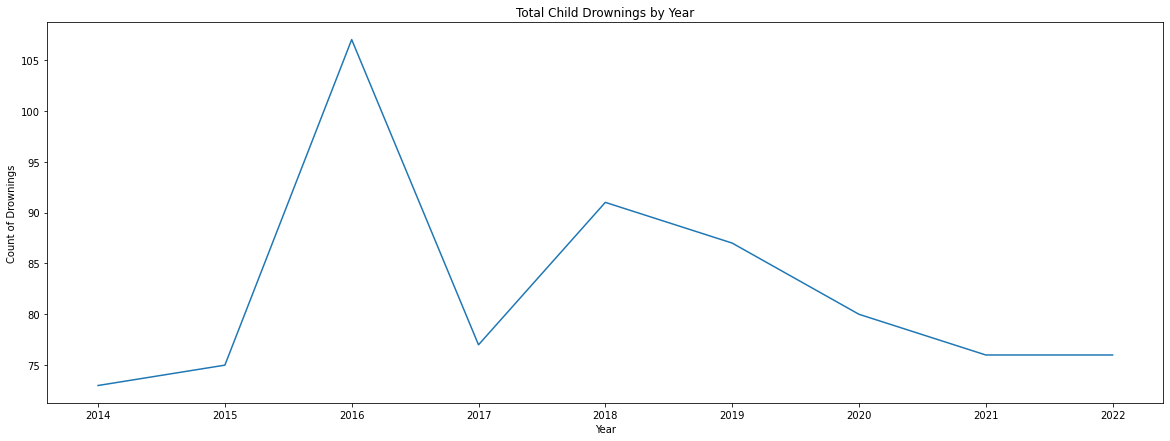

In [28]:
drownings_by_year(df)

<AxesSubplot:title={'center':'Total Child Drownings by County: 2016-2022'}, xlabel='County', ylabel='count'>

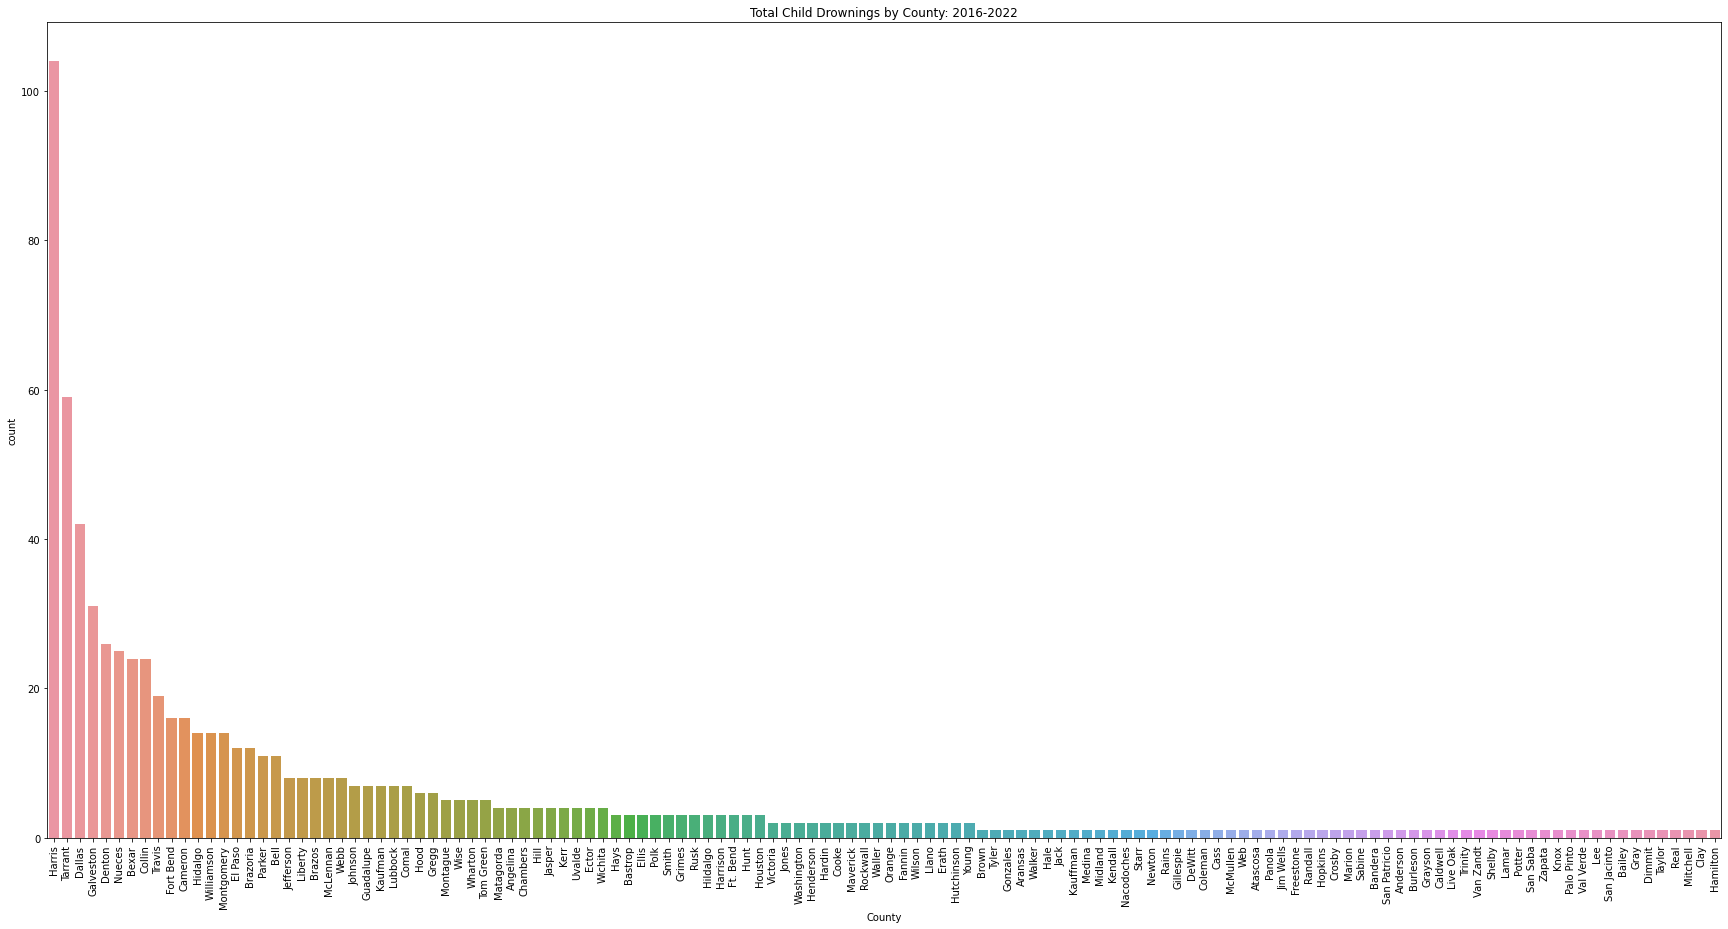

In [29]:
total_drownings_by_county(df)

<AxesSubplot:title={'center':'Total Child Drownings by Occurrence: 2016-2022'}, xlabel='Location', ylabel='count'>

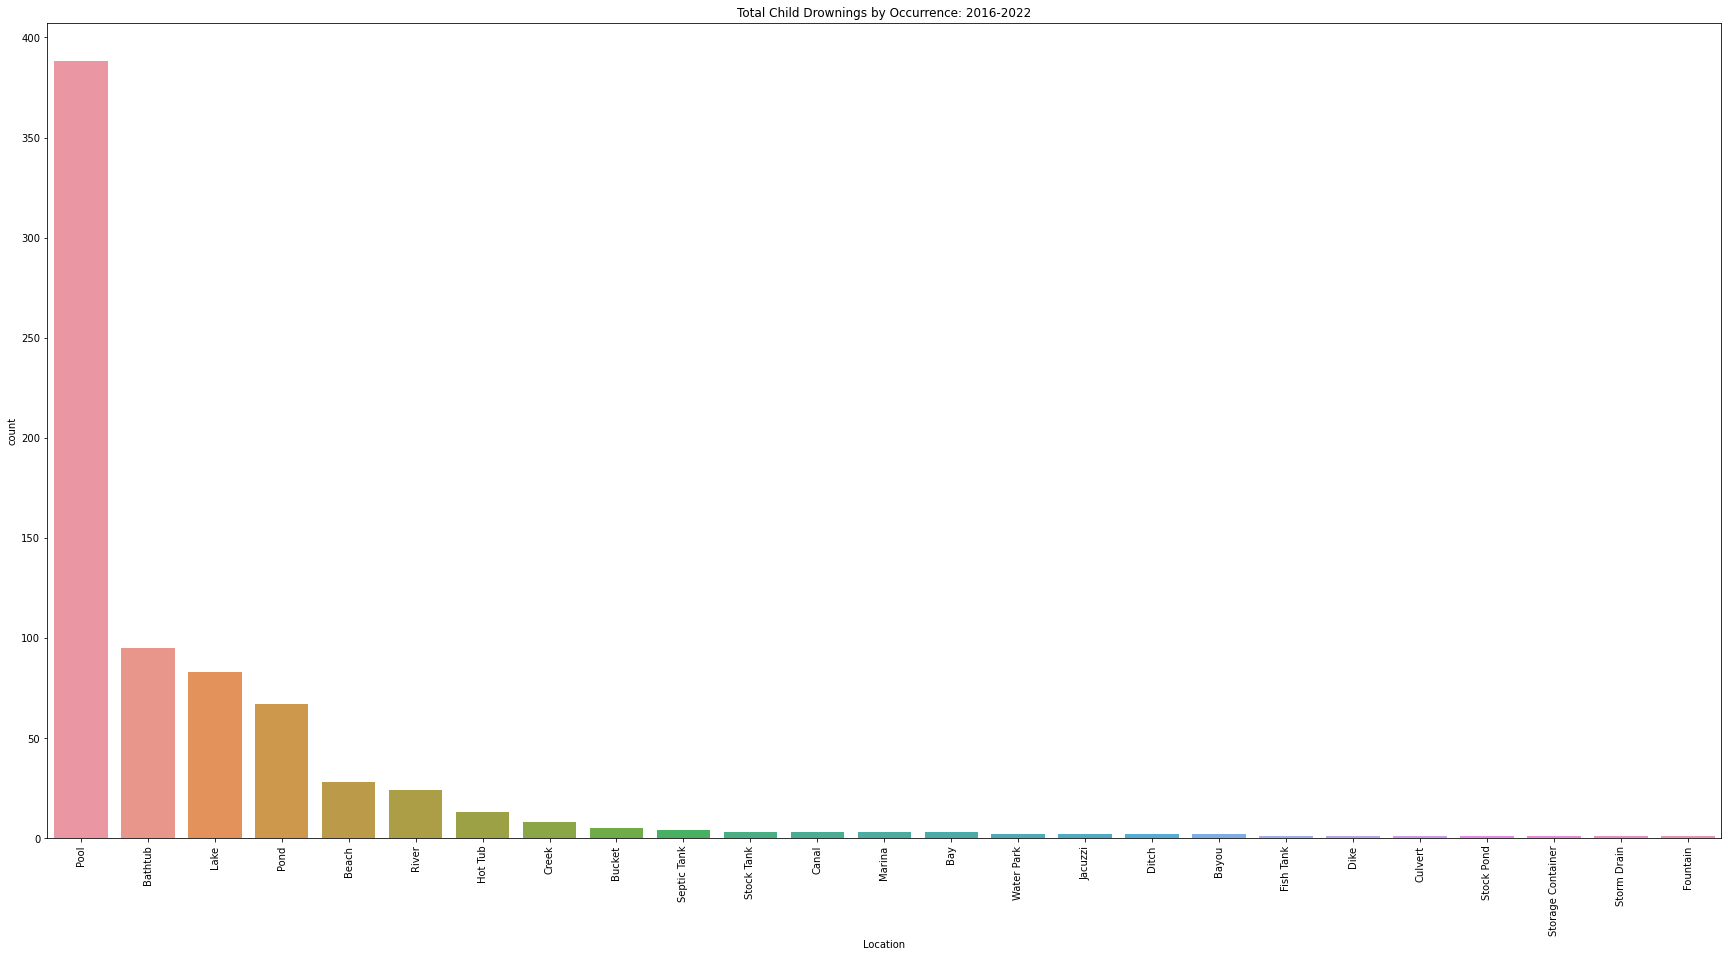

In [30]:
drownings_by_category(df)

<AxesSubplot:title={'center':'Total Child Drownings by Age: 2016-2022'}, xlabel='Age', ylabel='count'>

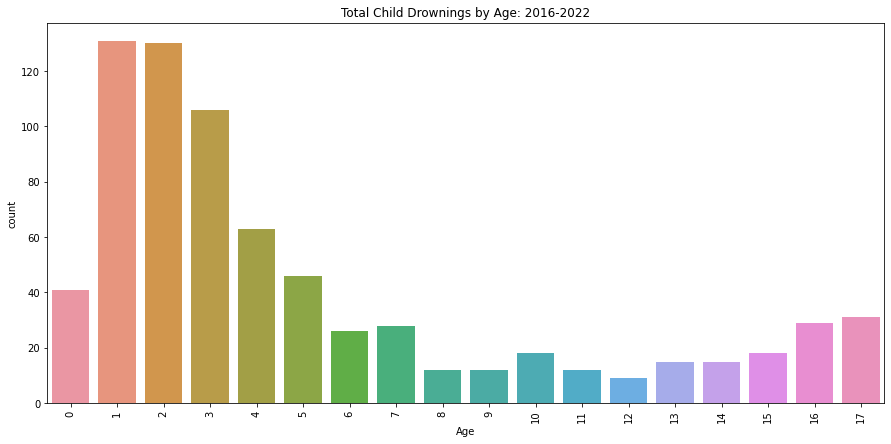

In [31]:
drownings_by_age(df)

<AxesSubplot:title={'center':'Total Child Drownings by Gender: 2016-2022'}, xlabel='Gender', ylabel='count'>

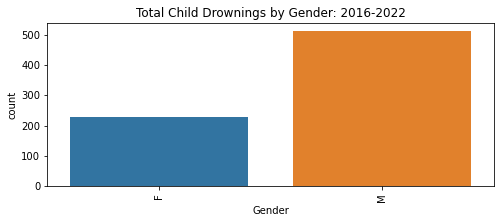

In [32]:
drownings_by_gender(df)

# Multi-Variate (More Than One Variable) Analysis

<AxesSubplot:title={'center':'Total Child Drownings by Age: 2016-2022'}, xlabel='Age', ylabel='count'>

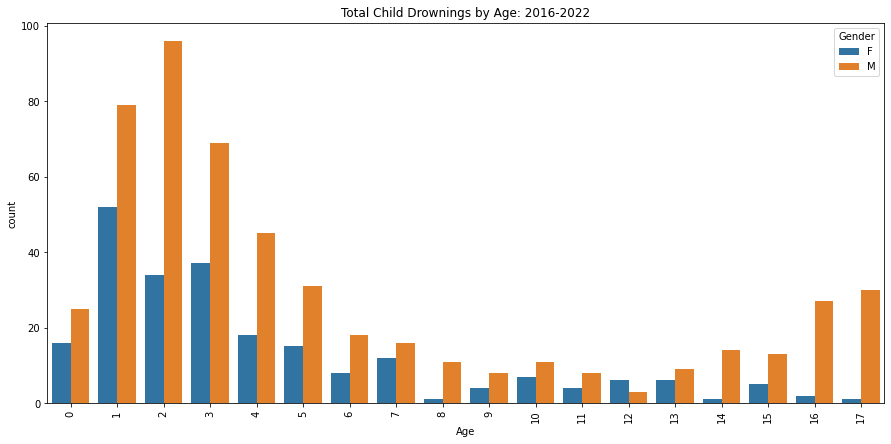

In [33]:
drownings_by_age_gender(df)

<AxesSubplot:title={'center':'Total Child Drownings by Age at Pool: 2016-2022'}, xlabel='Location', ylabel='count'>

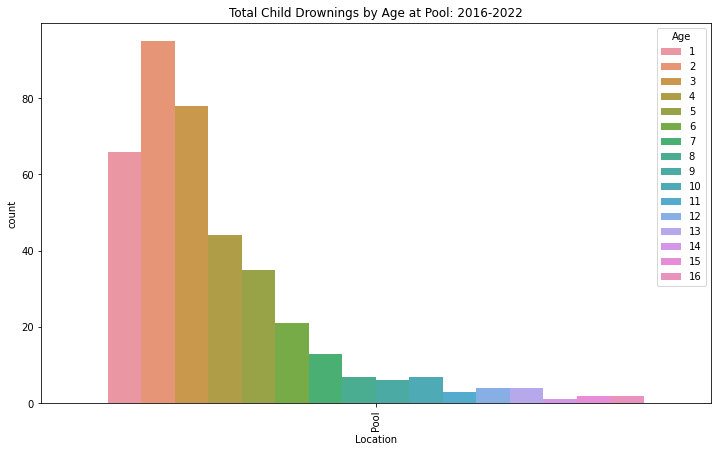

In [34]:
drownings_by_age_pool(df)

<AxesSubplot:title={'center':'Total Child Drownings by Age in Bathtub: 2016-2022'}, xlabel='Location', ylabel='count'>

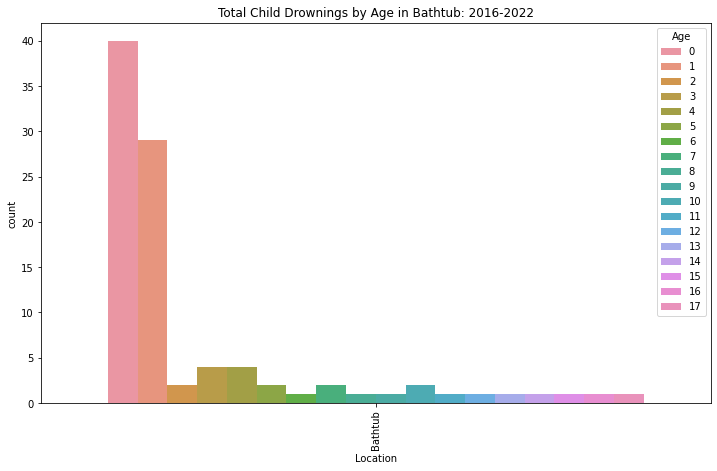

In [35]:
drownings_by_age_bathtub(df)

<AxesSubplot:title={'center':'Total Child Drownings by Age in Lakes: 2016-2022'}, xlabel='Location', ylabel='count'>

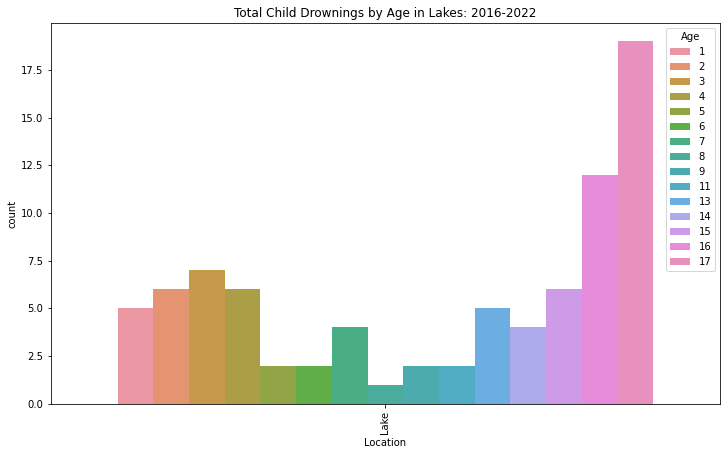

In [36]:
drownings_by_age_lake(df)

<AxesSubplot:title={'center':'Total Child Drownings by Age in Ponds: 2016-2022'}, xlabel='Location', ylabel='count'>

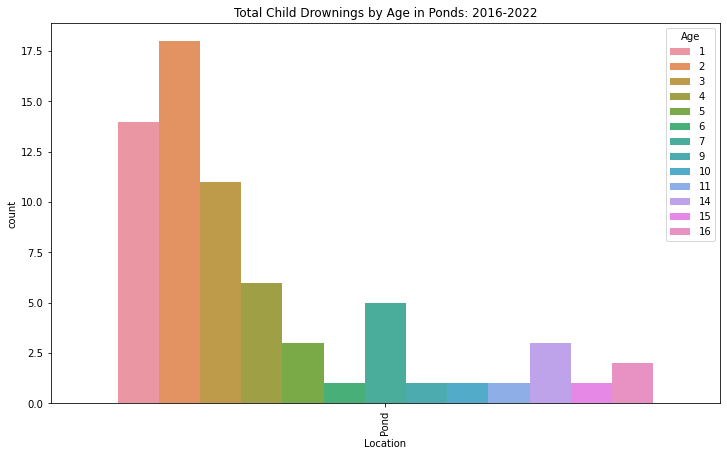

In [37]:
drownings_by_age_pond(df)

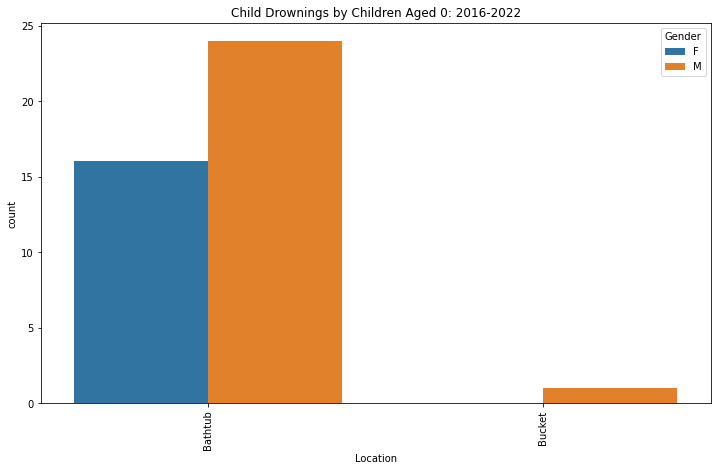

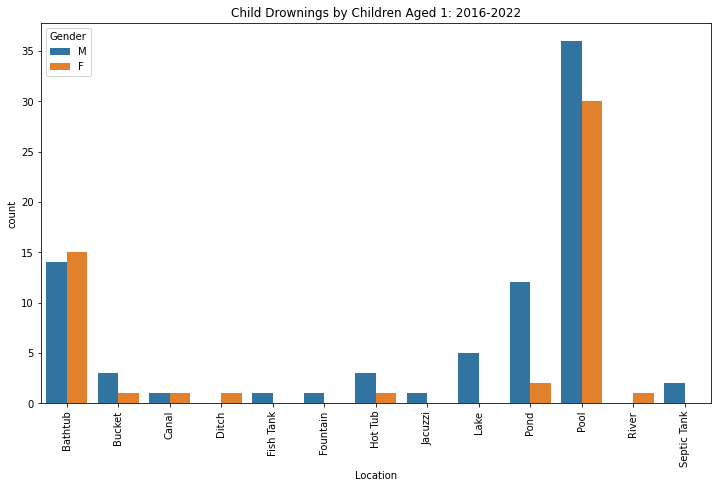

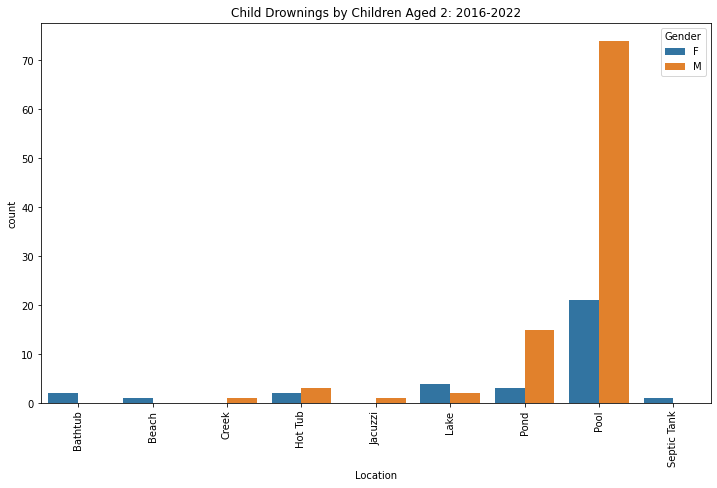

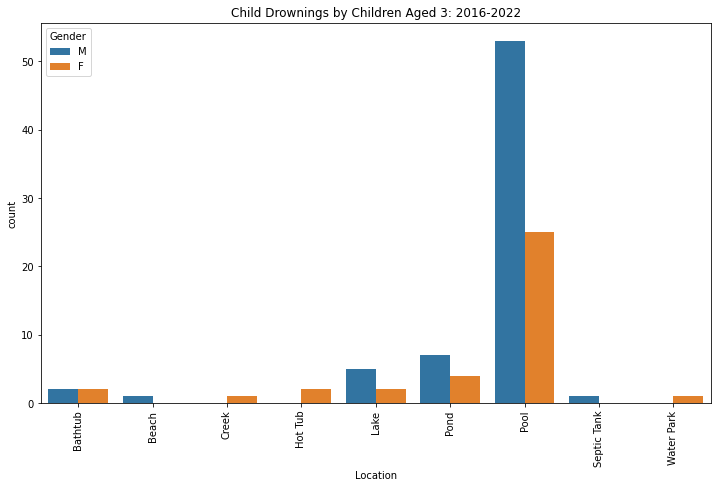

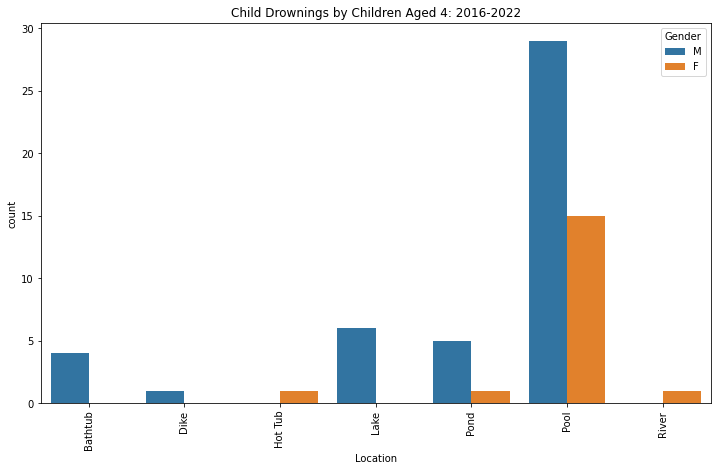

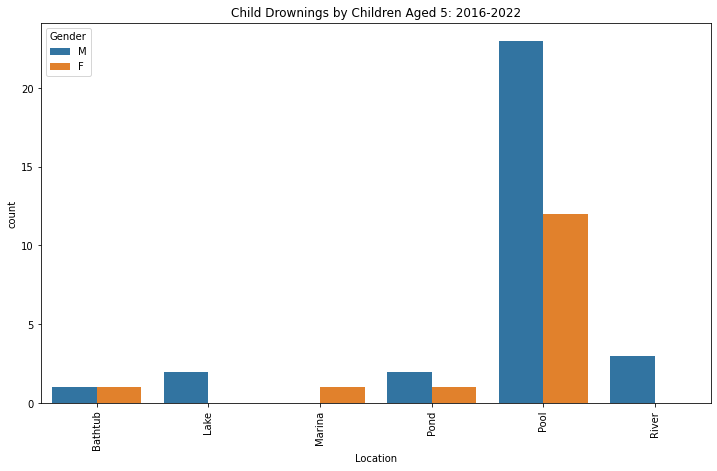

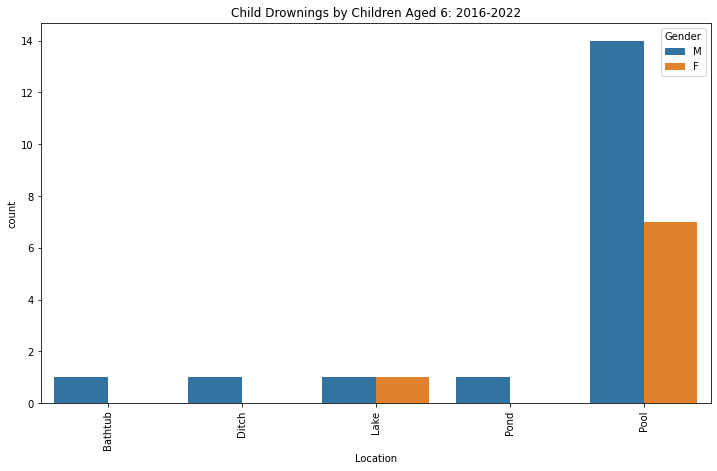

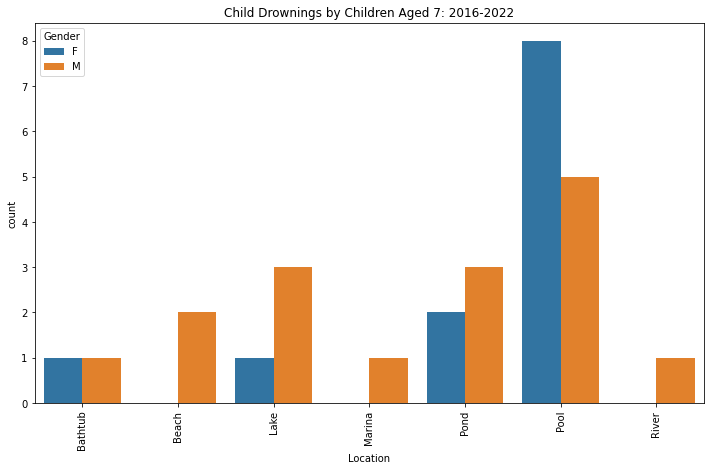

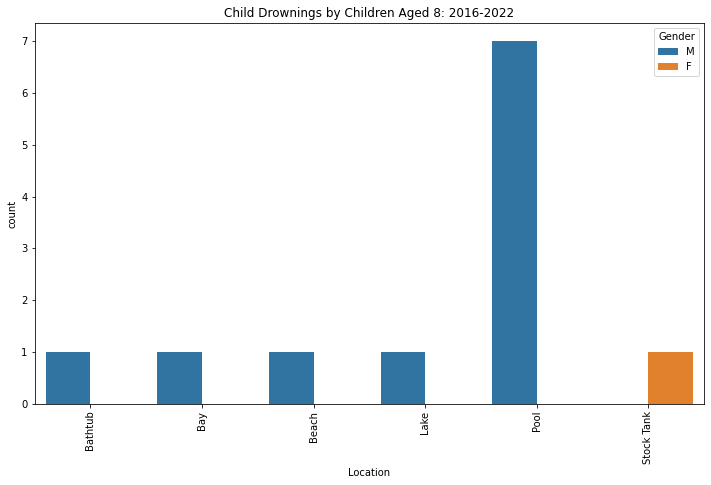

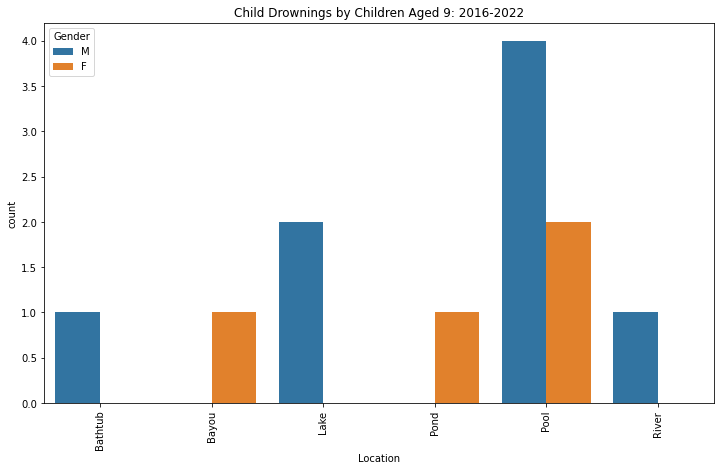

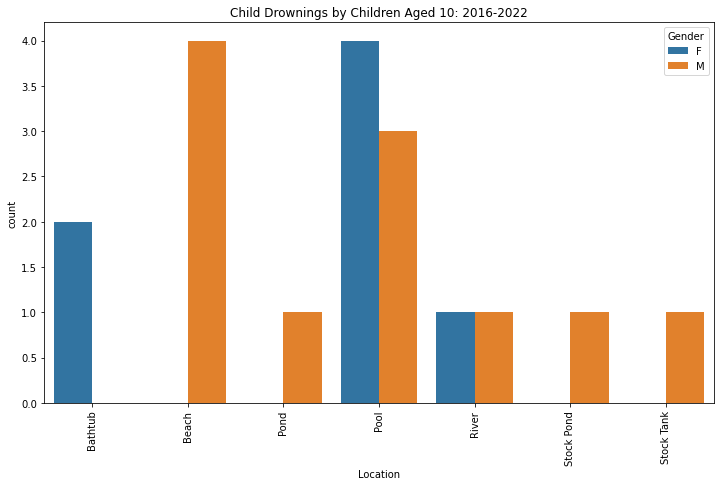

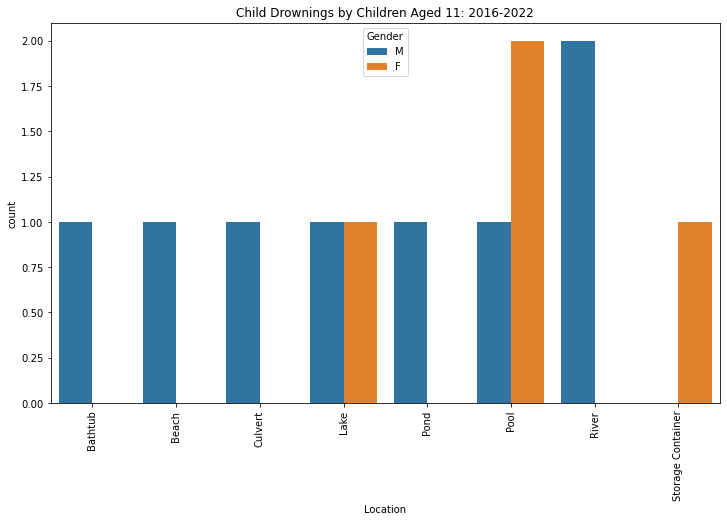

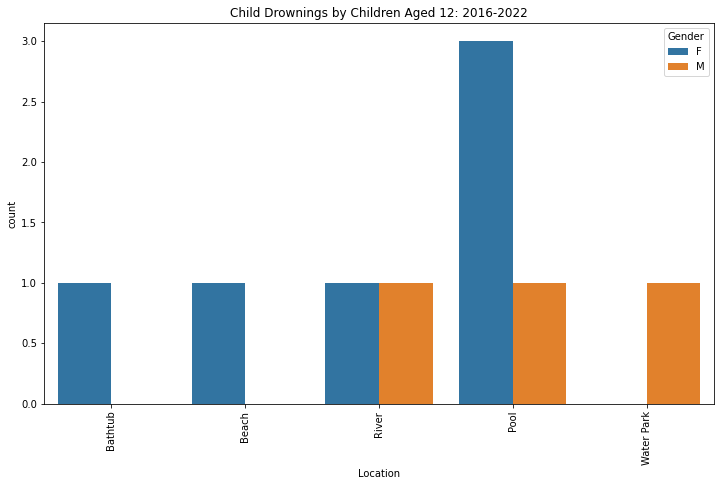

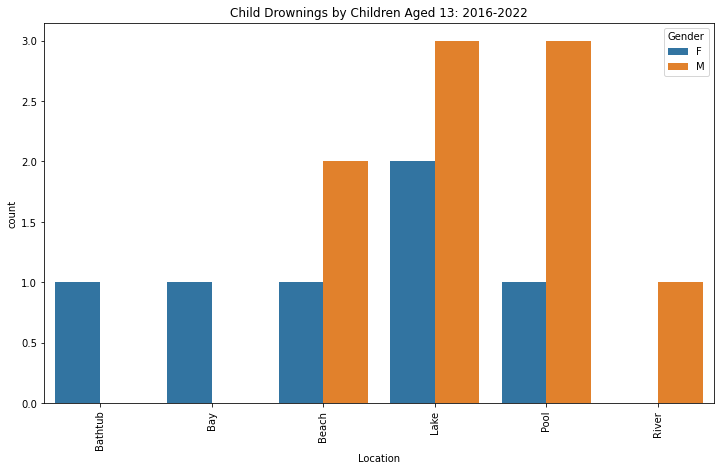

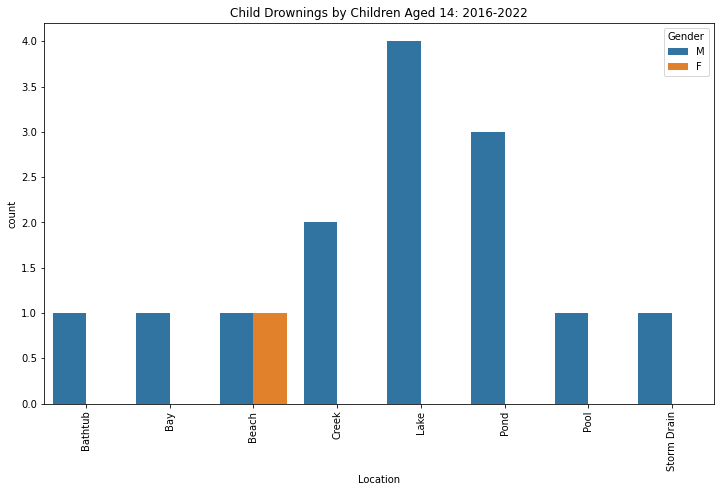

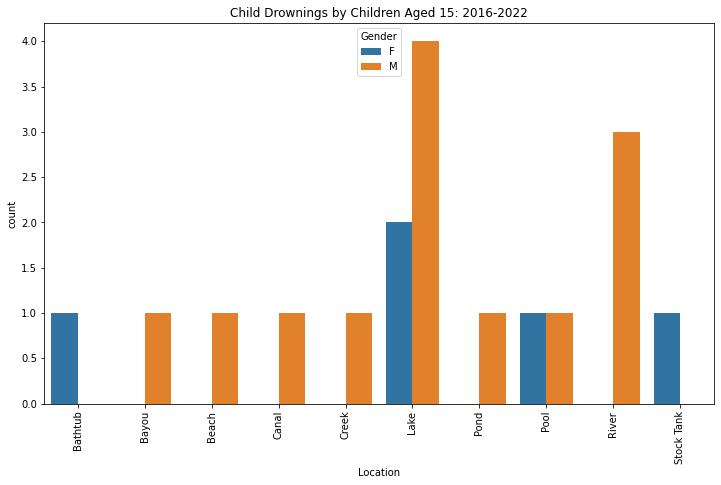

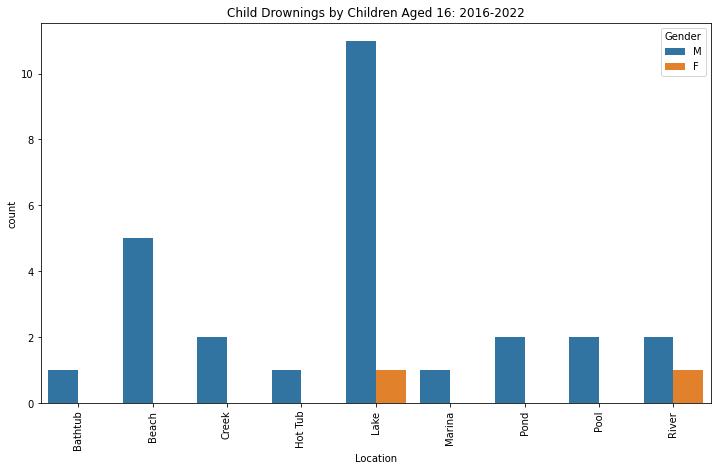

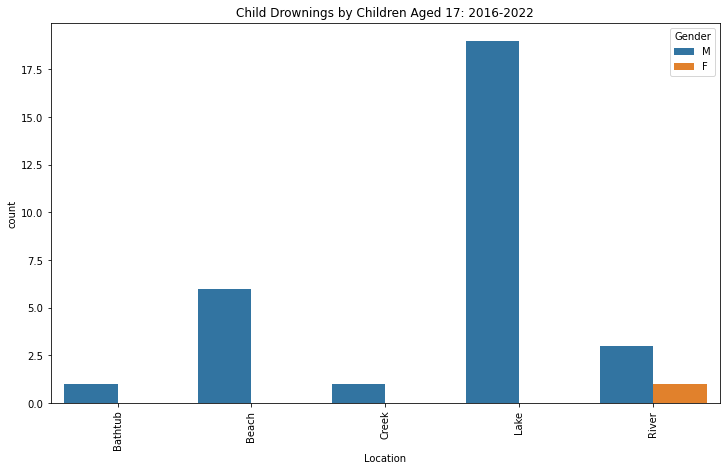

In [38]:
most_dangerous_location_by_age(df)

<AxesSubplot:title={'center':'Total Child Drownings by Secondary Location: 2016-2022'}, xlabel='Secondary Location', ylabel='count'>

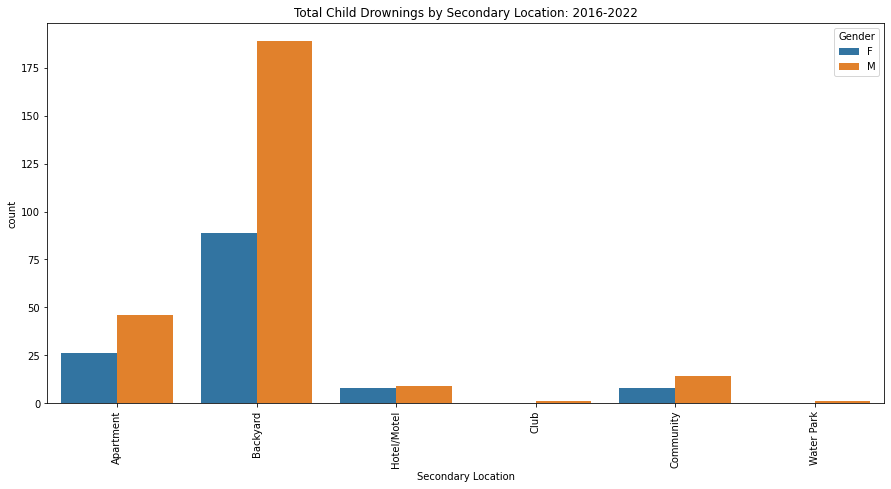

In [39]:
drownings_by_secondary_location(df)

C:\Users\aeroe\AppData\Local\Temp/ipykernel_24448/3529739412.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,5))


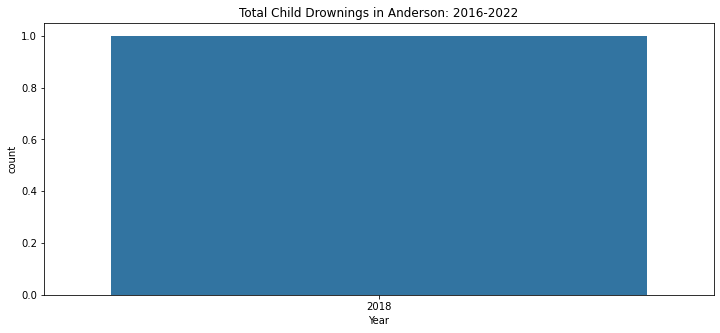

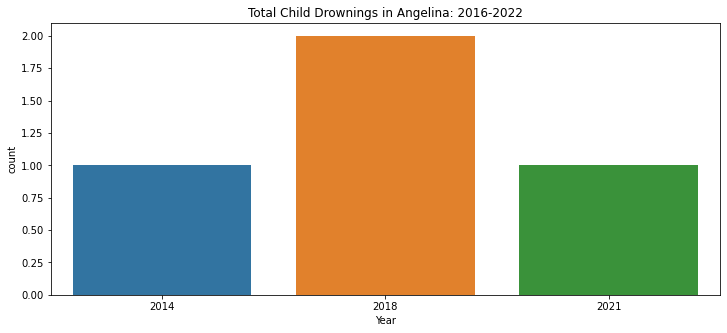

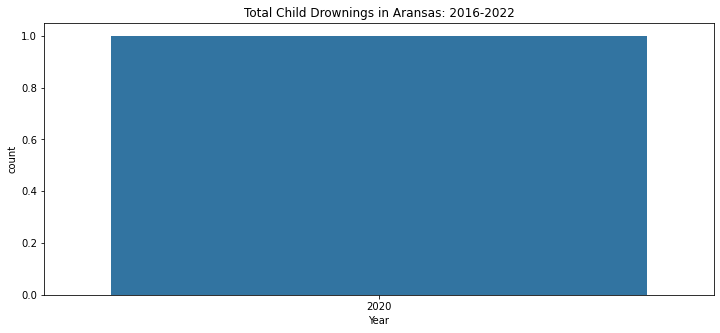

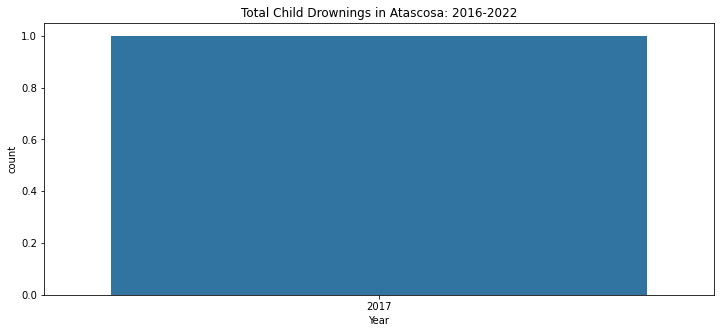

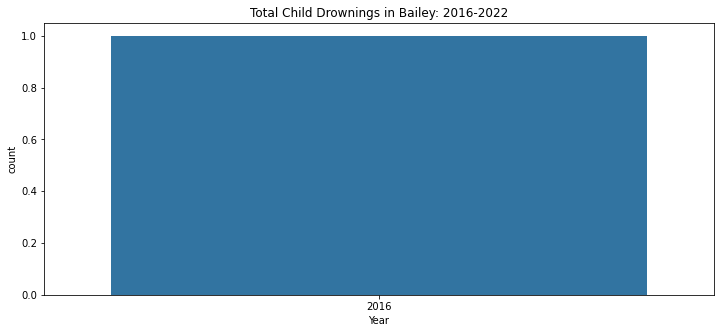

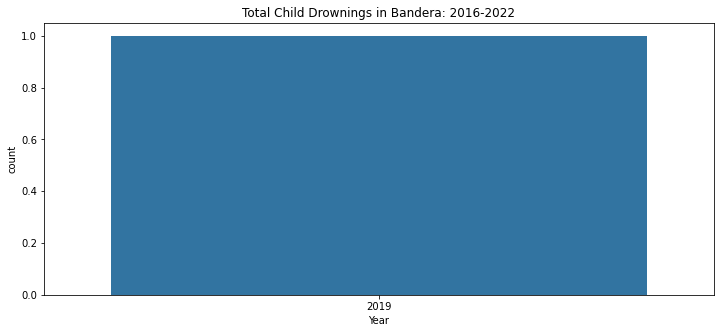

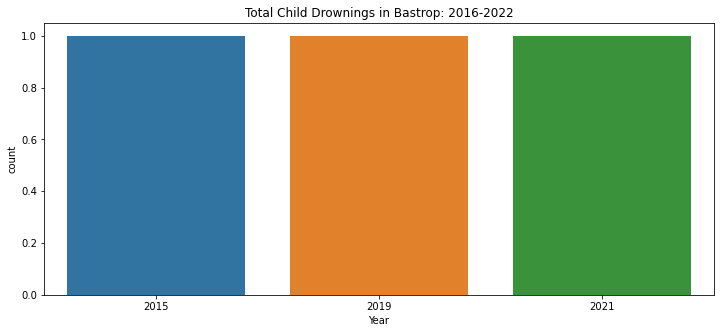

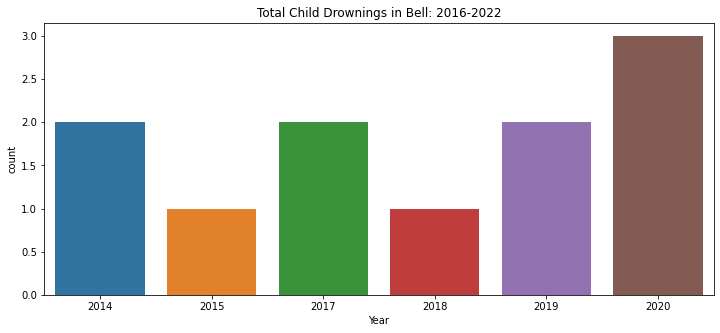

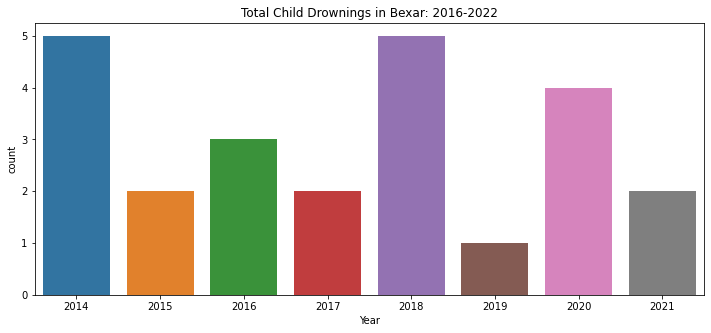

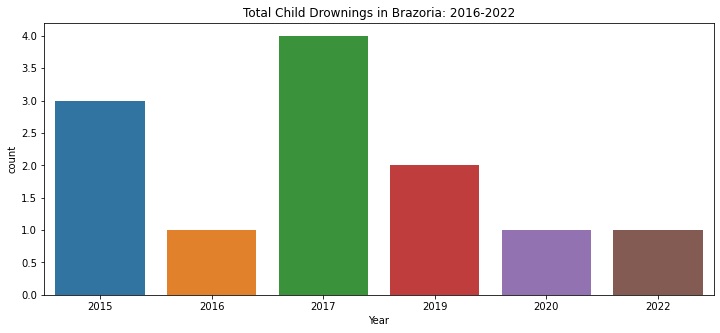

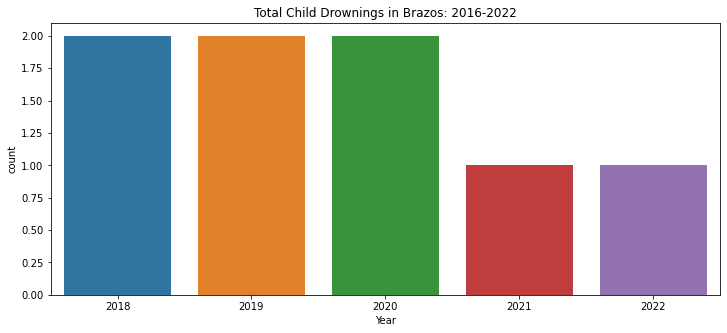

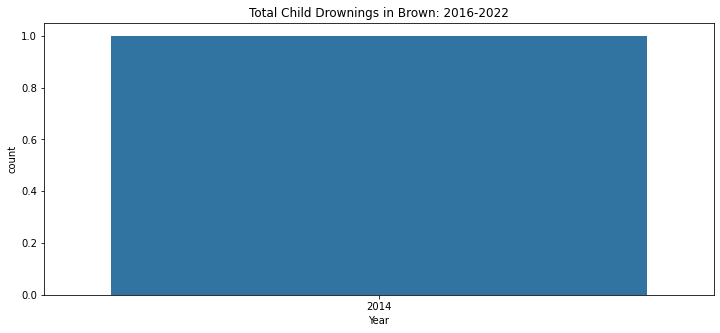

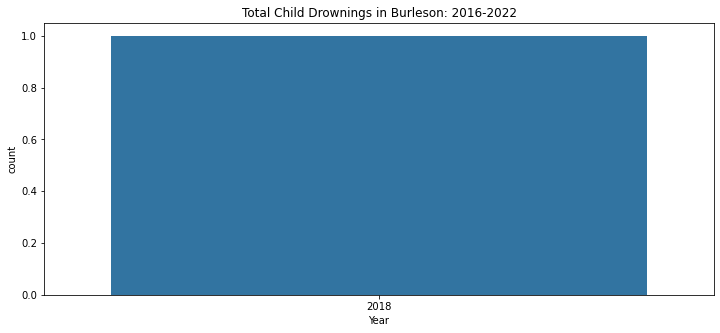

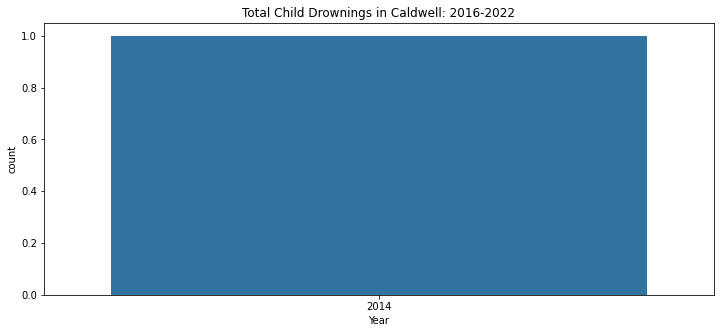

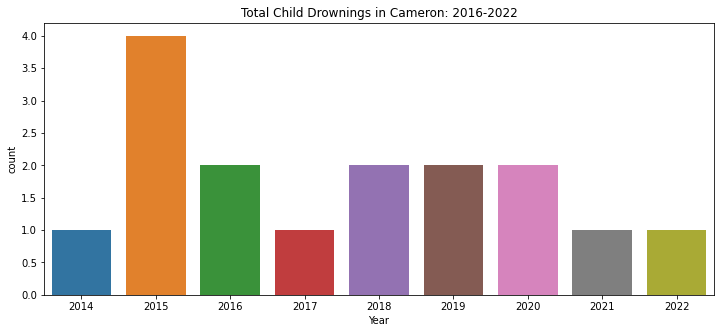

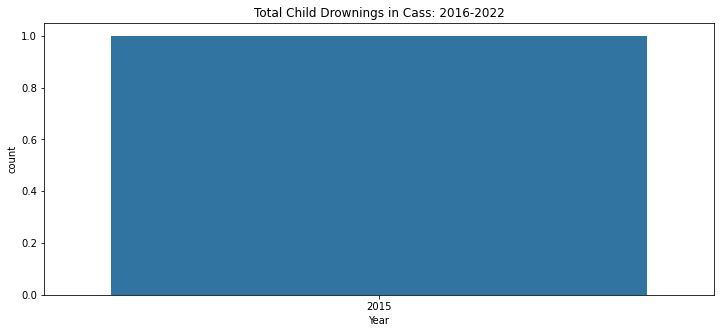

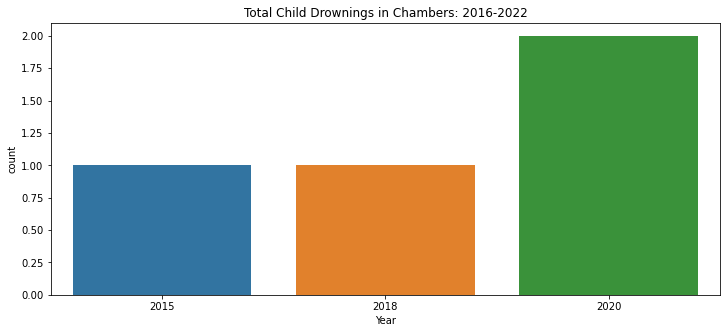

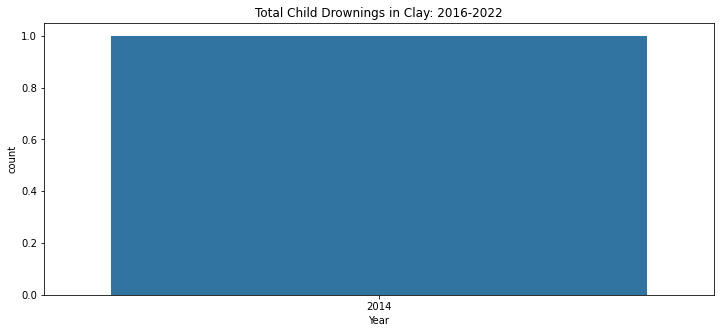

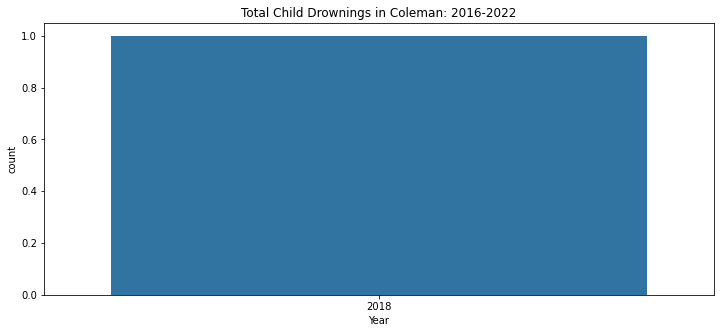

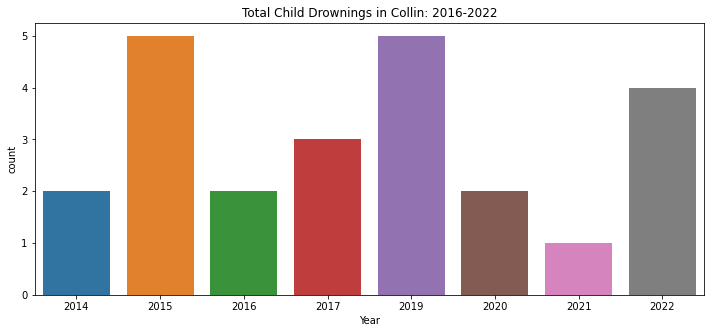

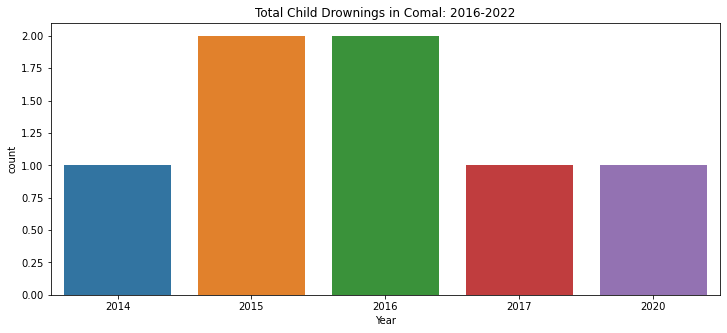

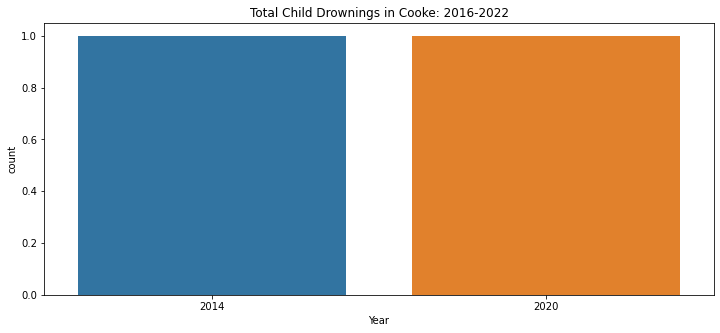

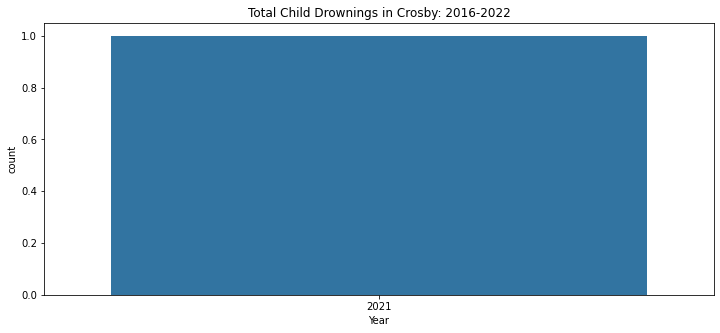

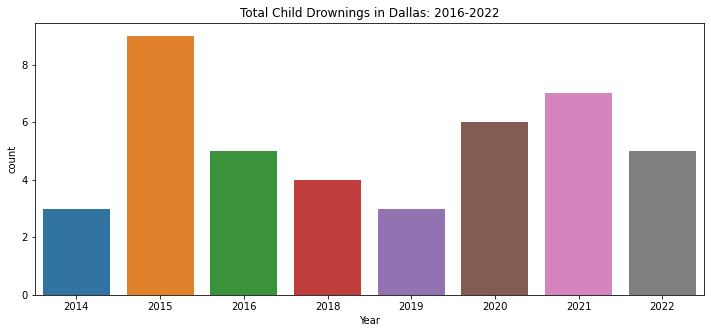

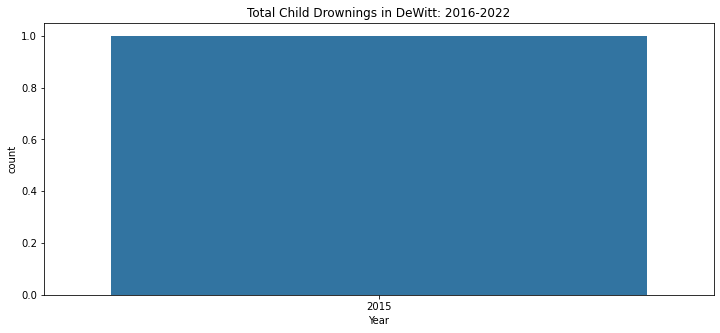

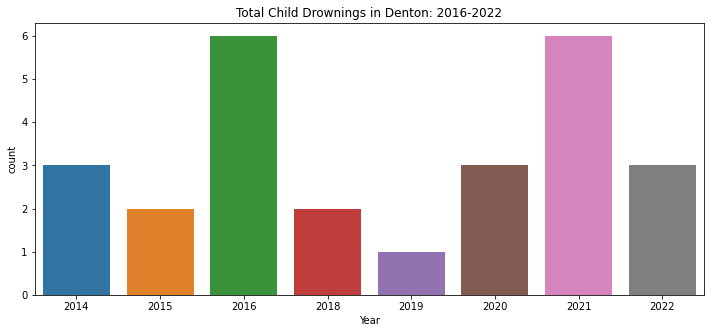

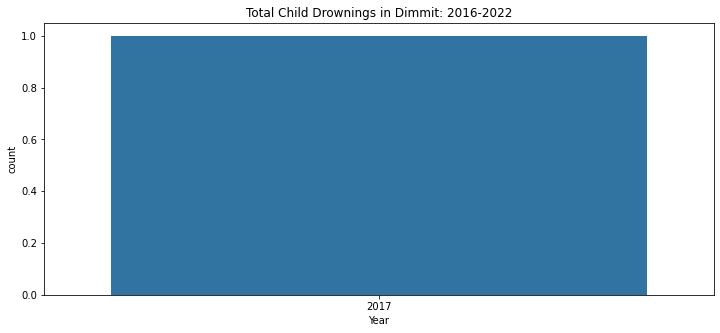

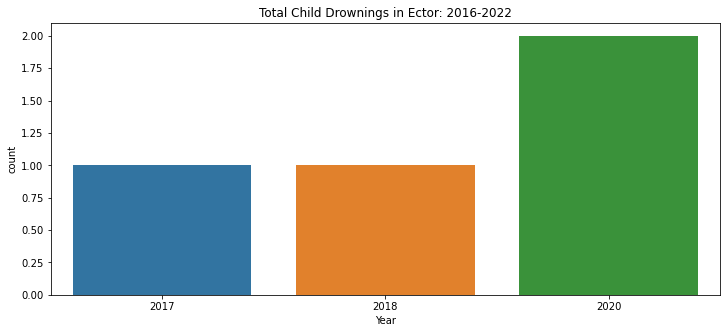

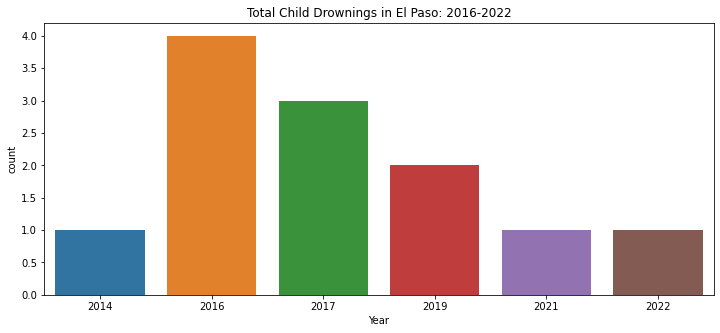

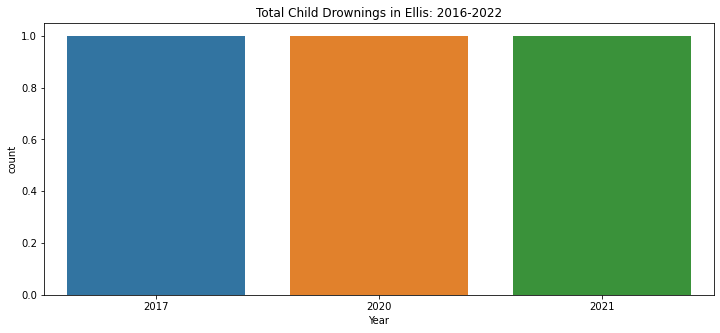

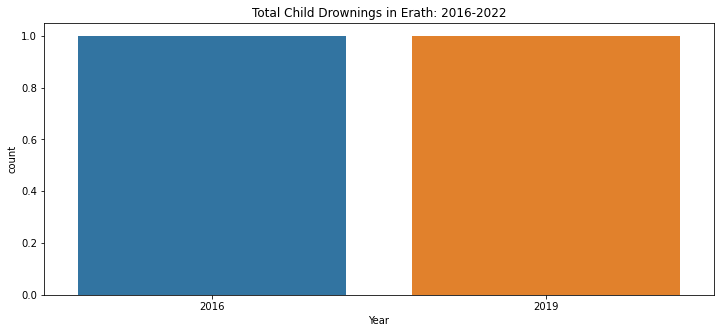

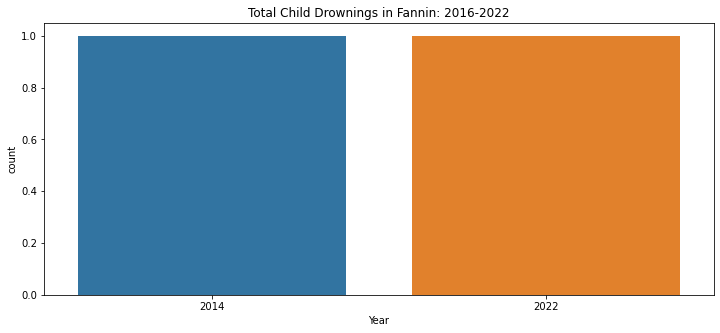

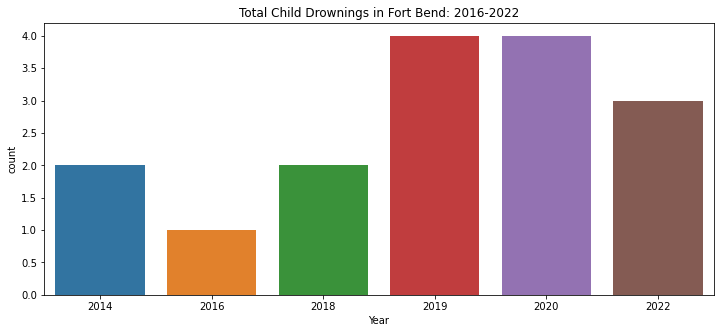

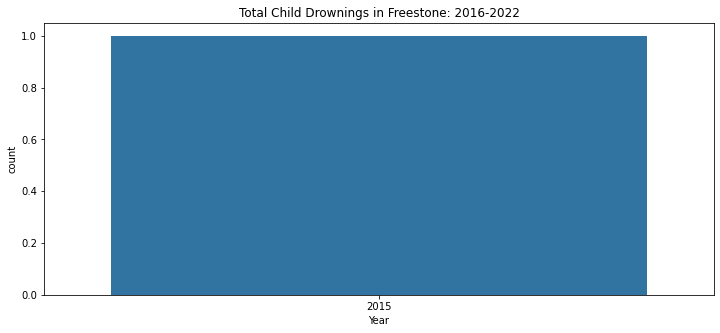

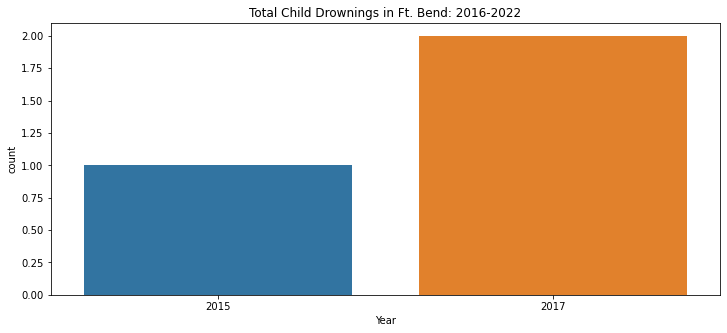

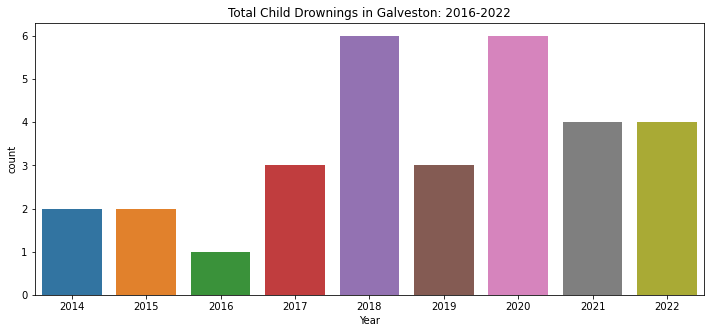

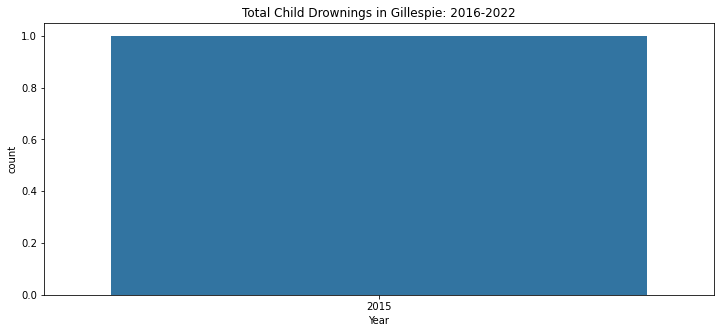

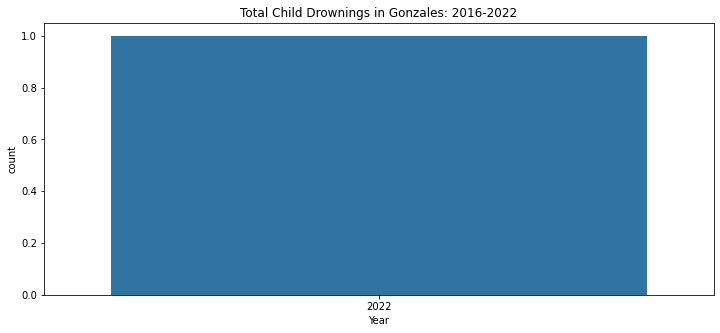

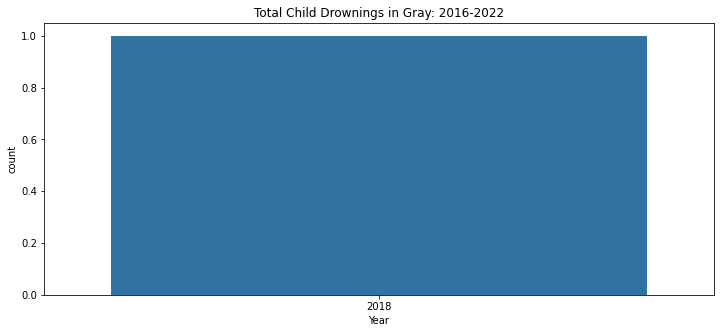

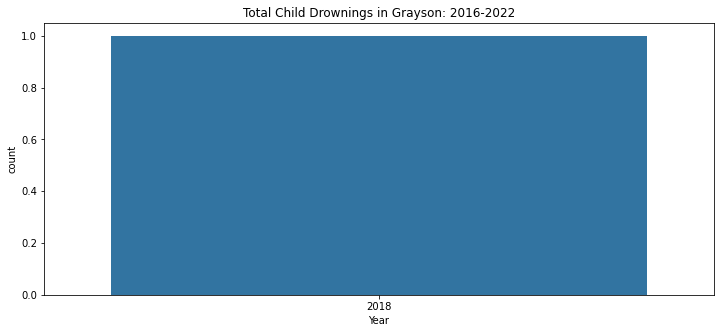

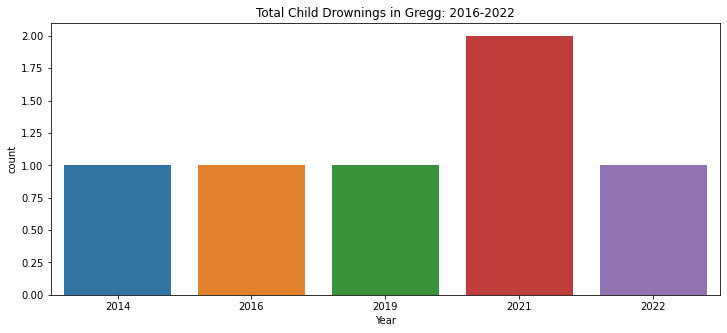

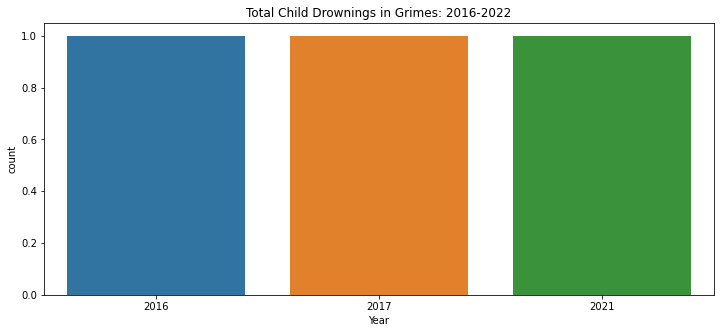

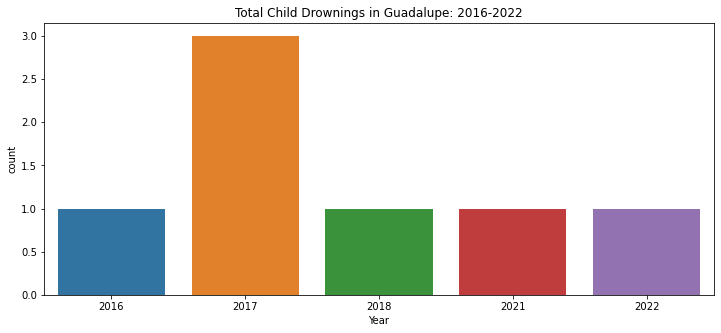

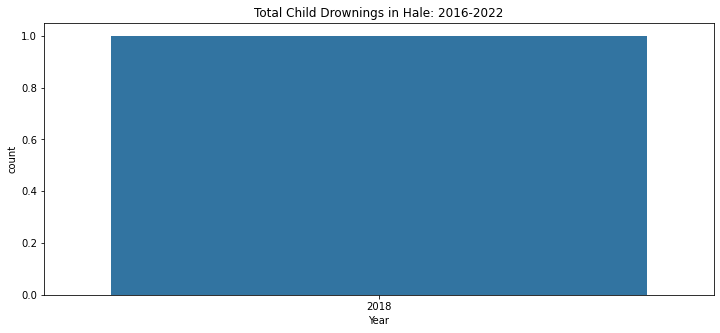

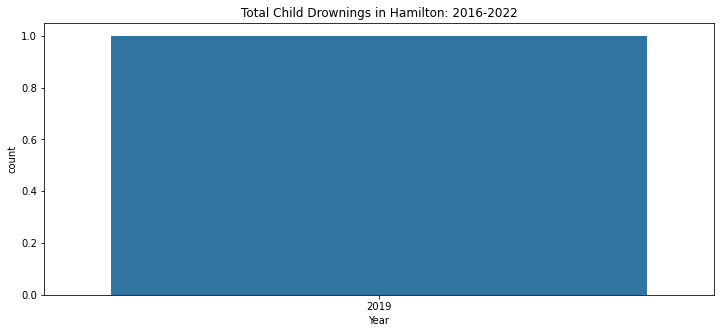

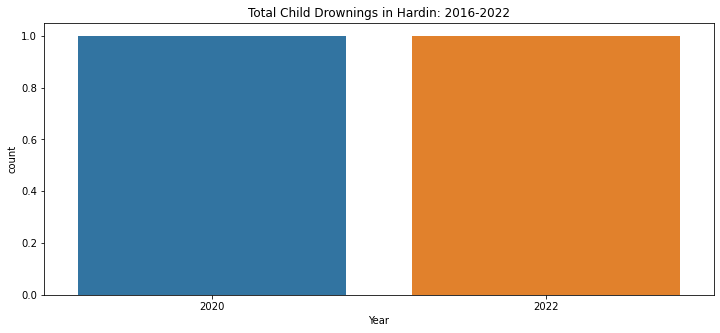

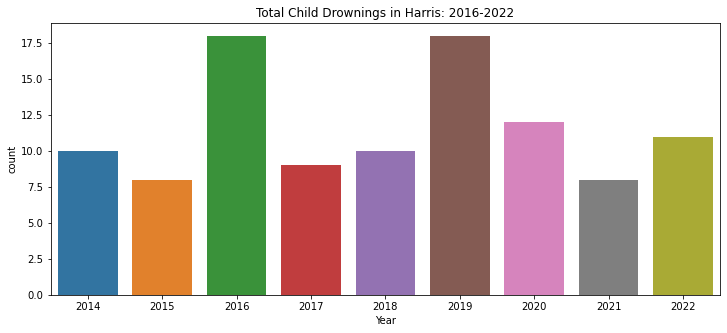

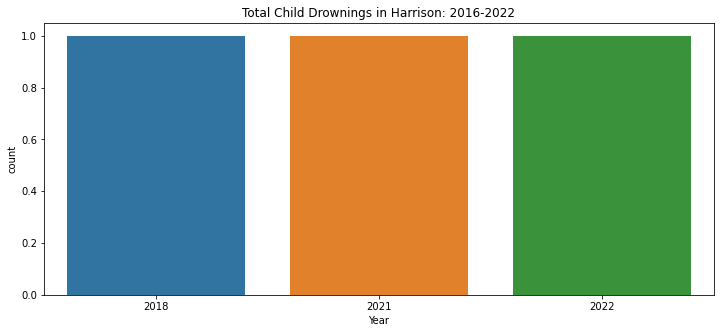

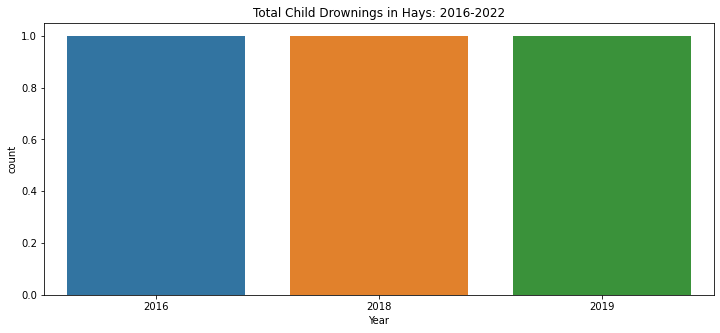

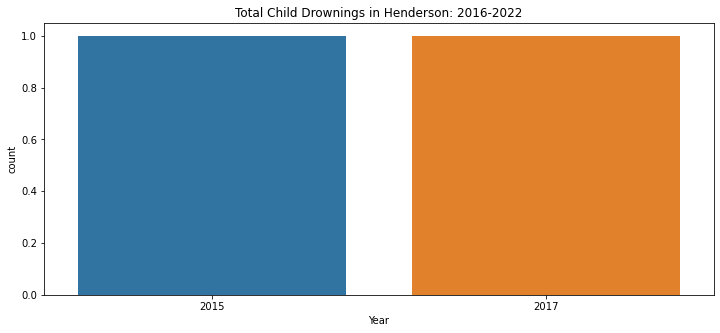

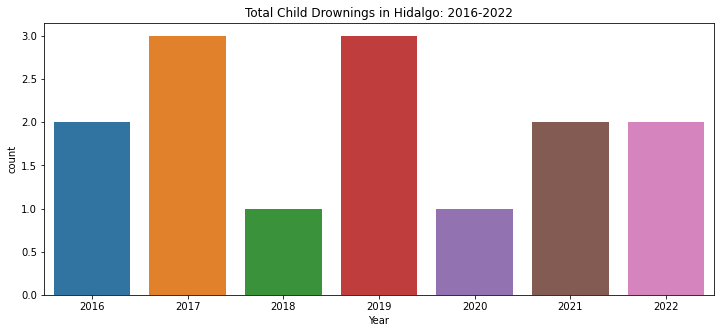

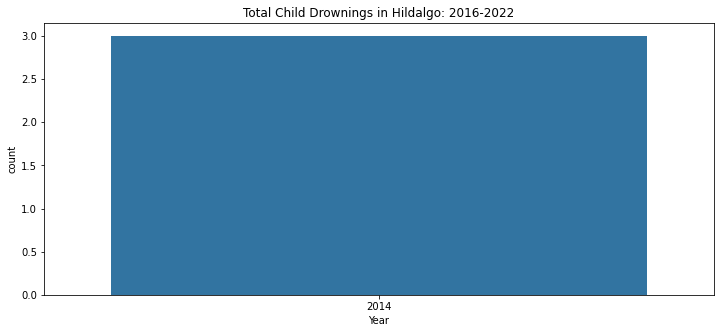

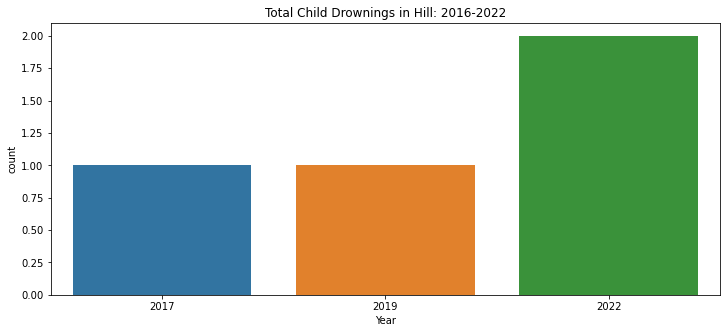

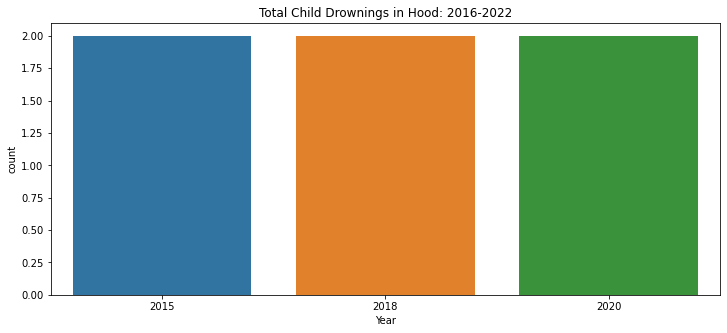

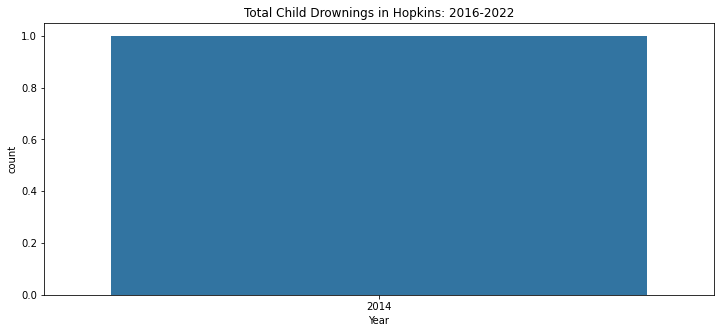

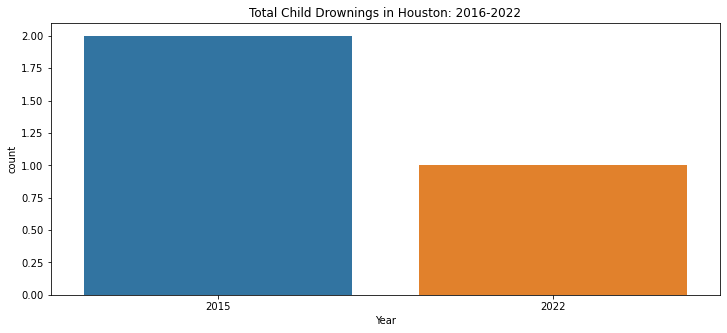

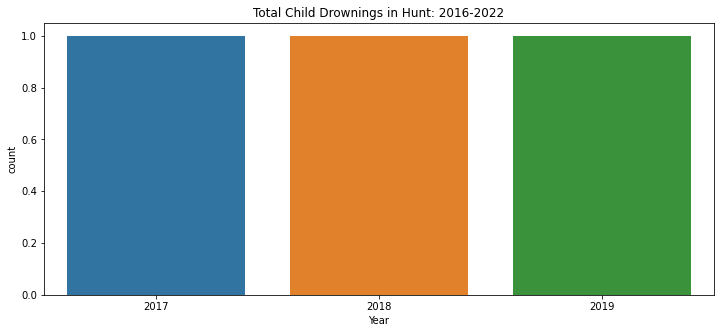

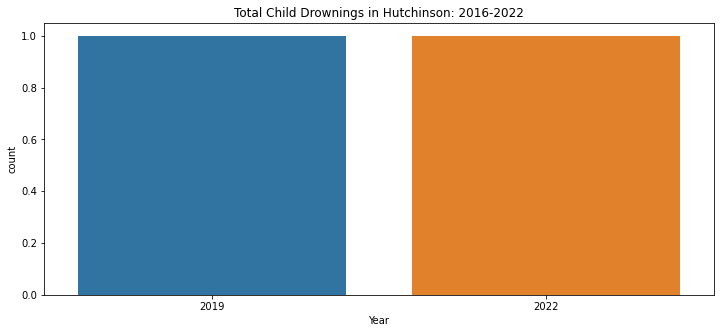

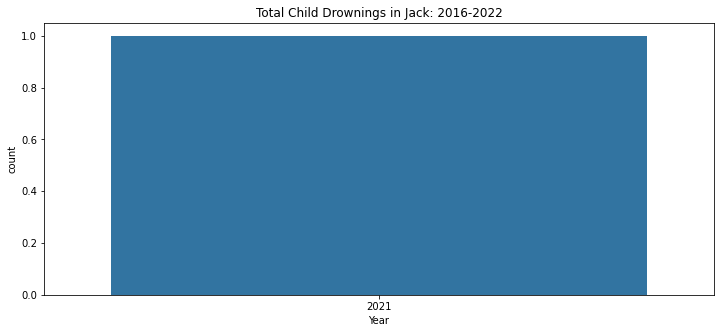

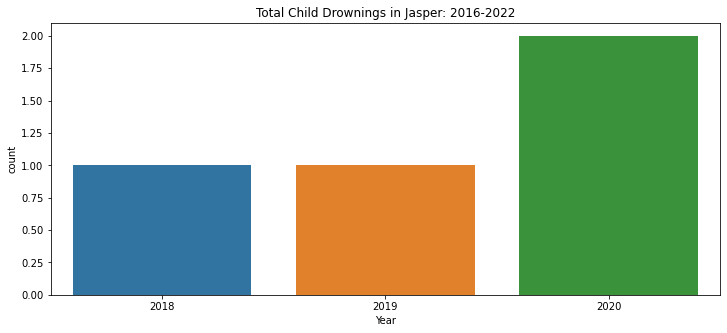

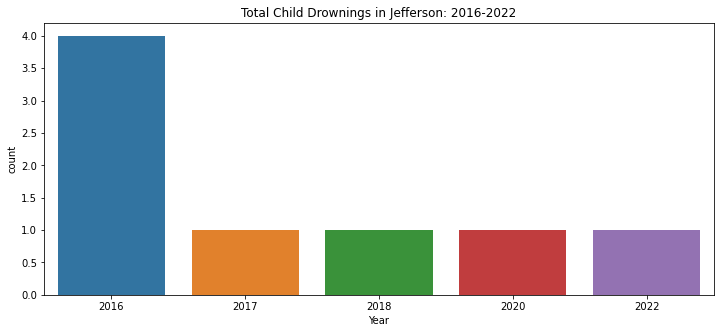

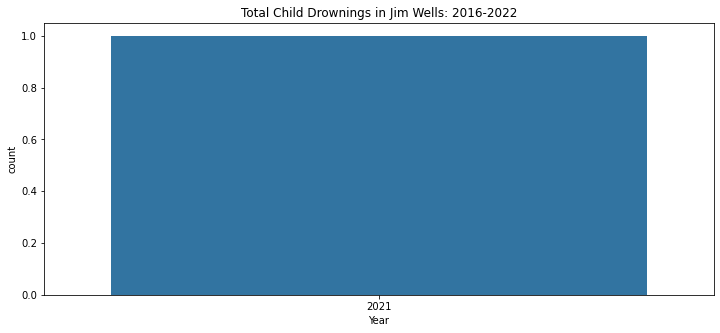

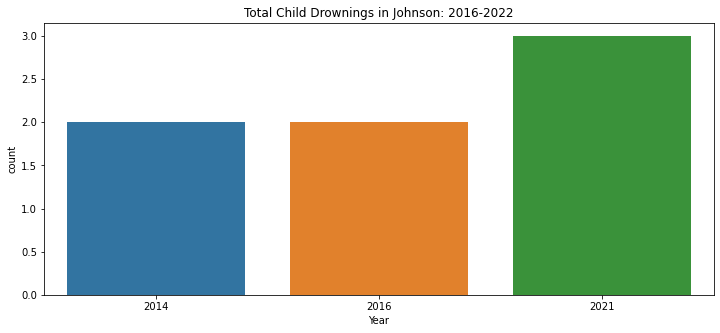

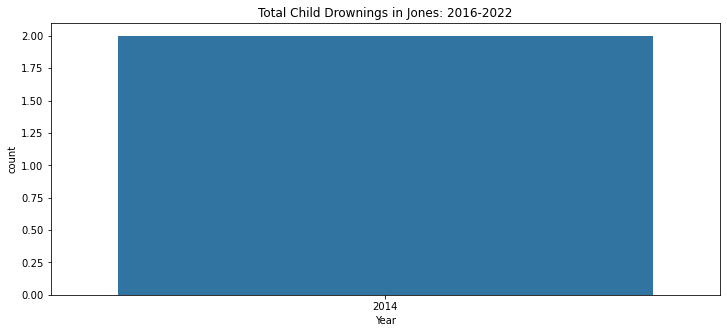

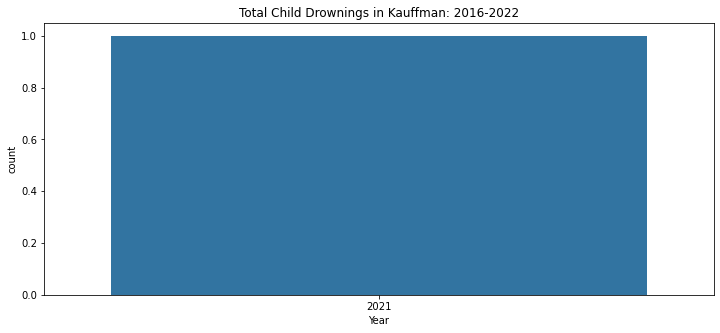

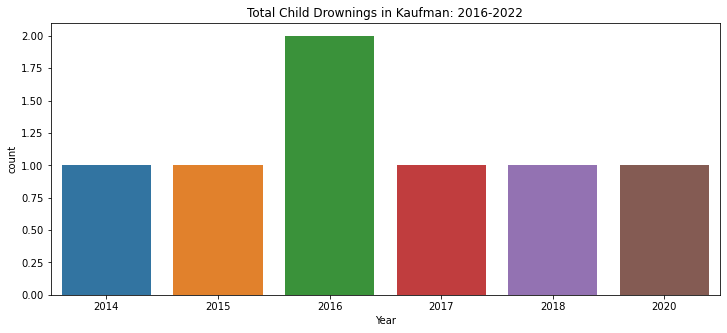

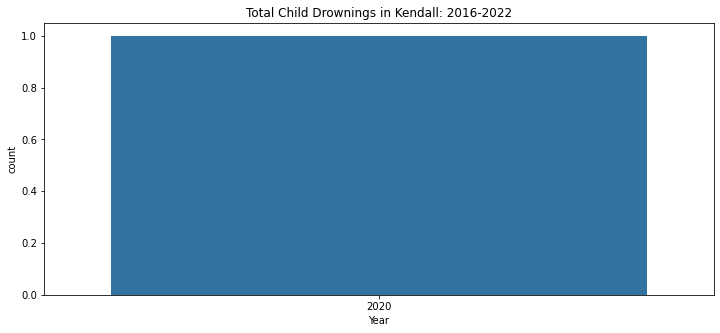

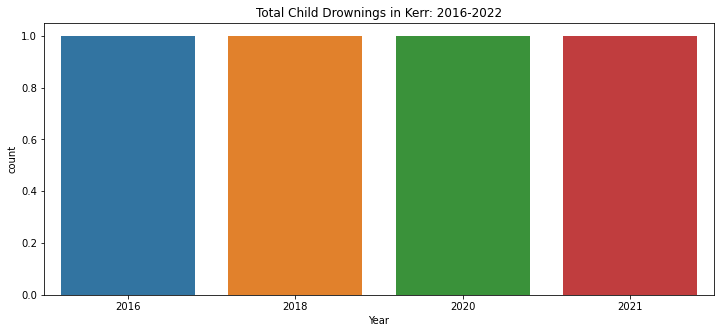

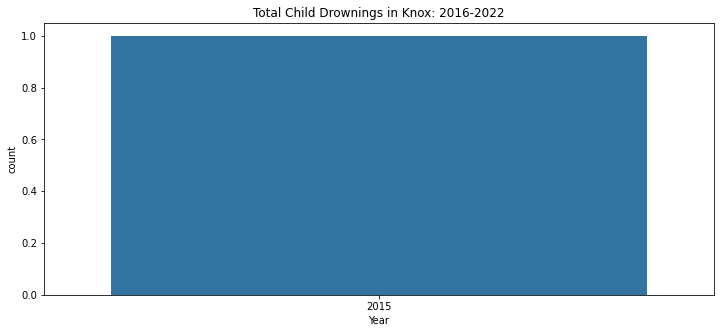

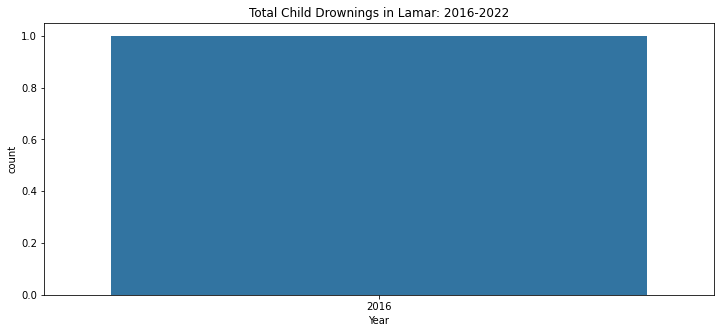

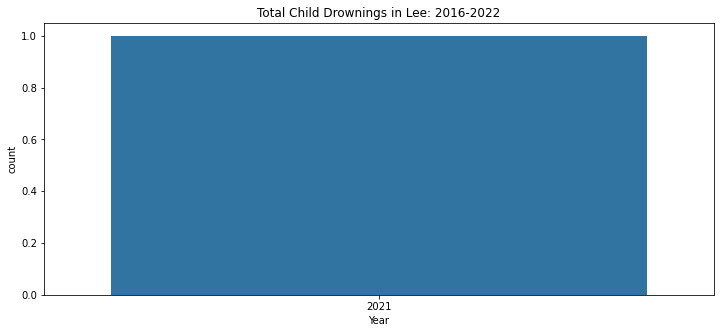

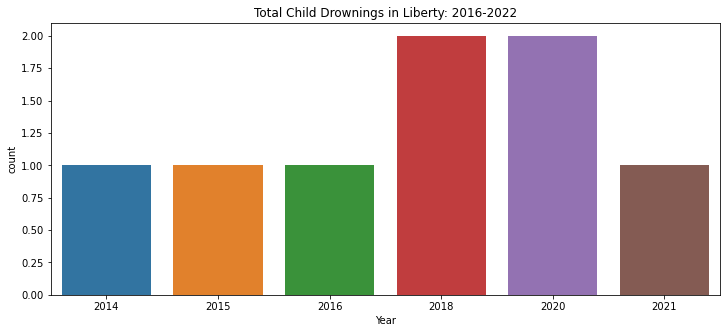

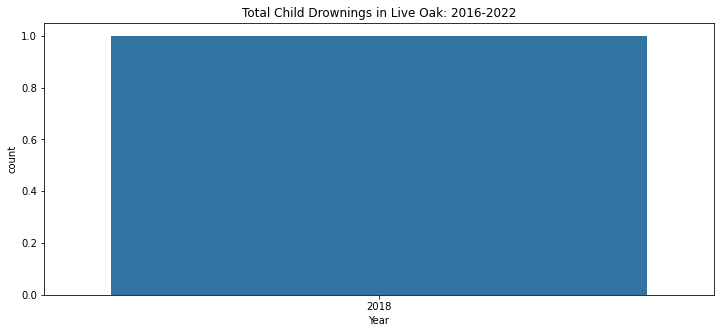

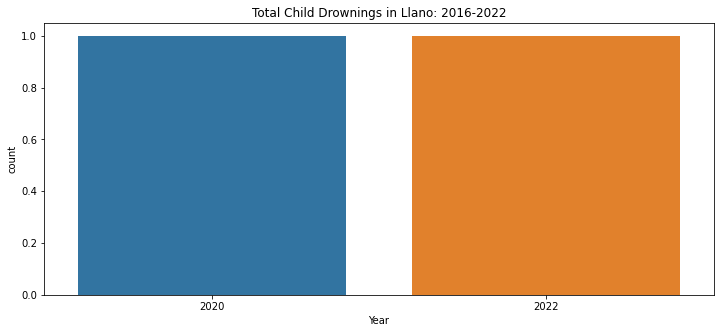

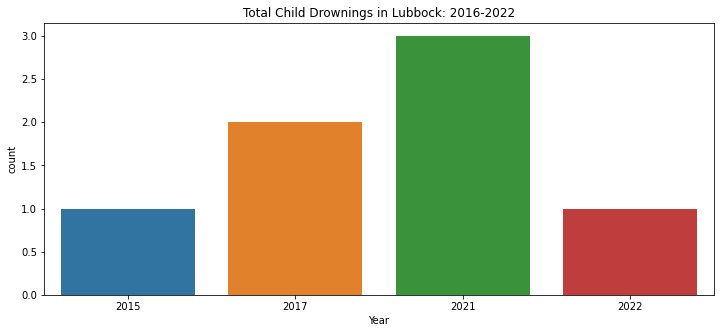

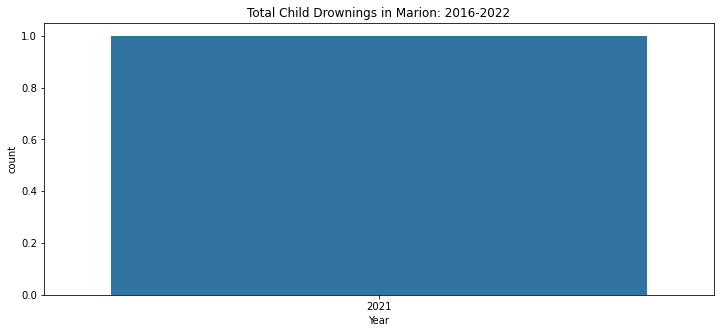

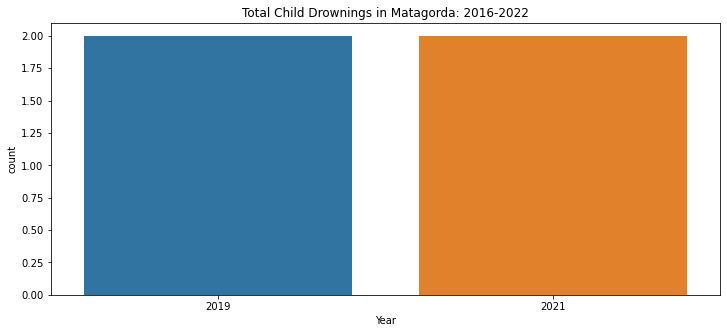

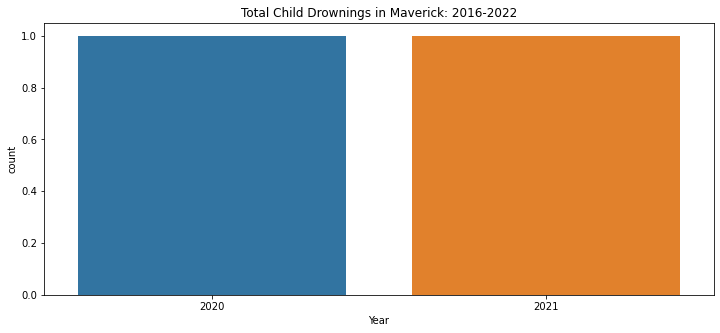

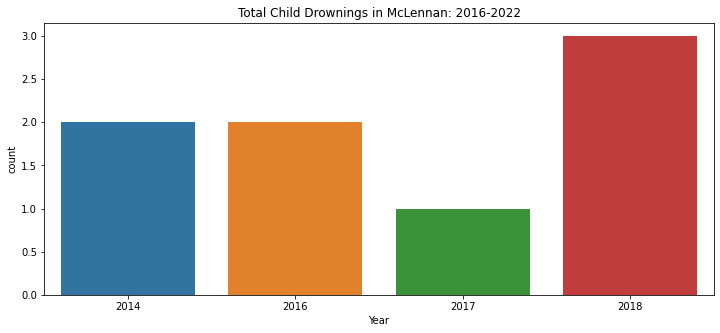

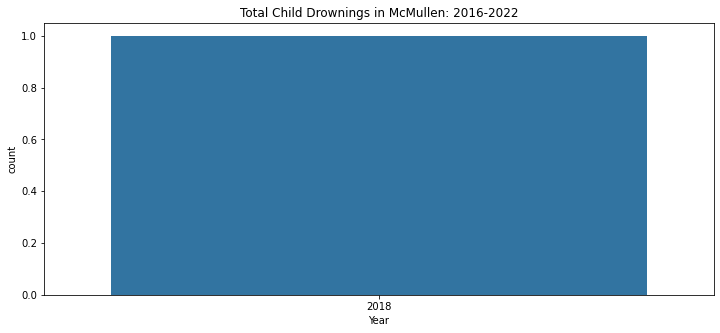

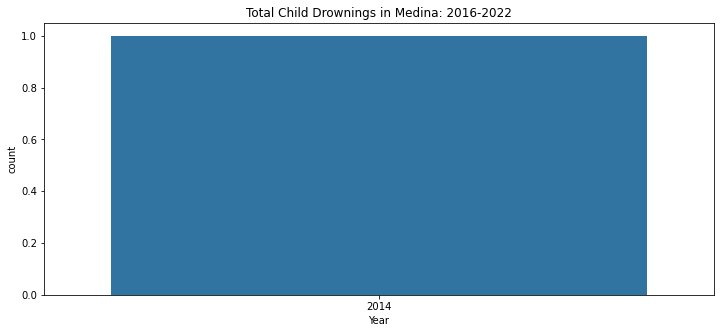

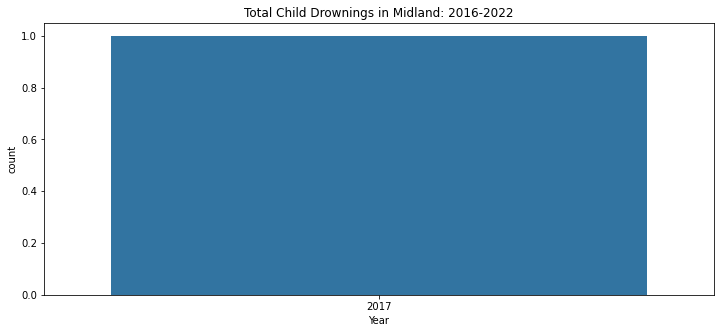

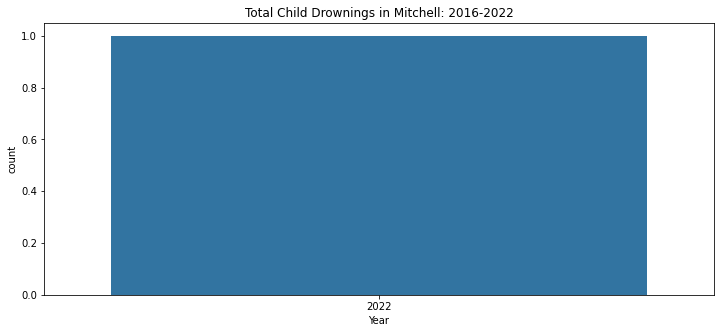

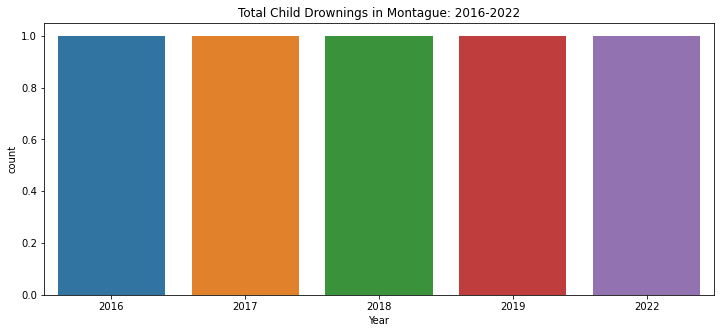

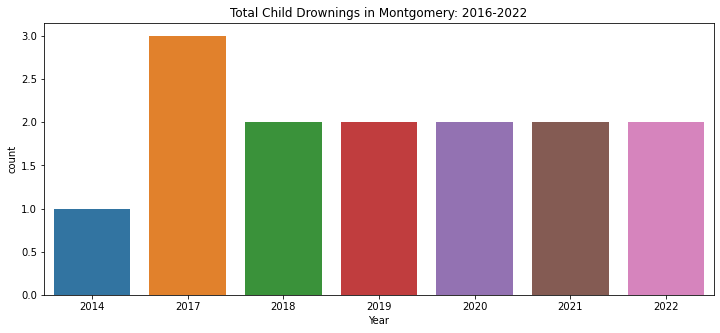

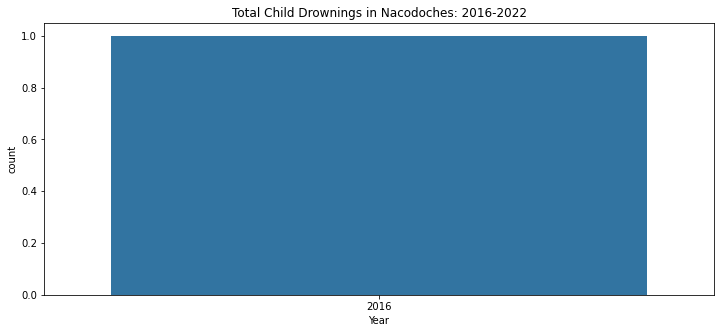

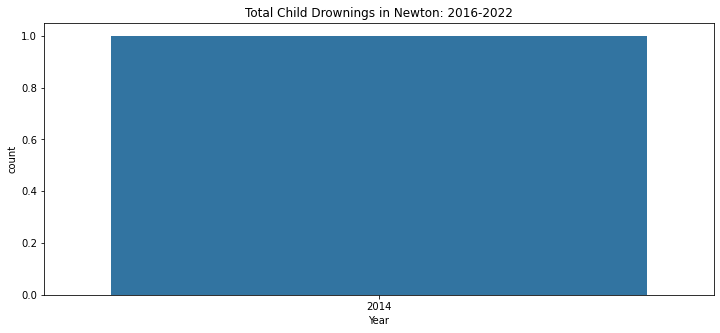

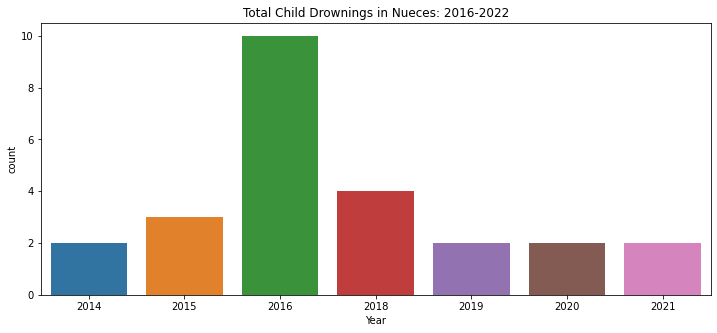

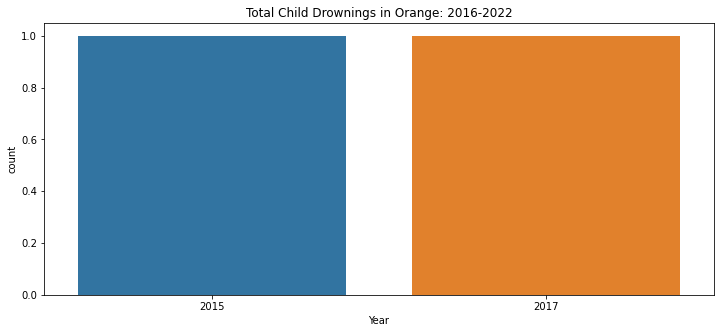

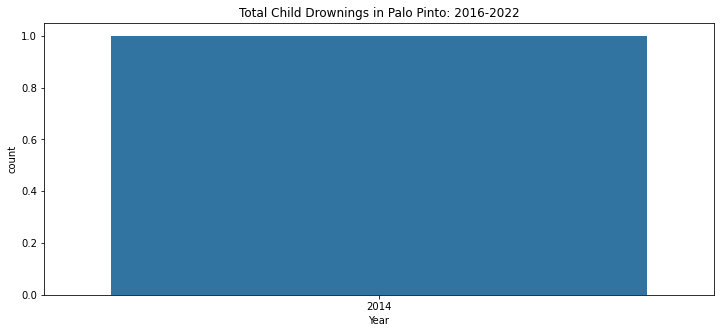

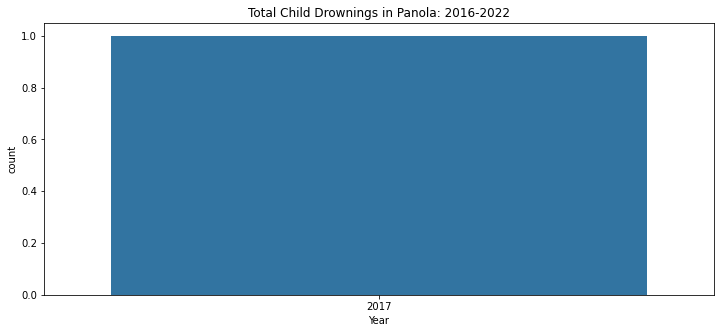

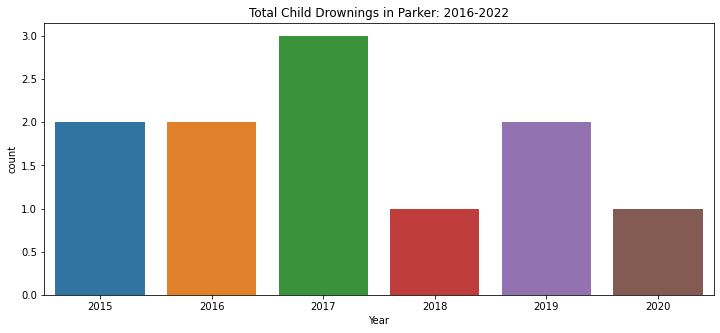

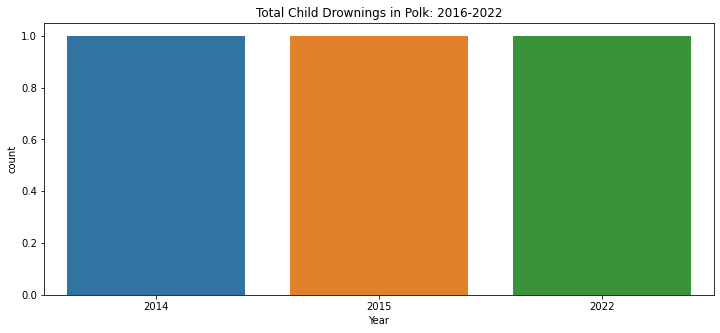

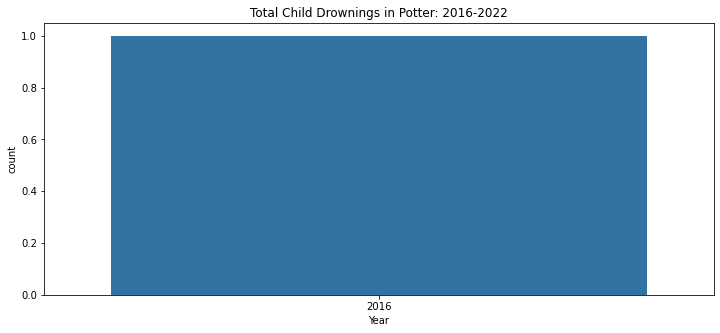

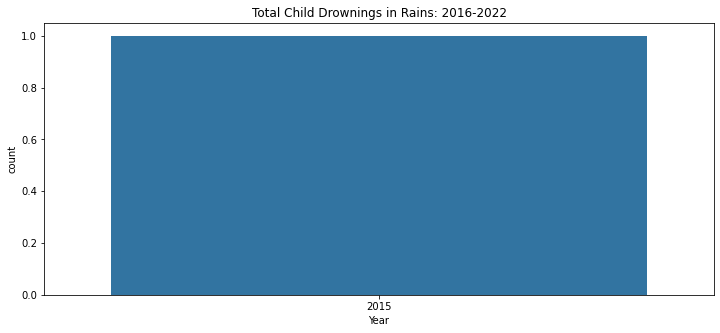

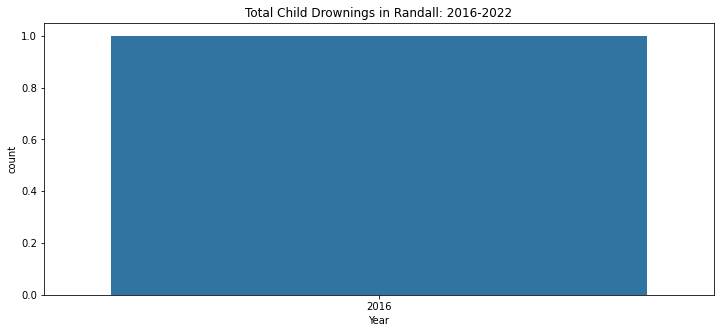

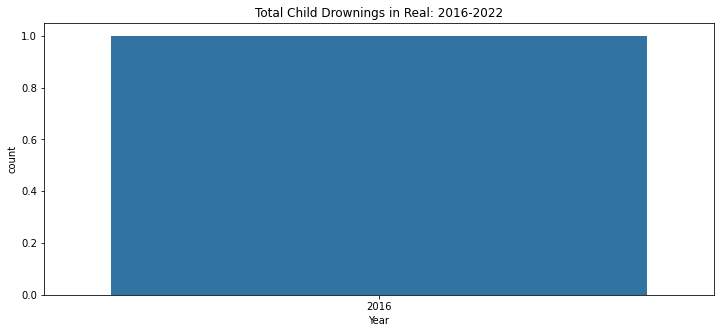

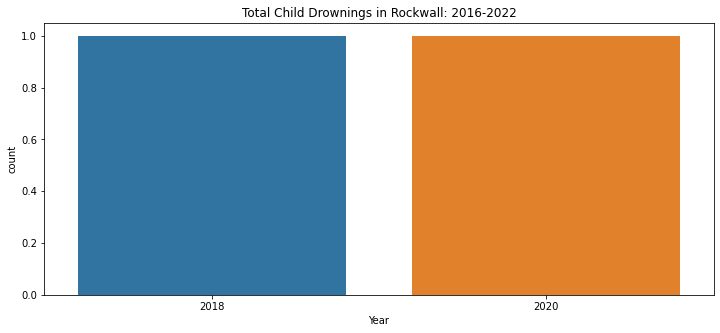

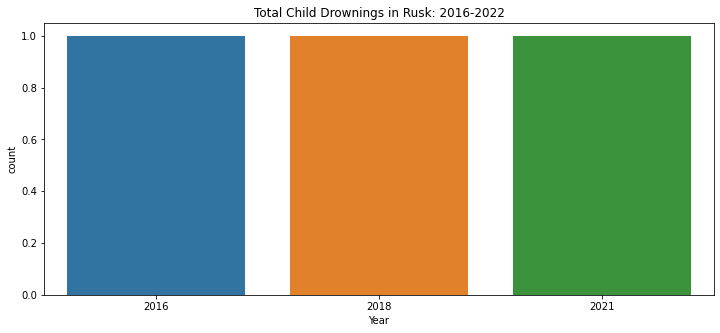

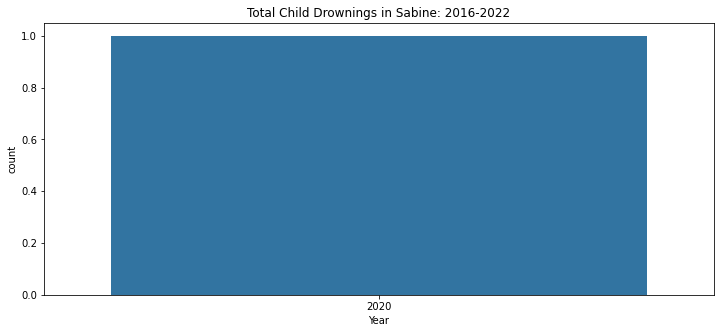

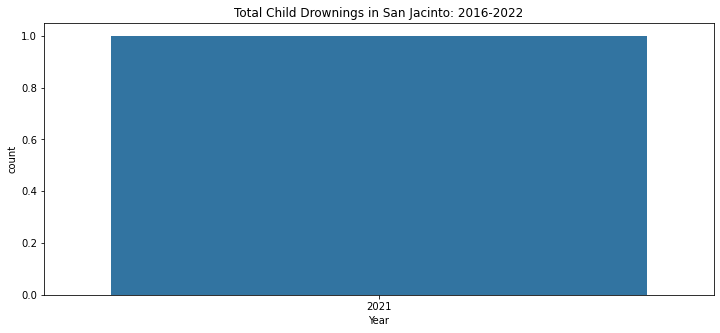

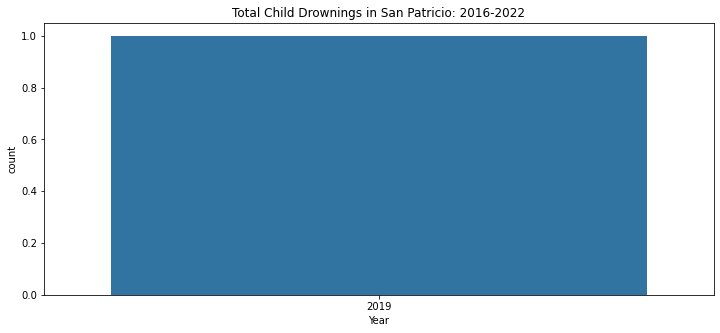

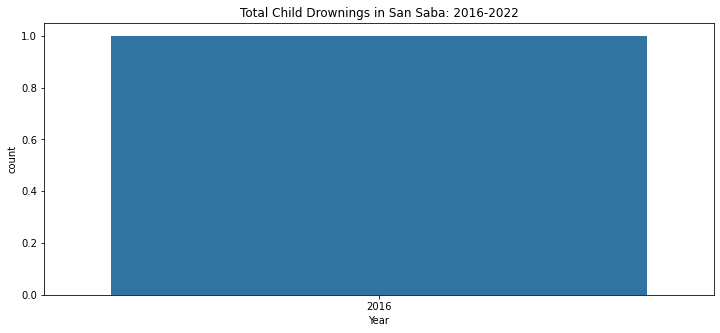

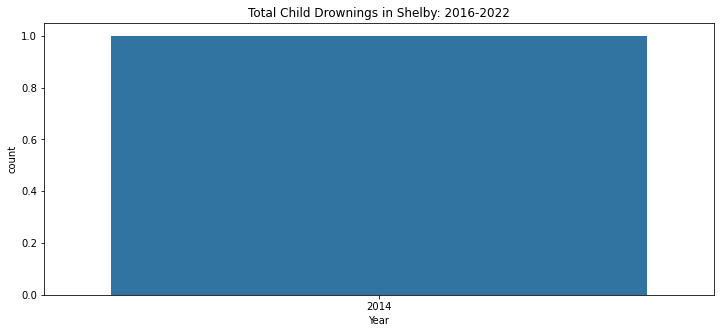

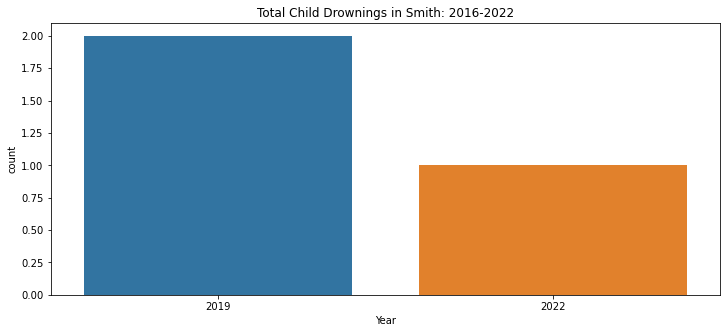

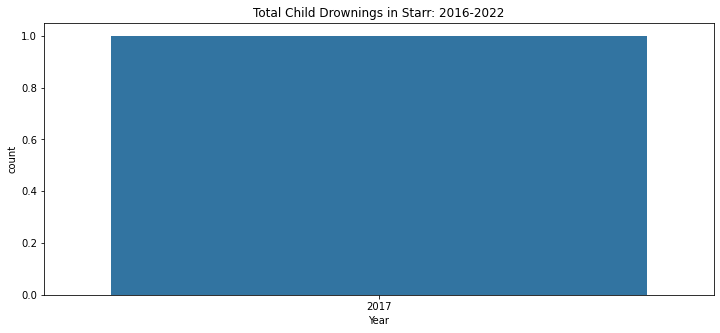

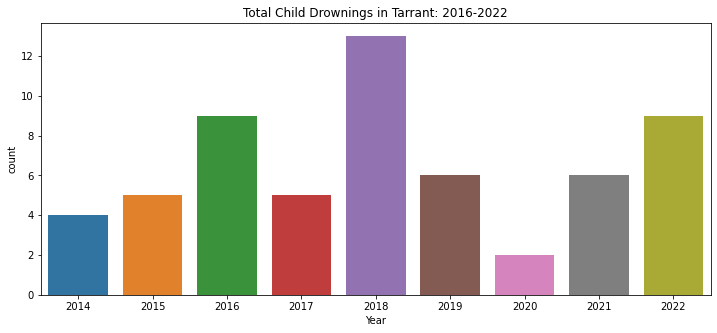

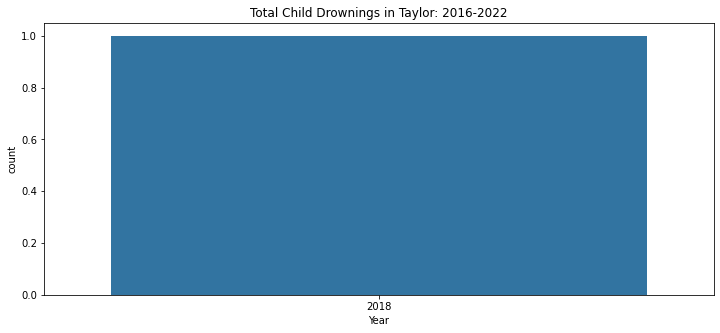

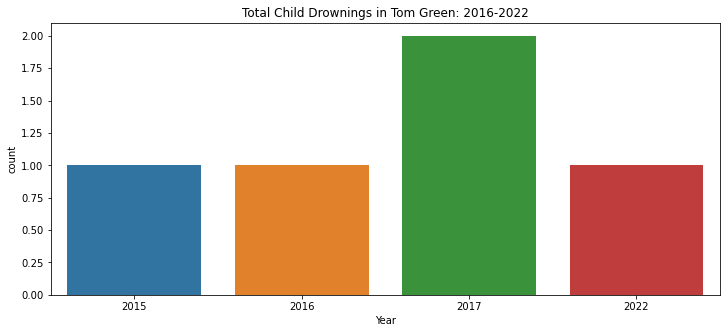

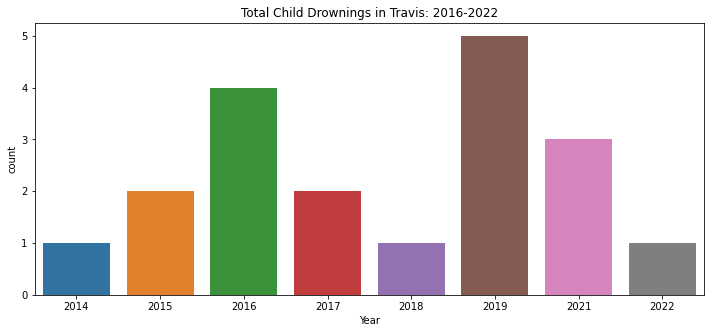

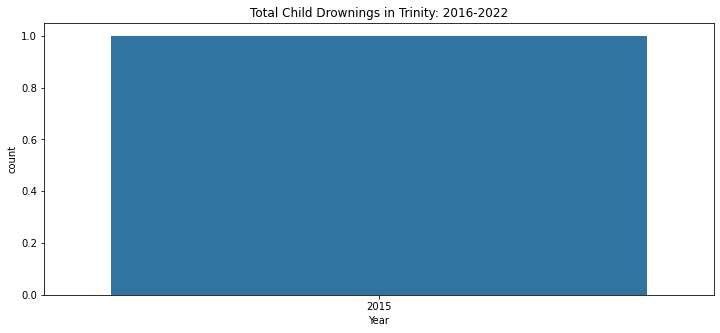

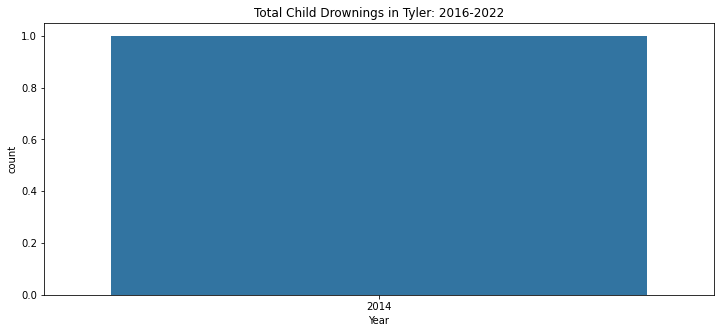

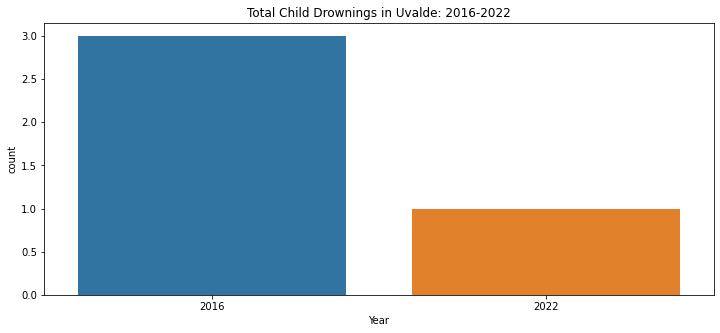

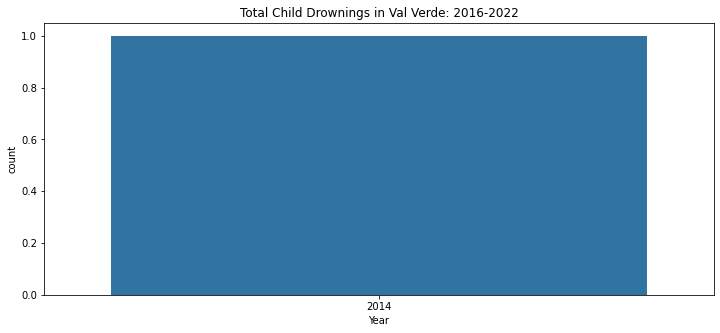

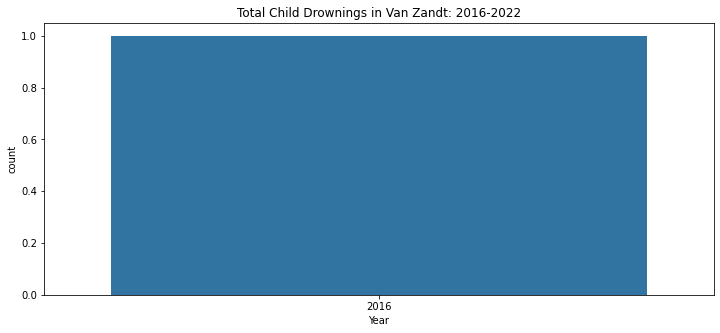

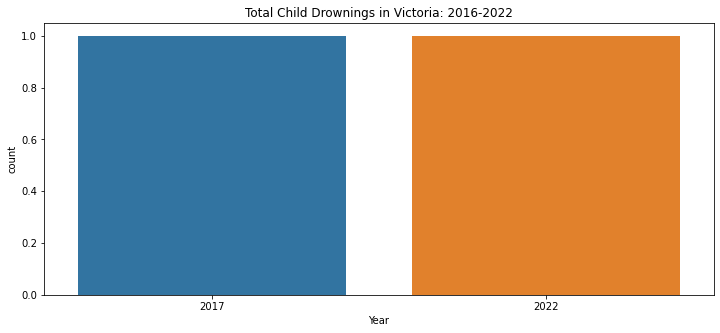

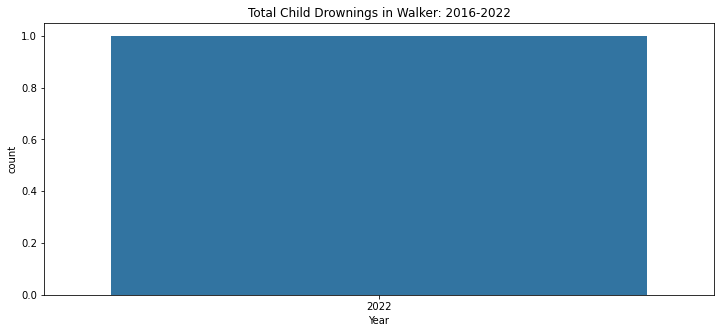

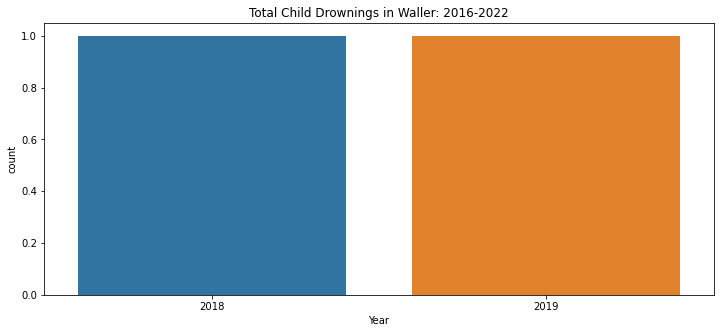

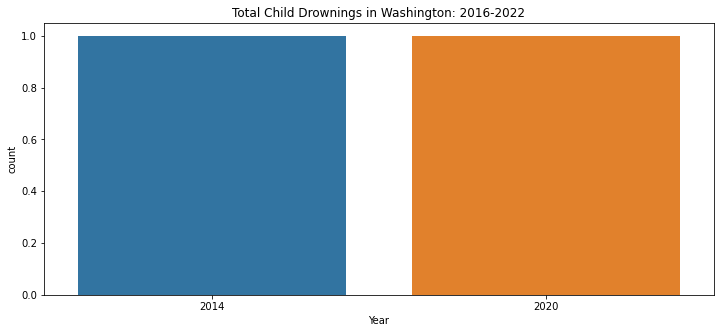

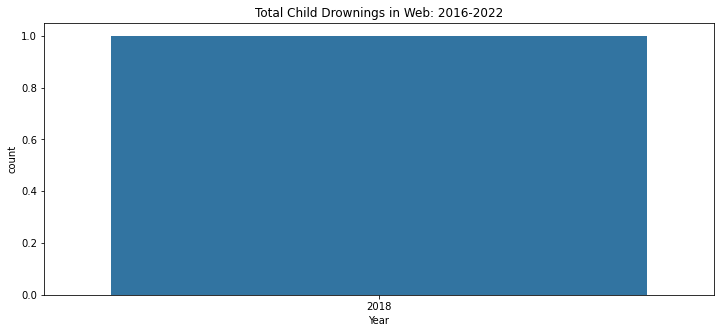

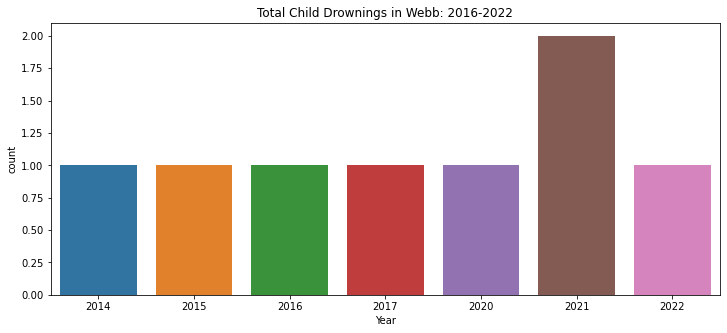

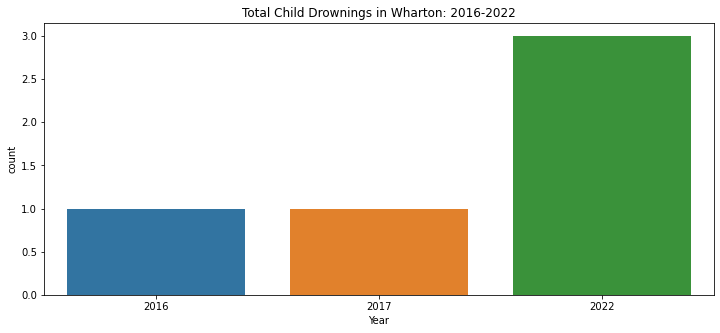

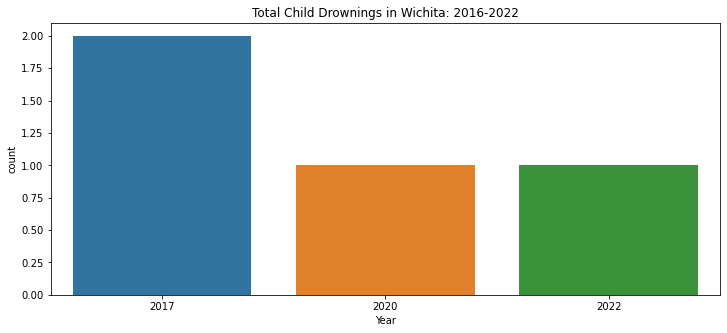

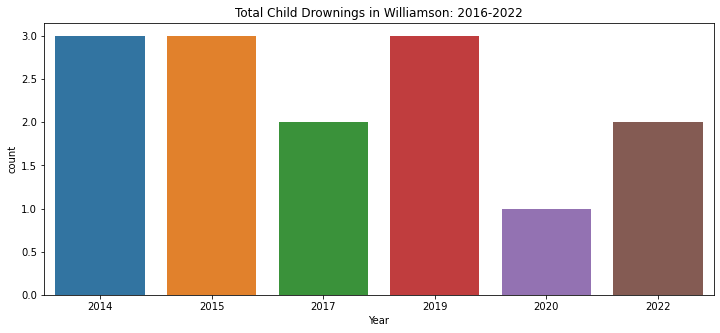

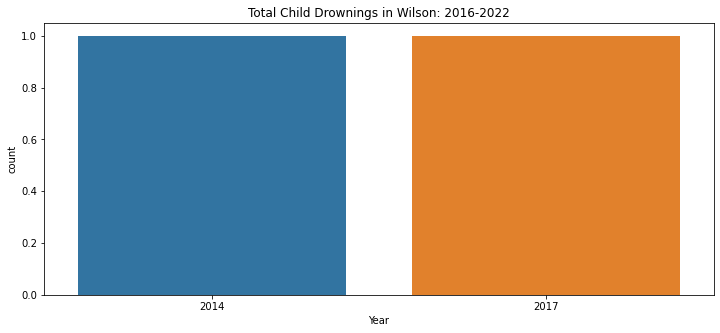

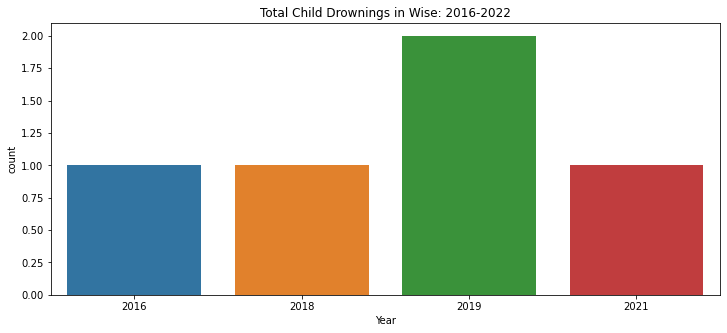

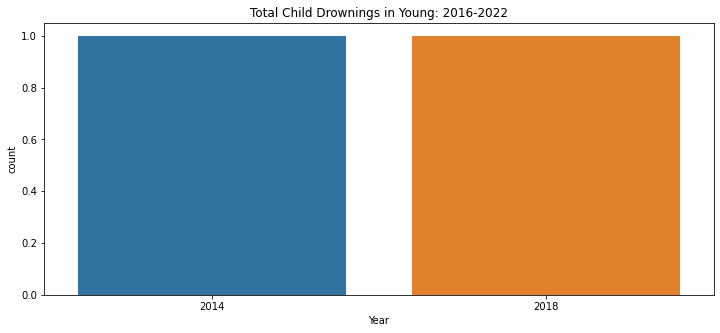

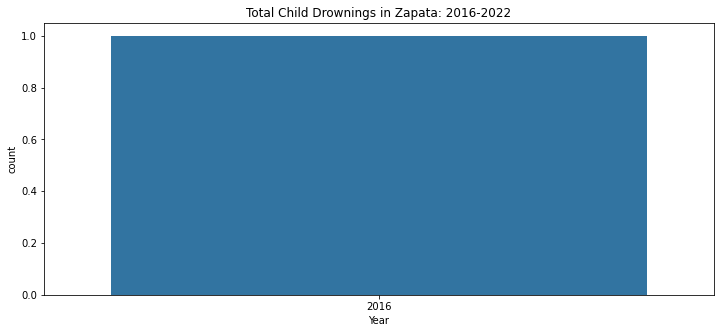

In [49]:
drownings_by_county(df)

C:\Users\aeroe\AppData\Local\Temp/ipykernel_24448/4048164536.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,5))


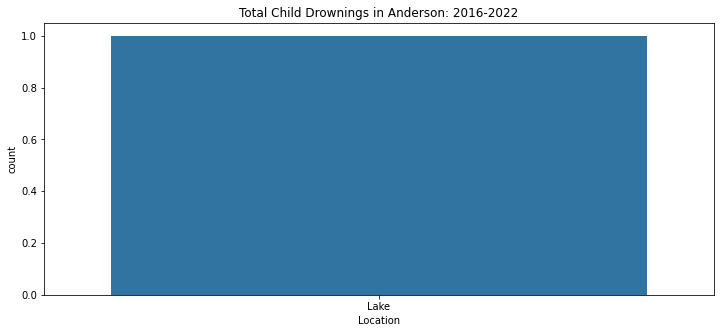

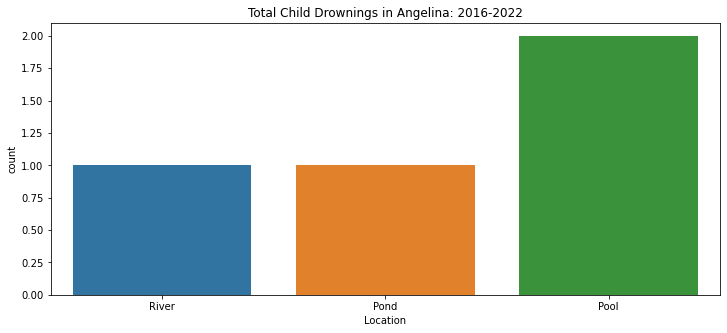

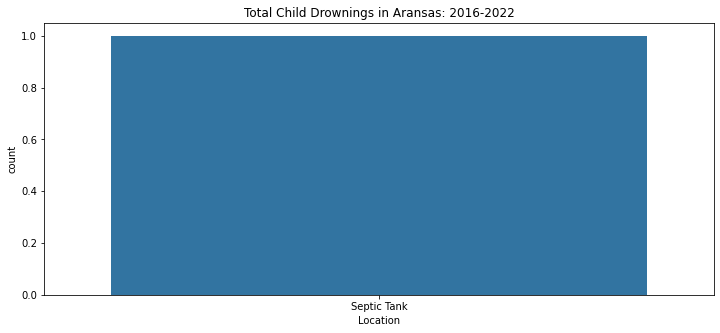

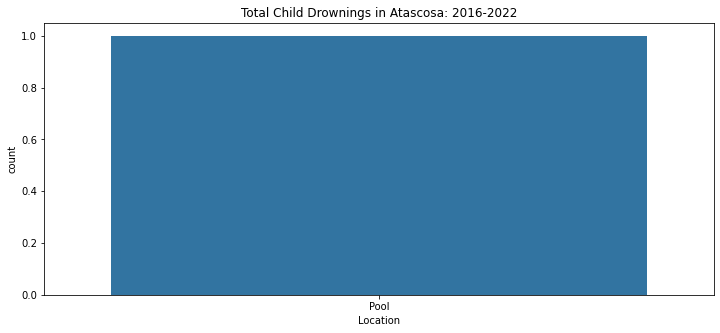

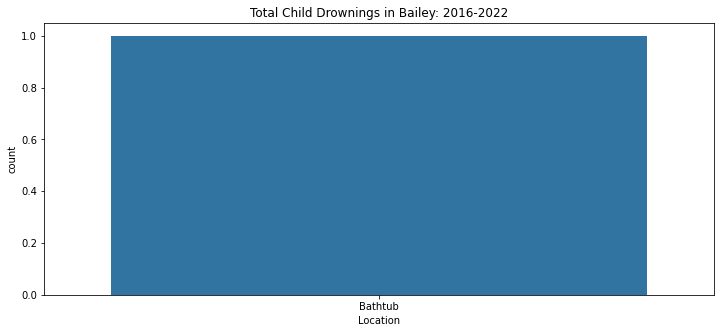

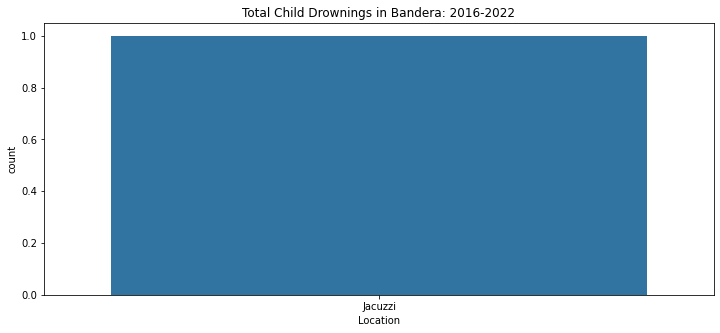

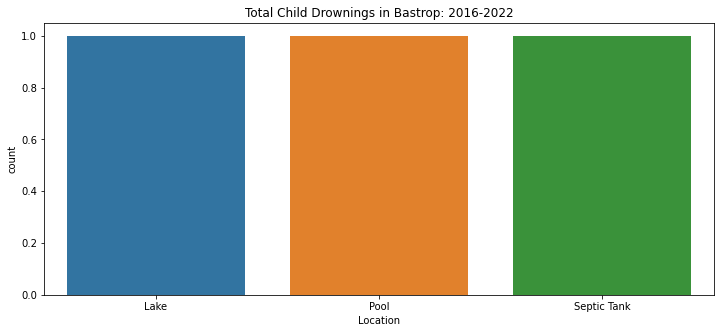

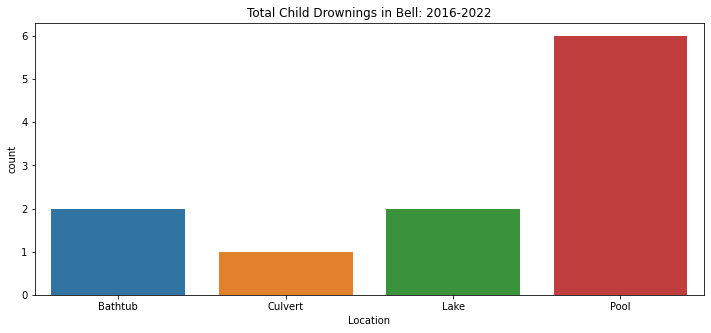

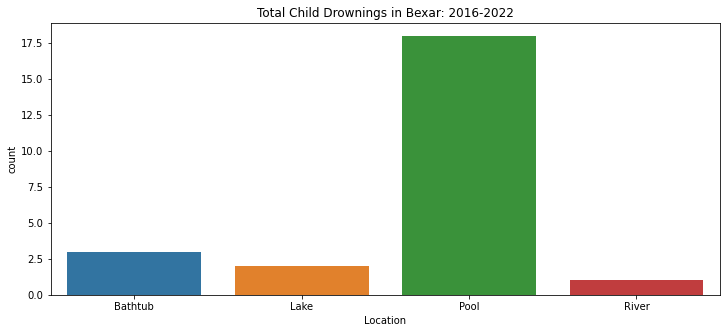

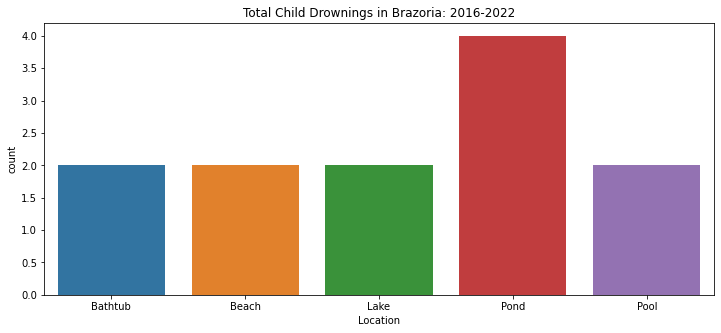

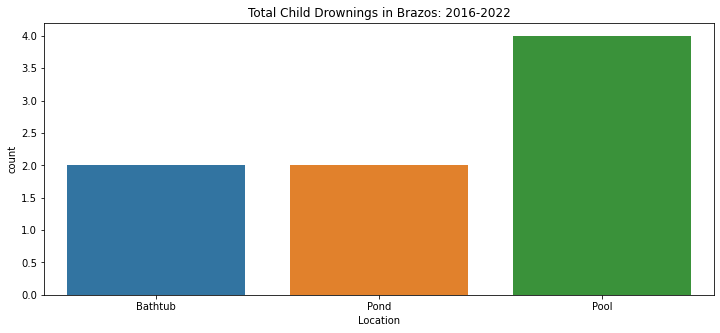

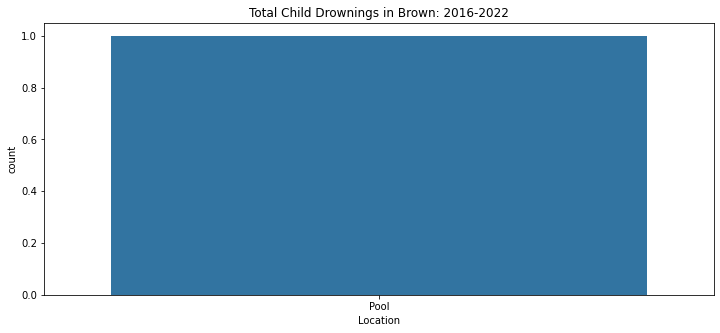

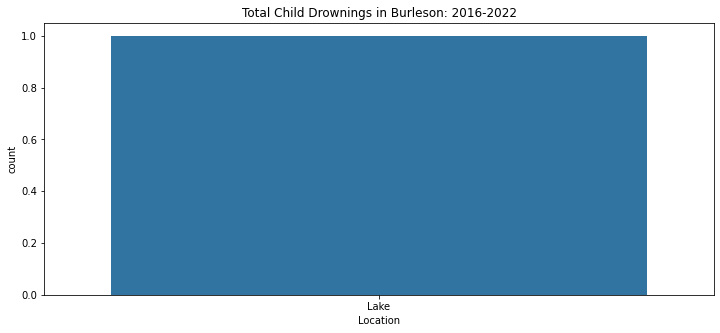

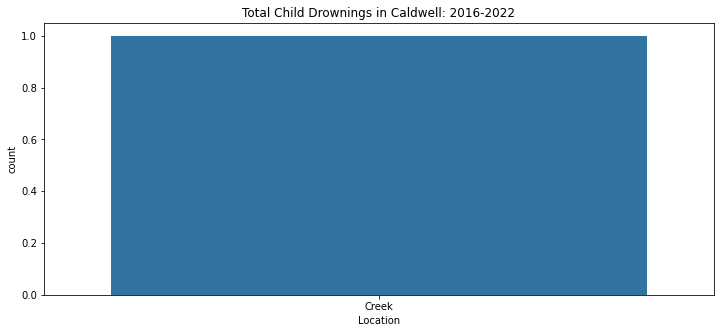

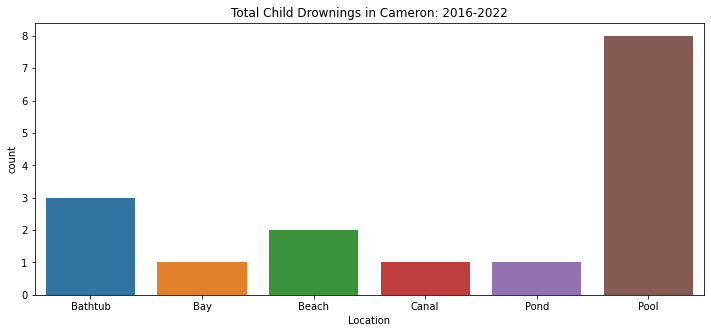

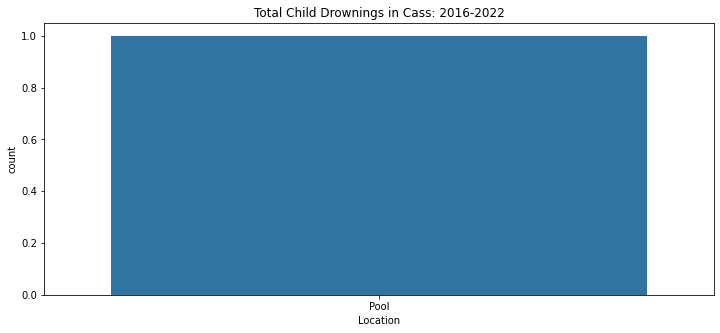

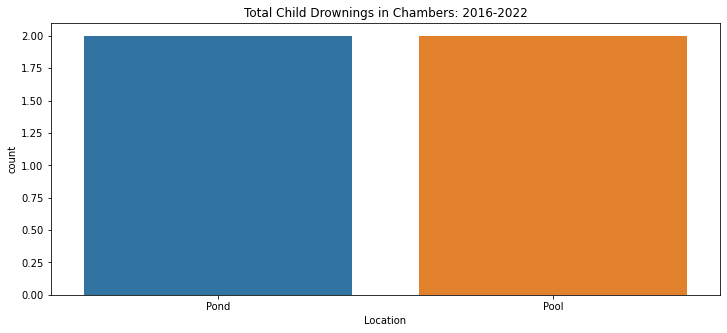

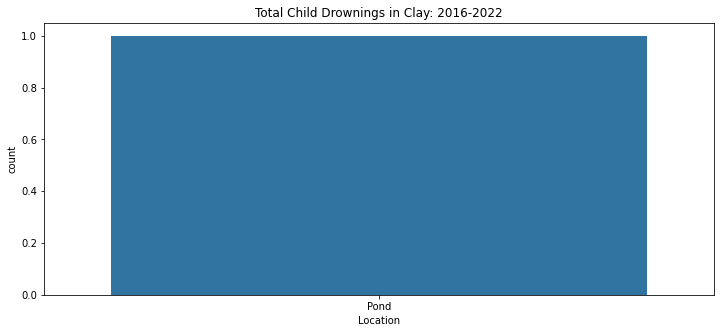

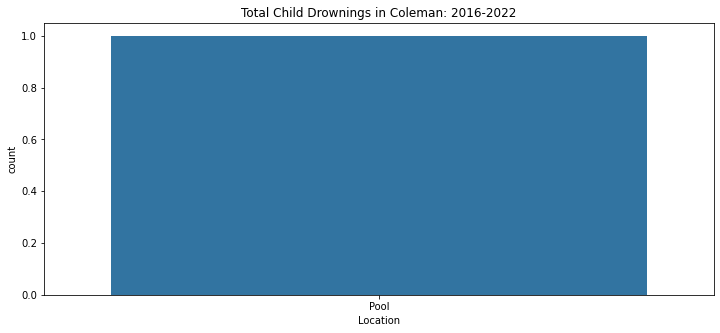

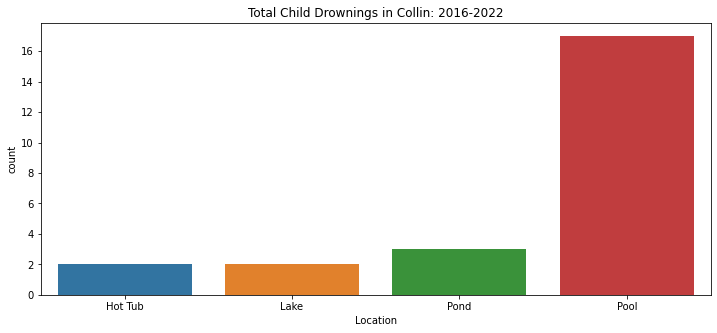

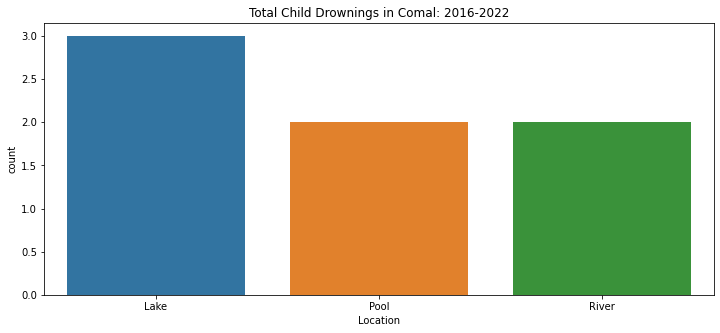

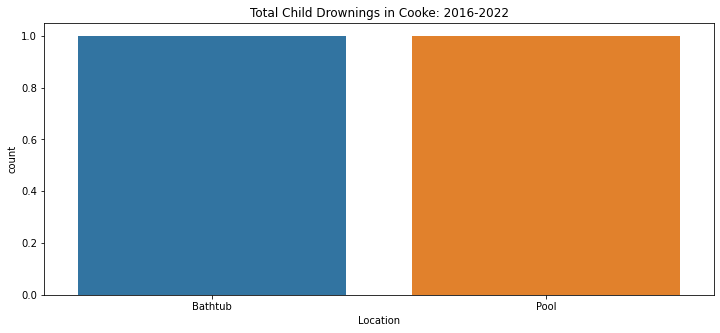

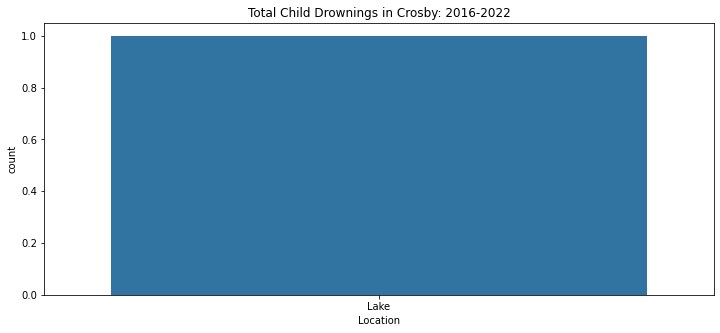

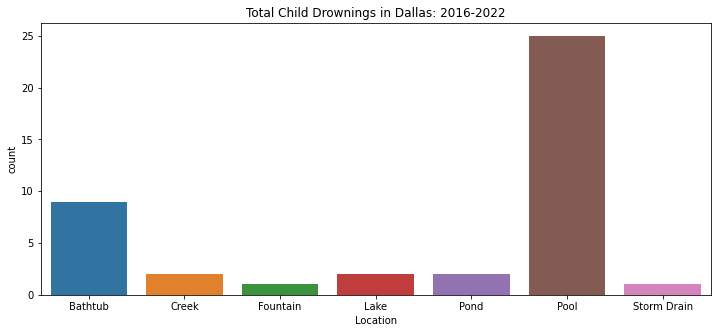

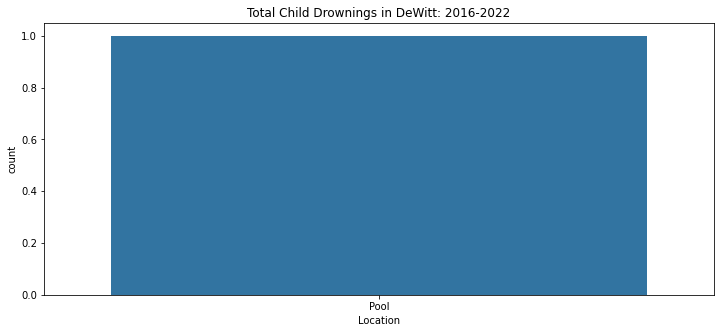

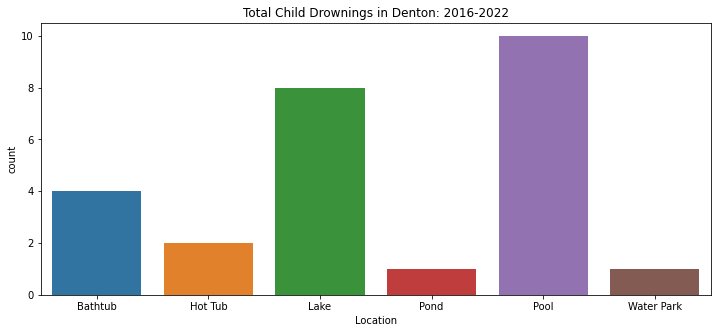

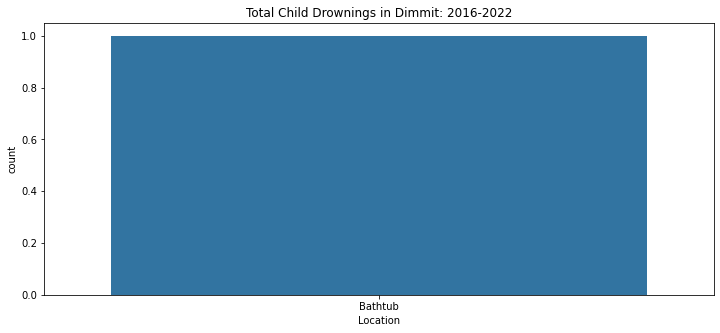

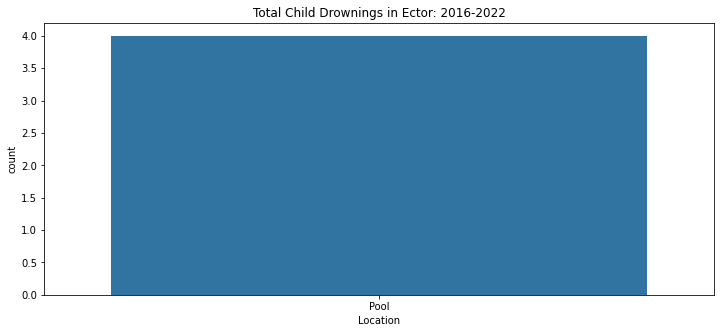

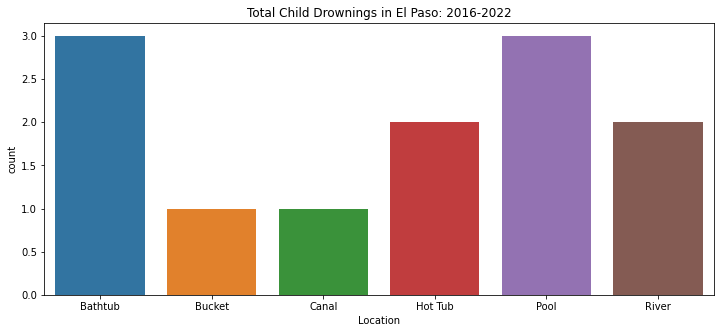

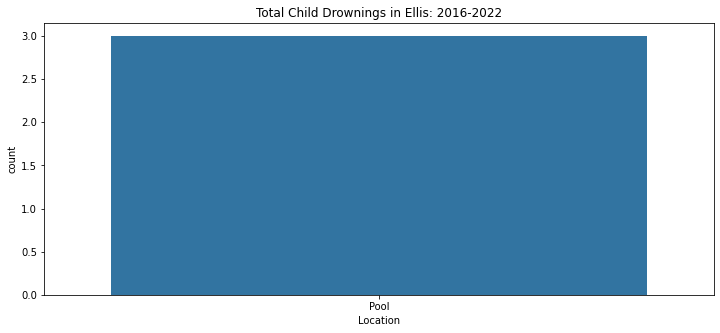

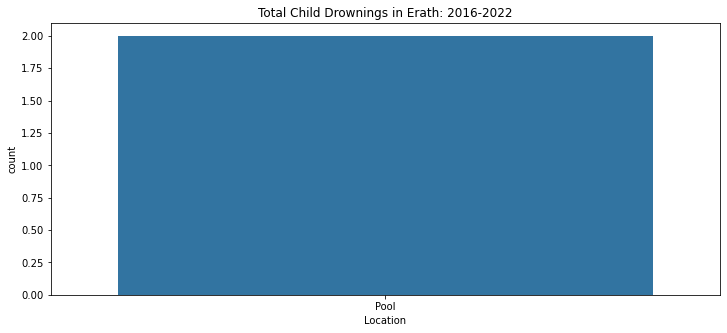

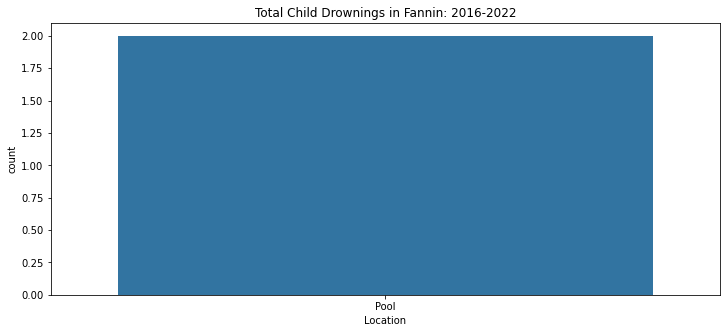

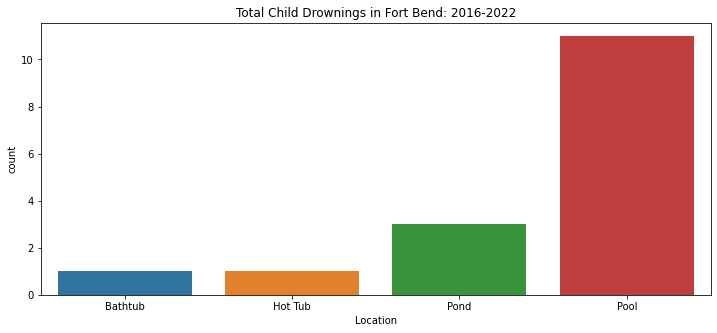

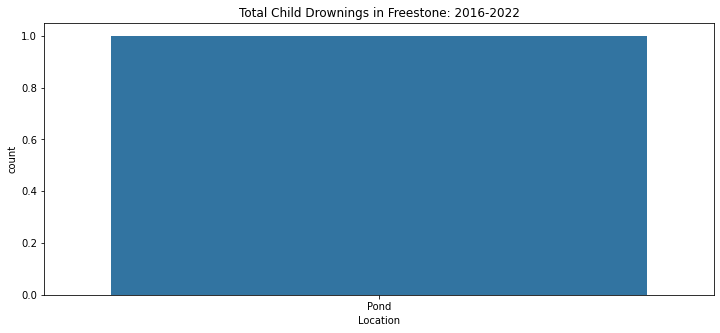

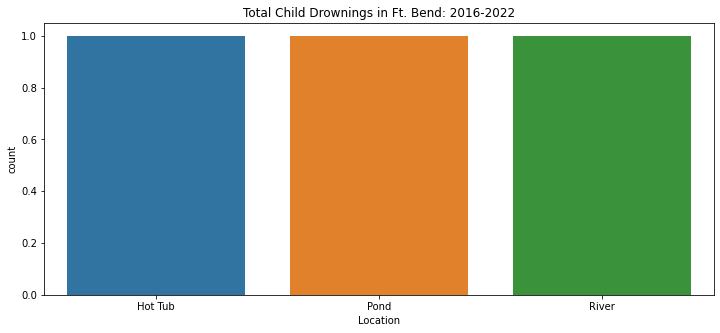

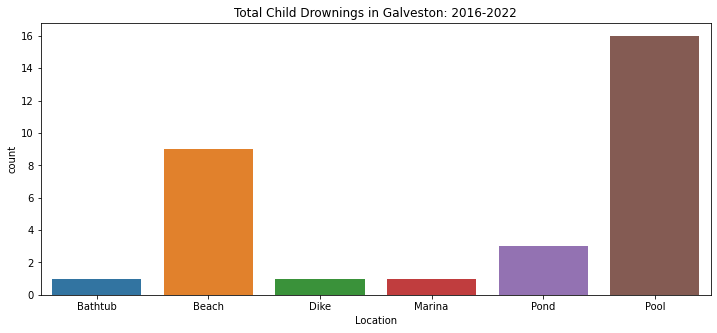

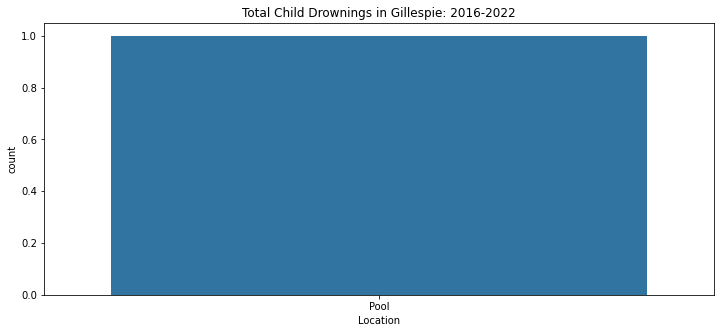

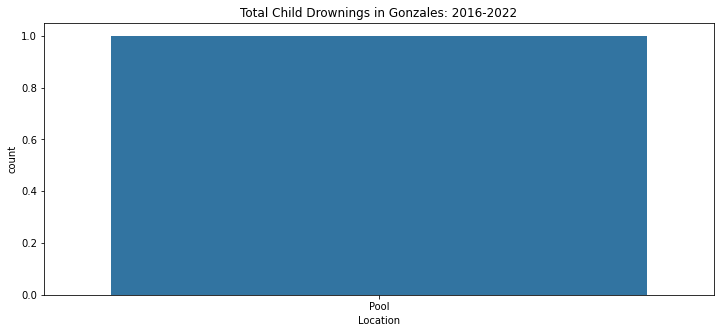

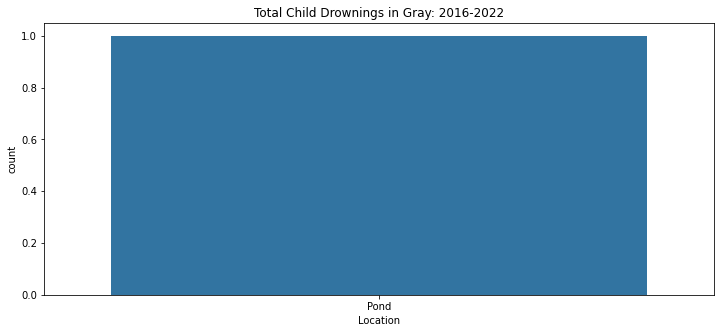

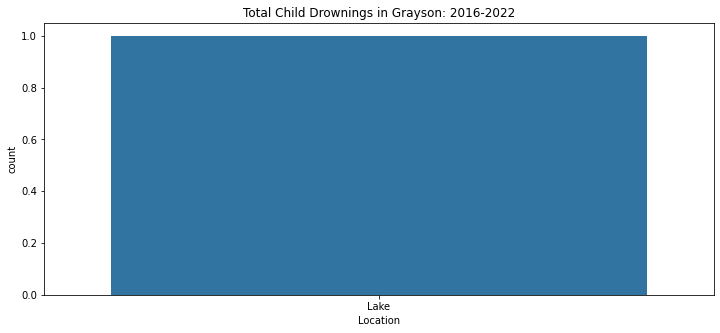

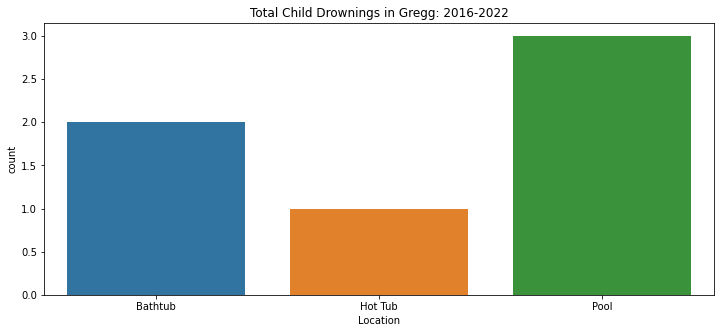

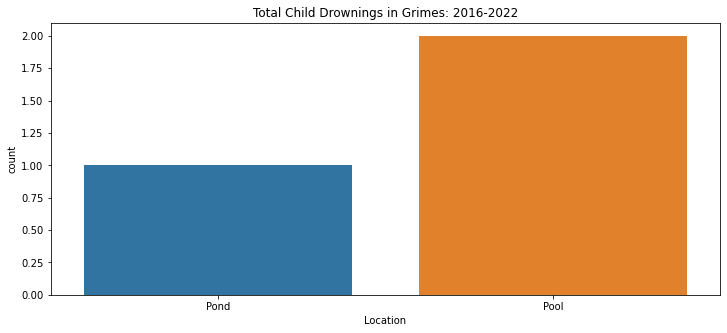

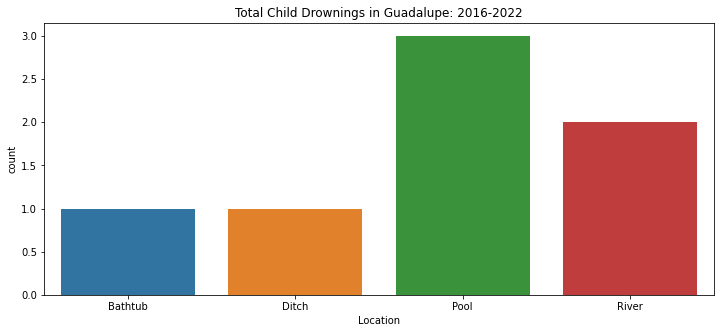

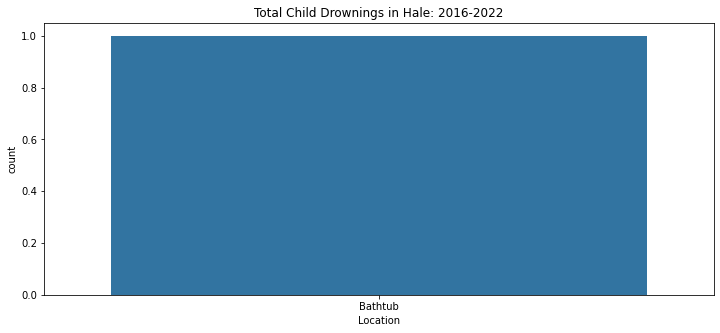

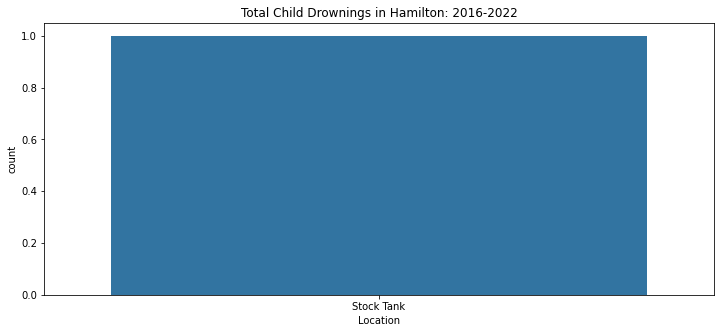

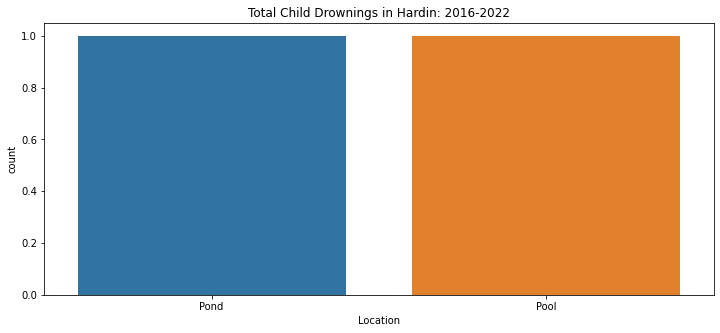

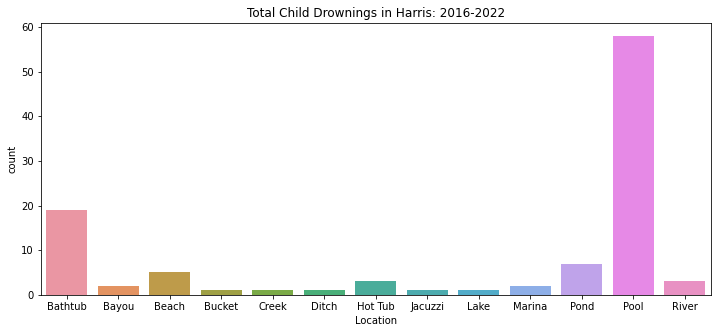

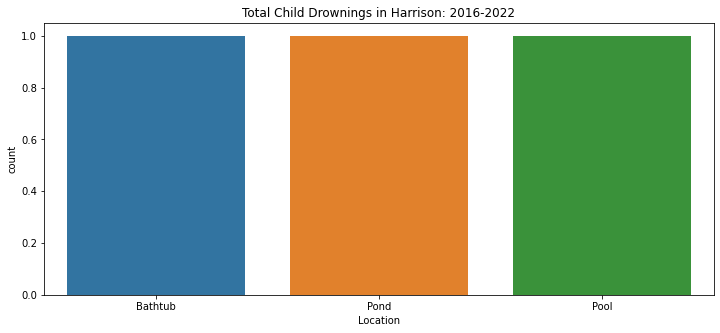

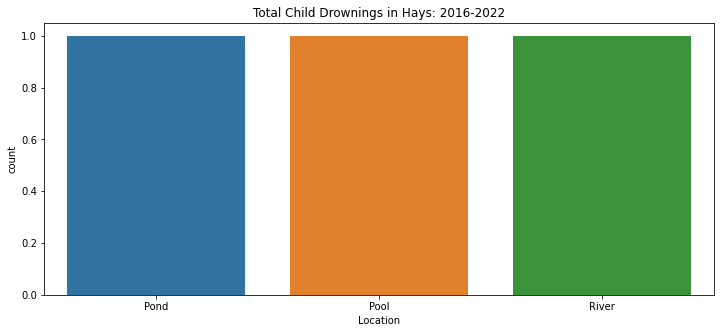

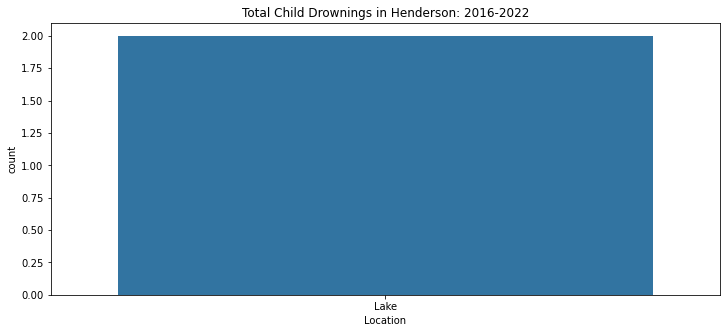

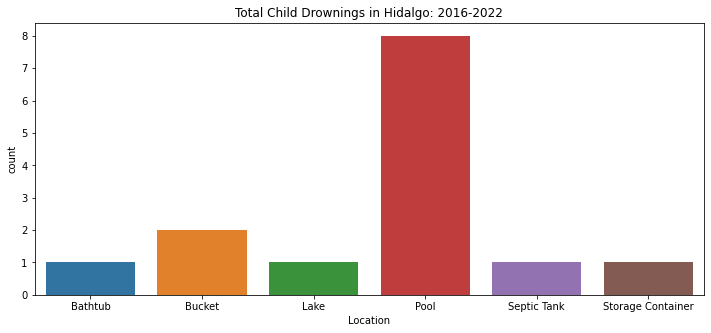

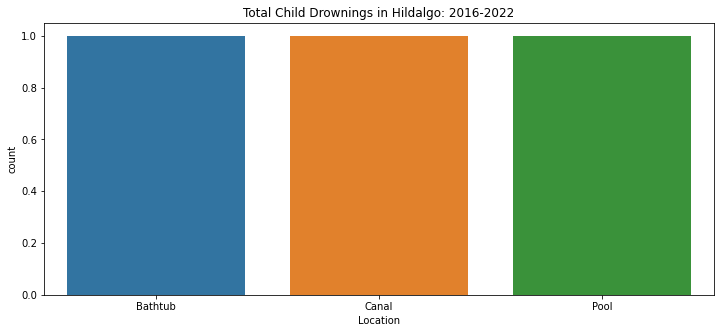

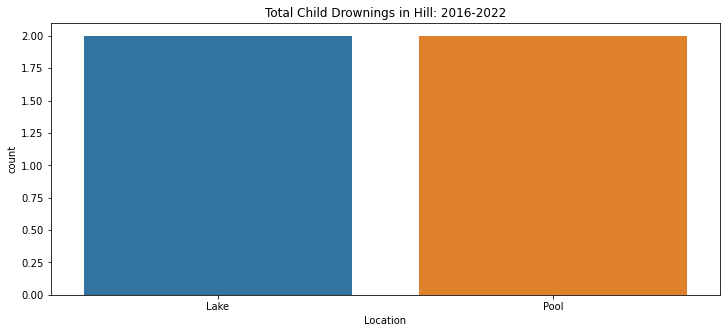

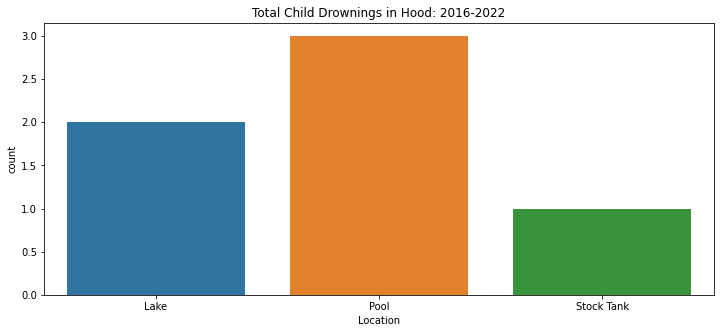

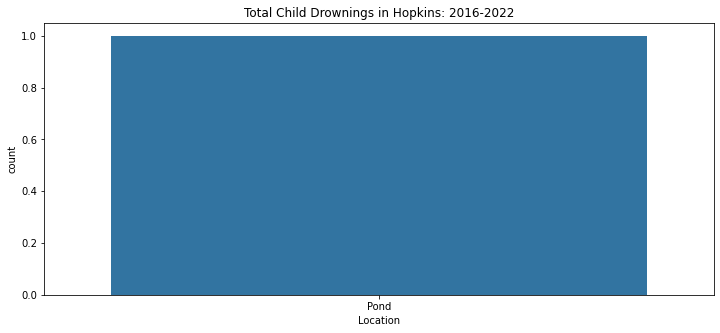

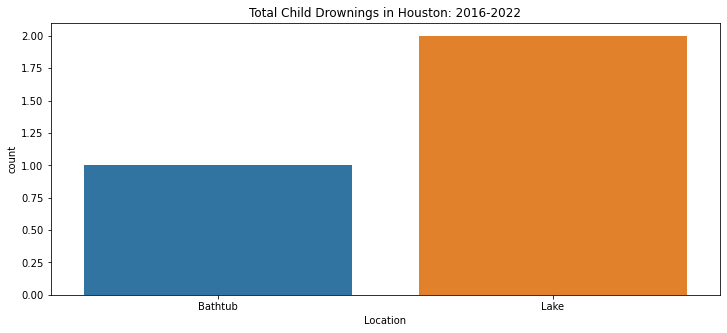

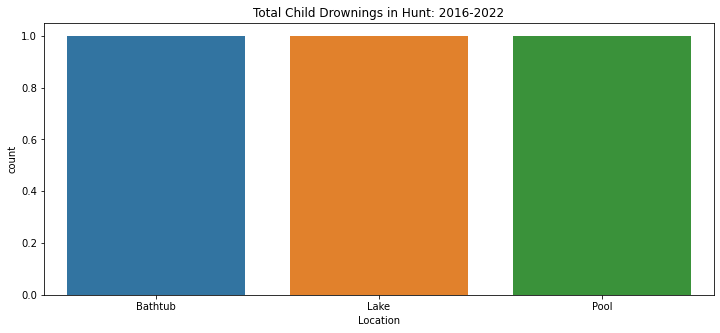

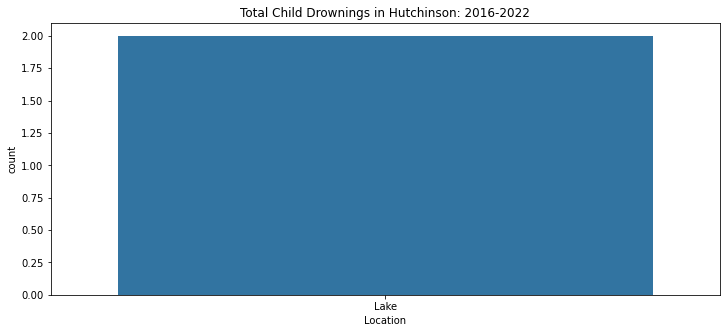

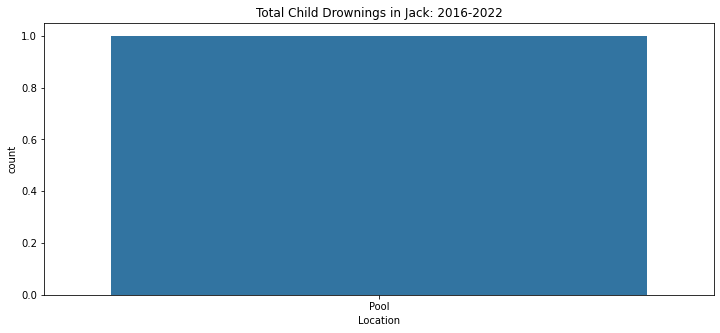

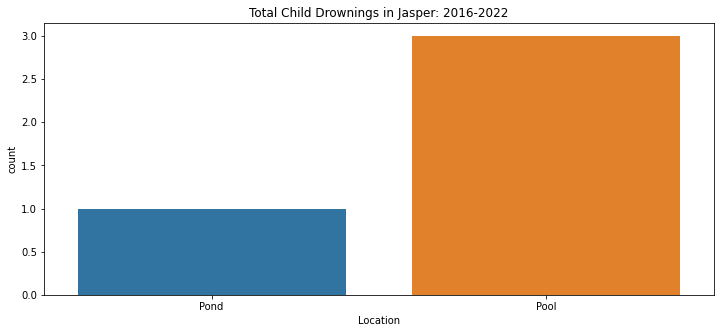

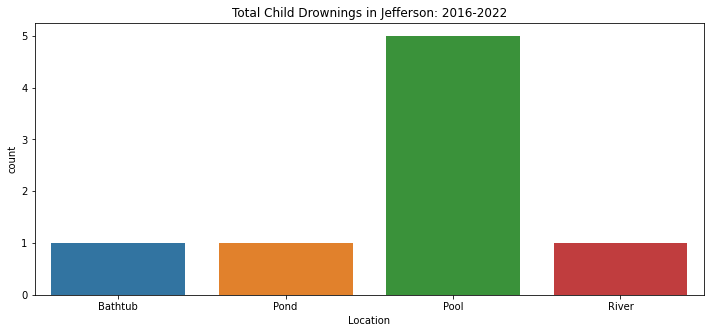

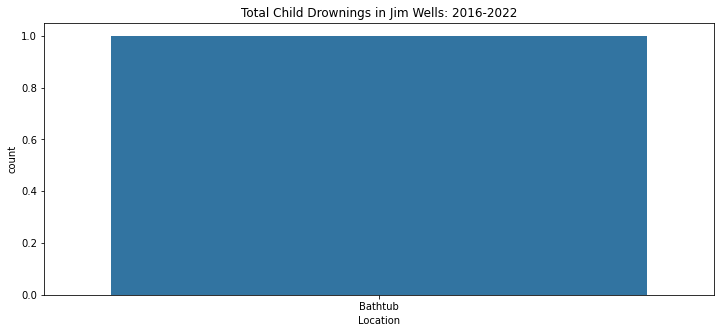

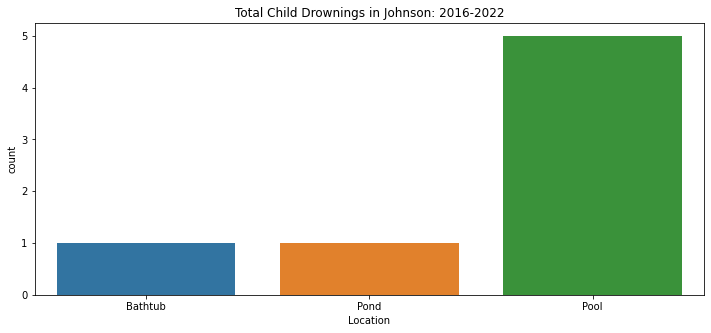

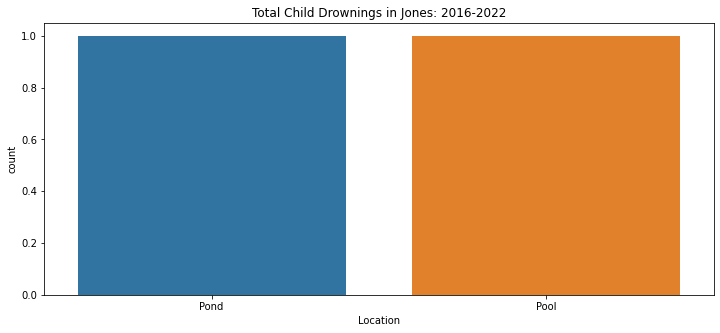

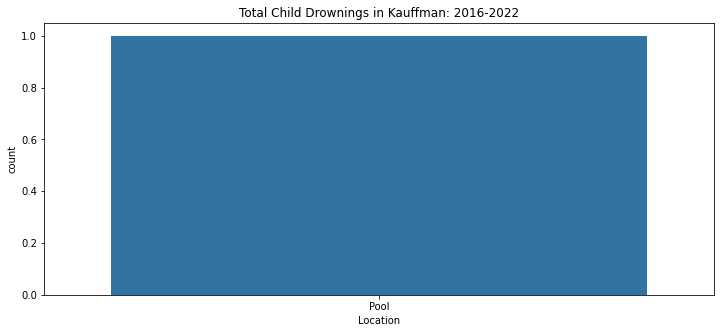

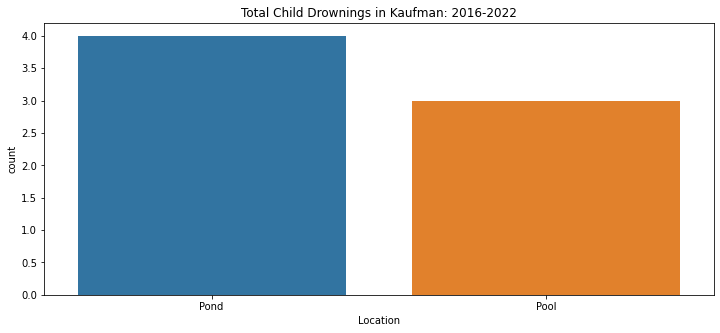

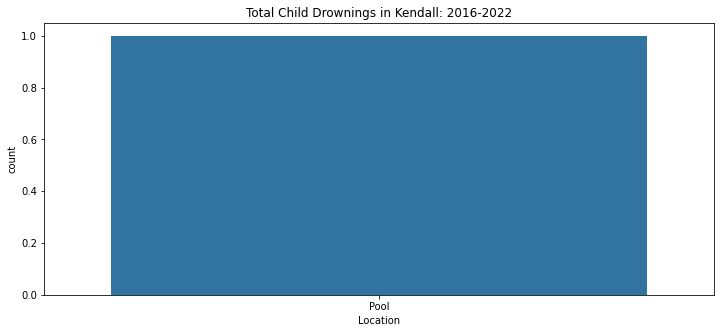

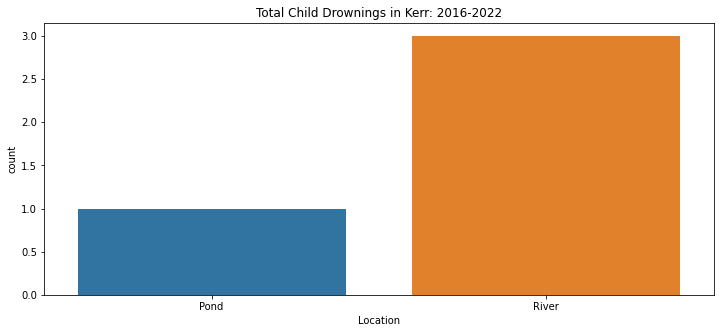

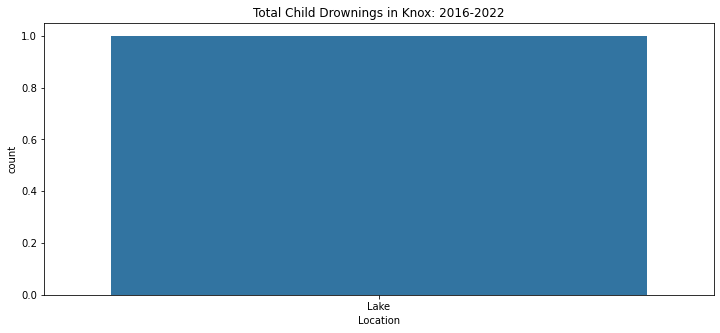

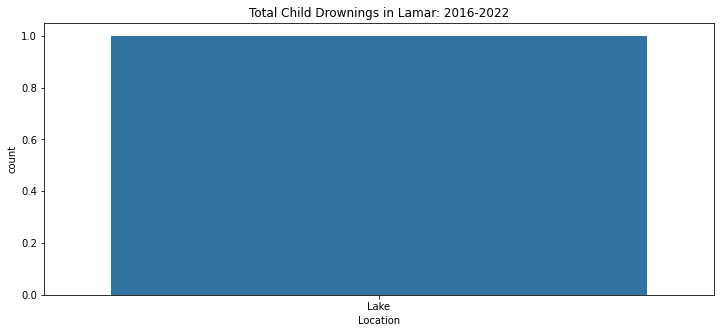

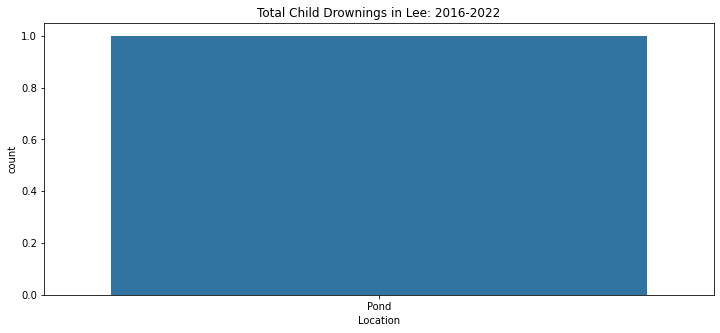

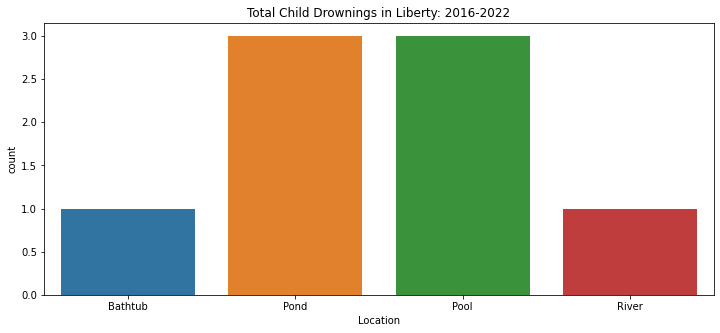

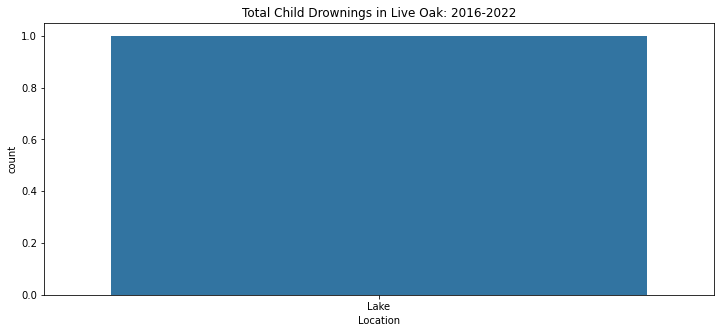

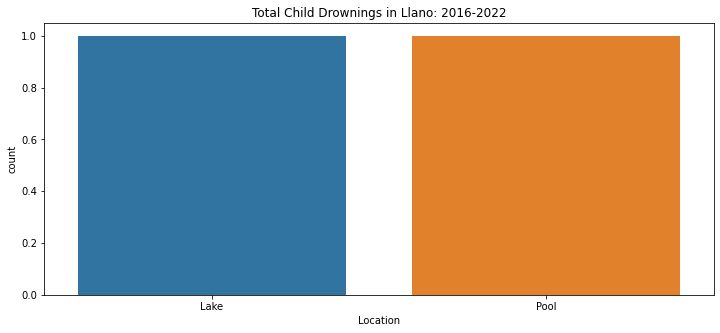

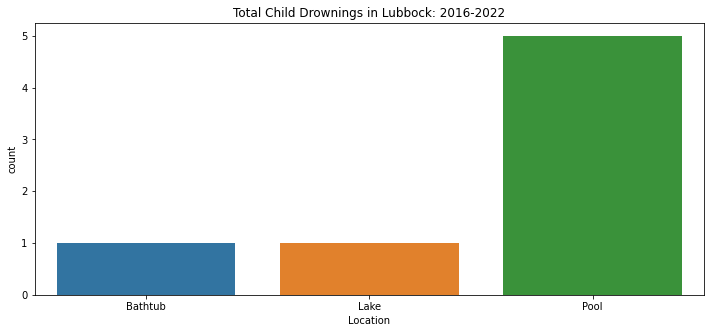

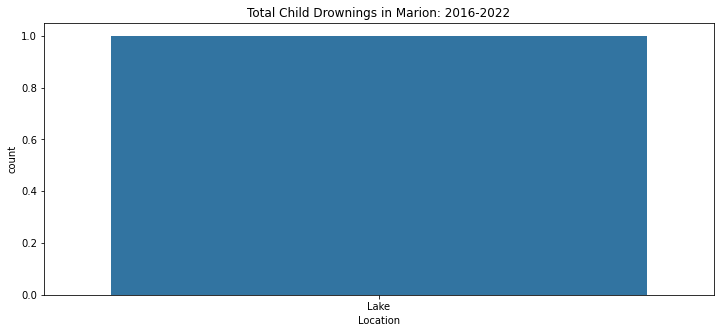

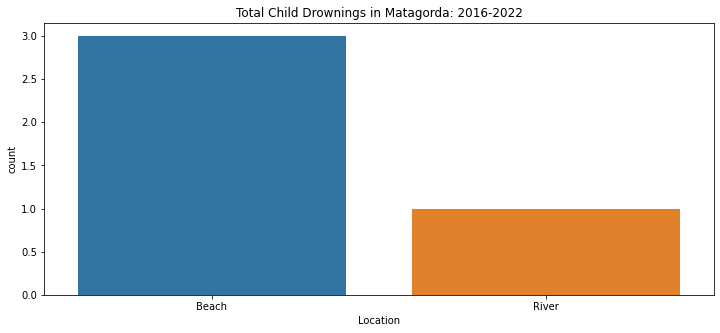

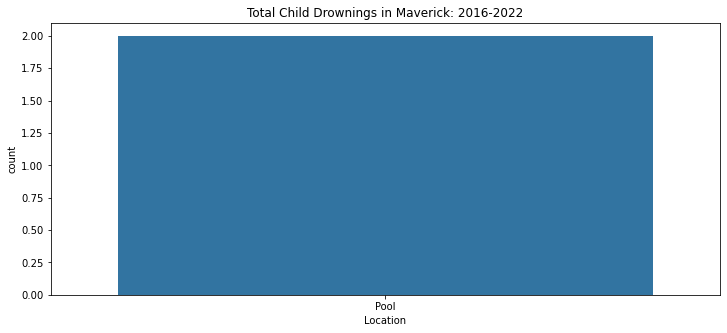

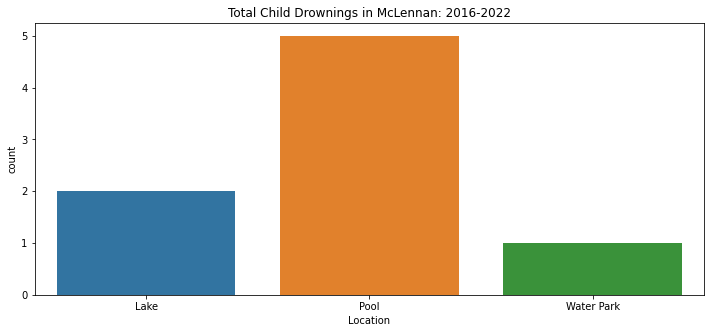

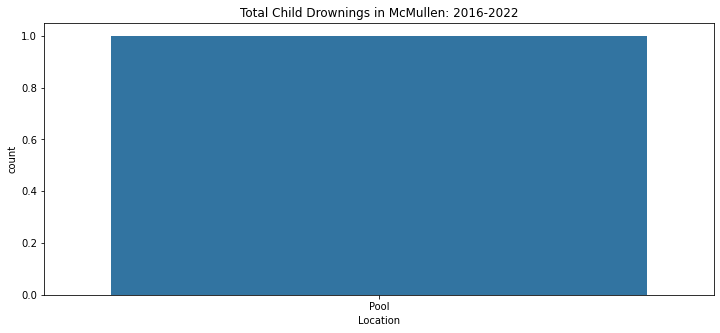

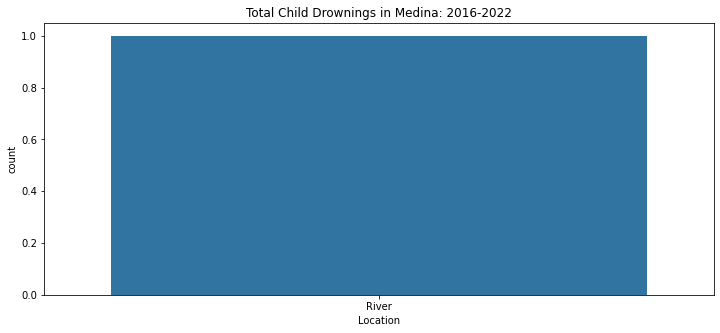

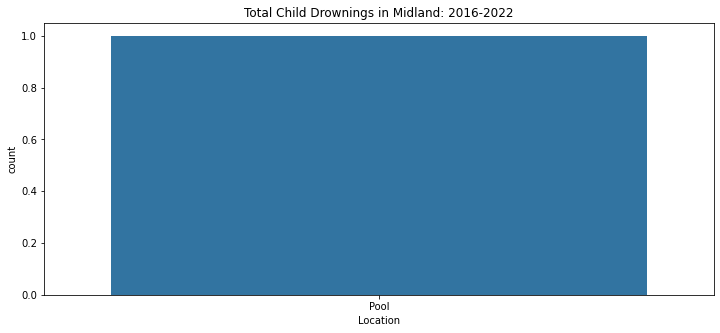

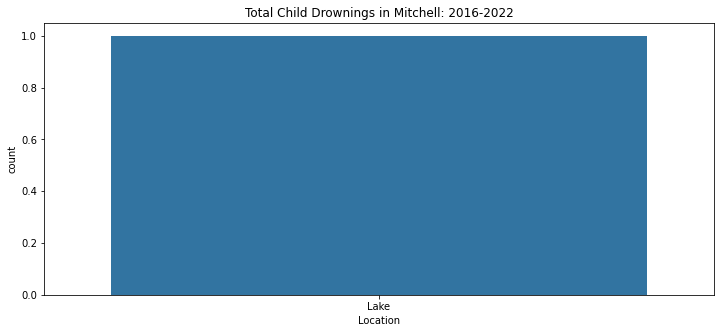

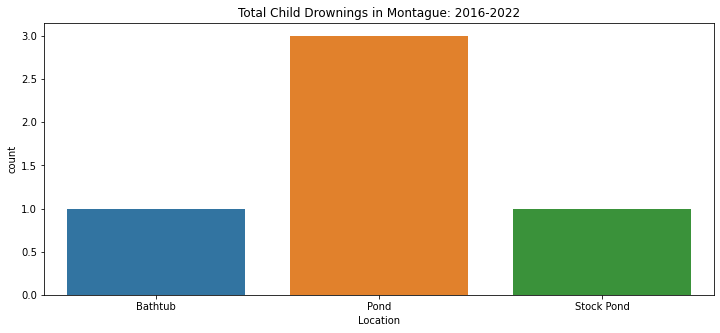

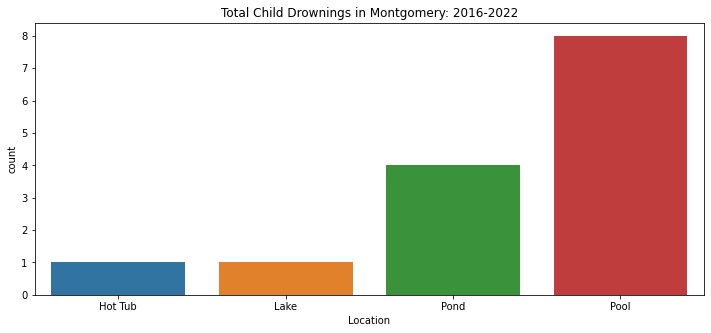

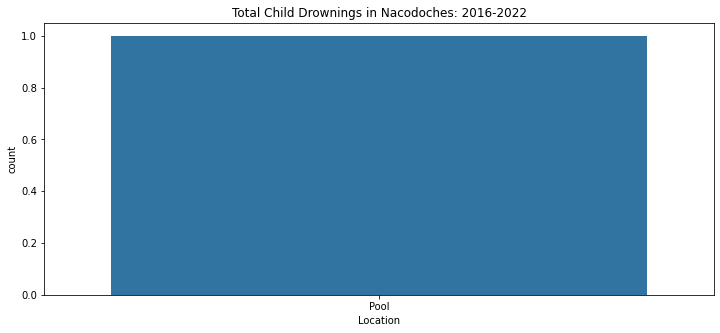

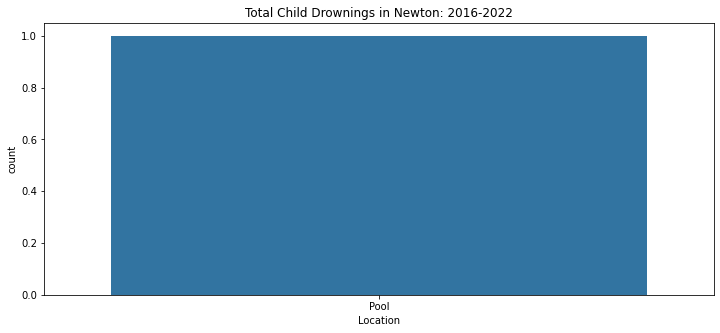

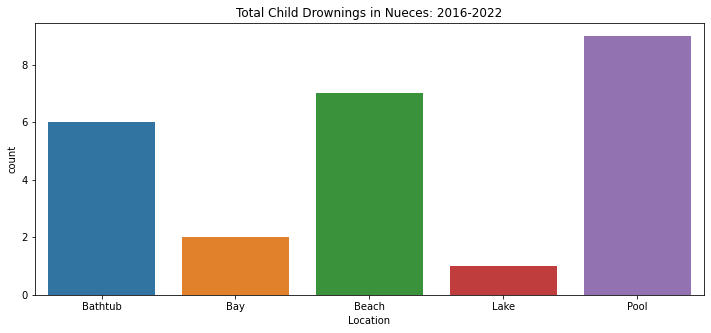

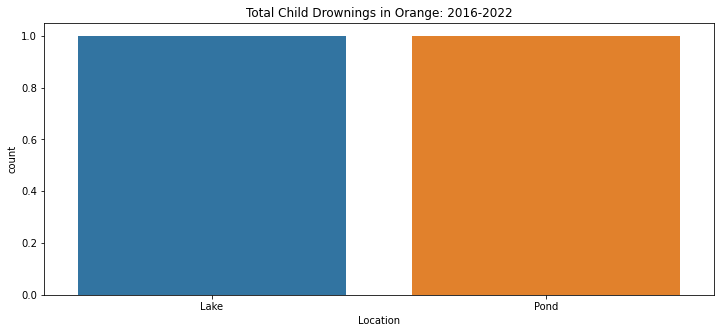

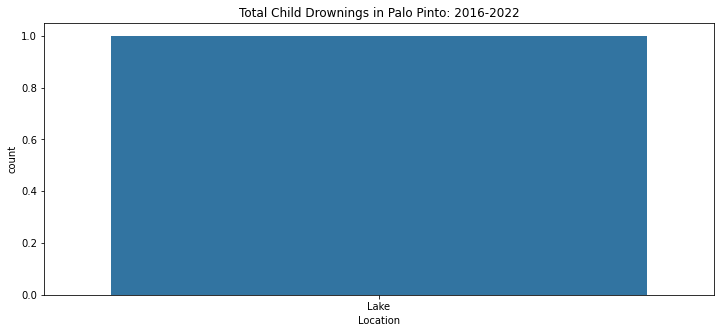

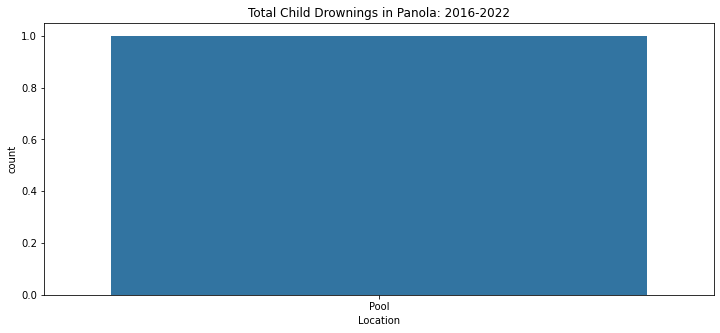

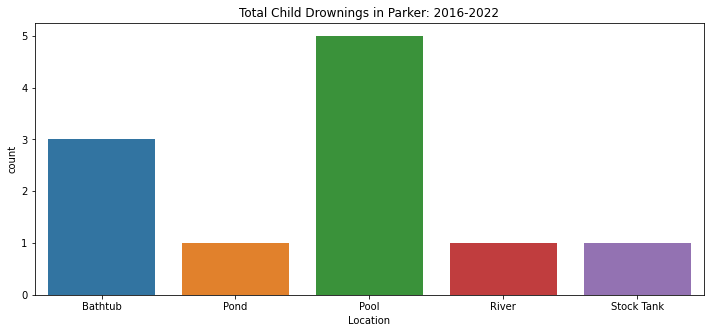

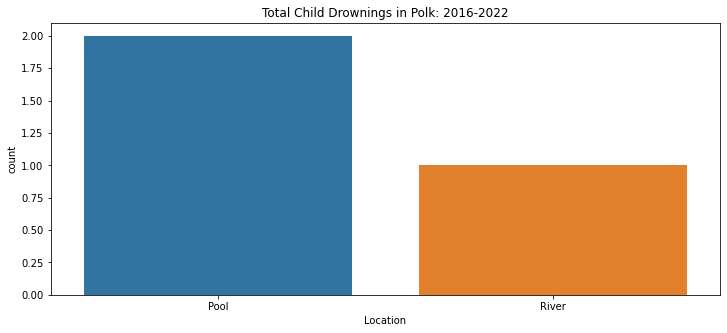

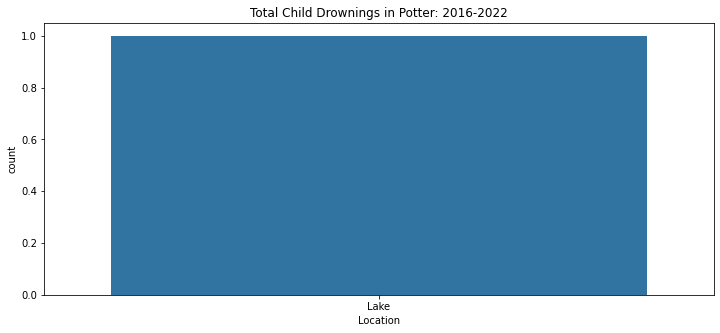

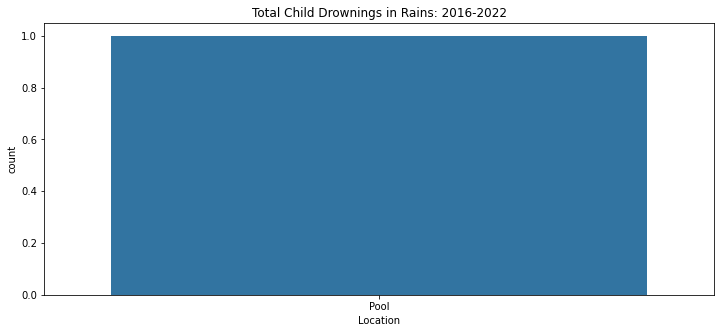

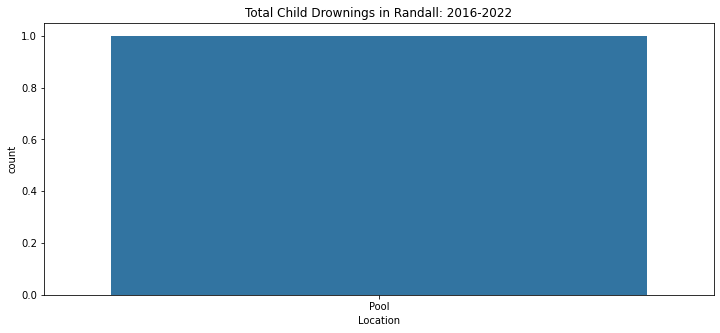

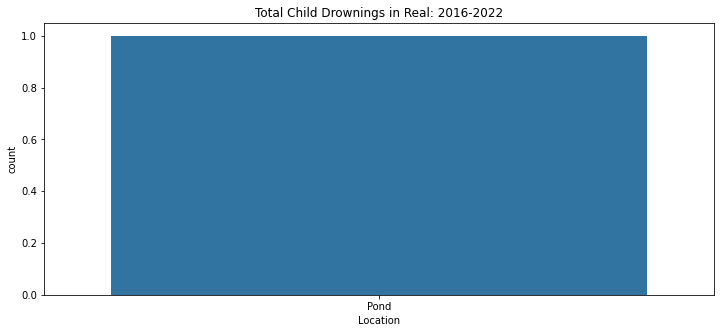

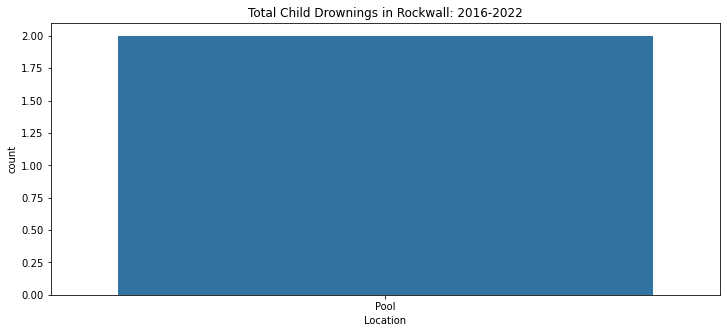

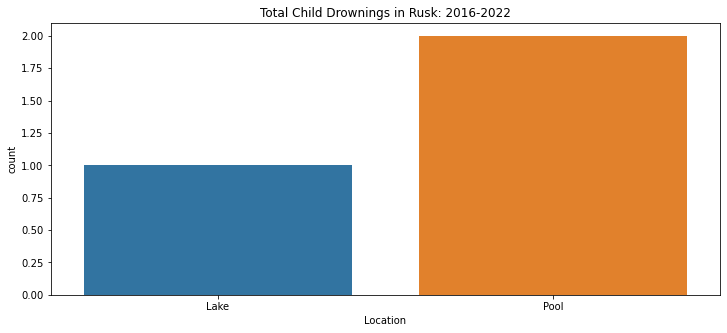

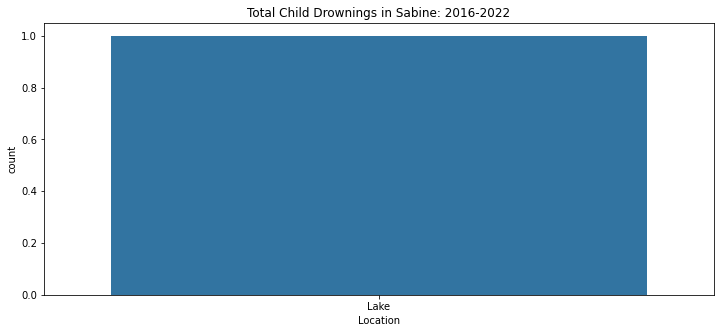

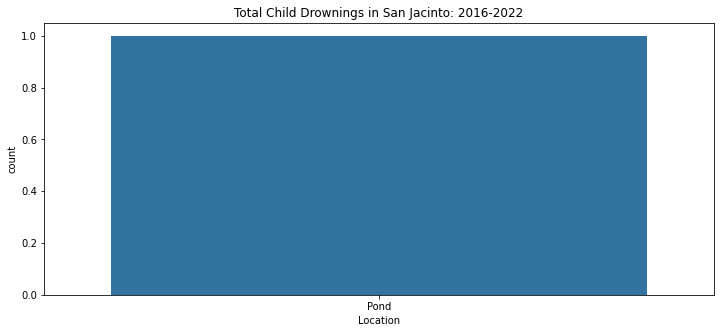

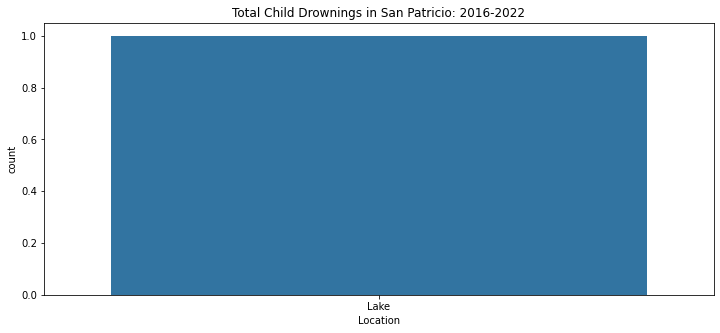

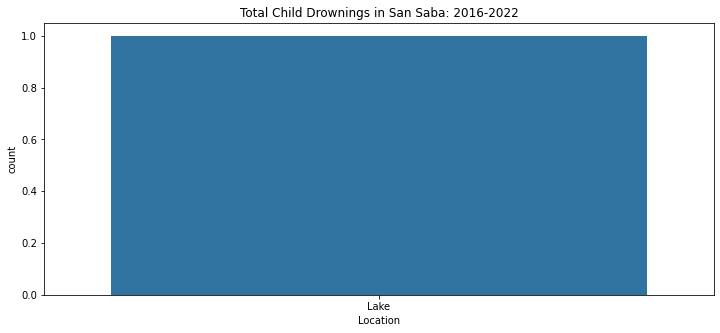

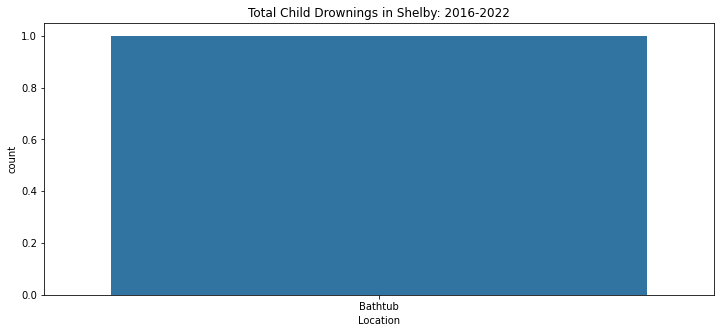

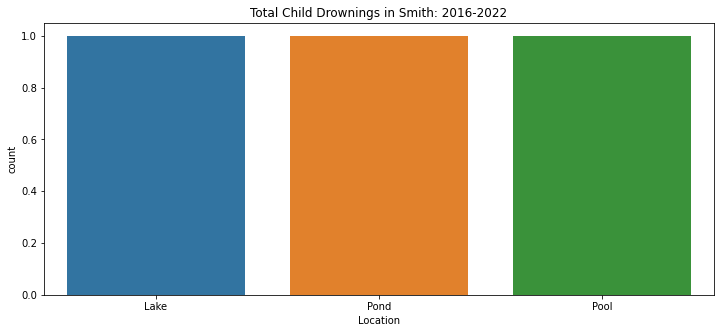

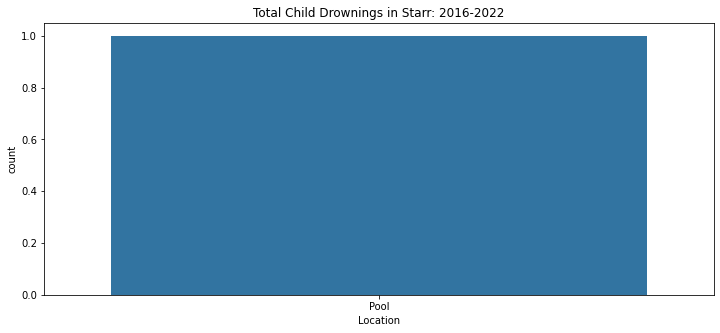

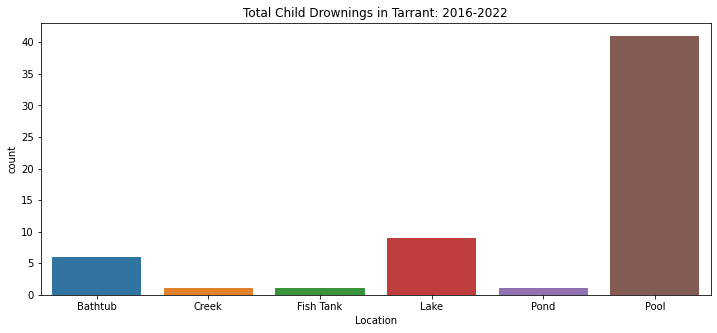

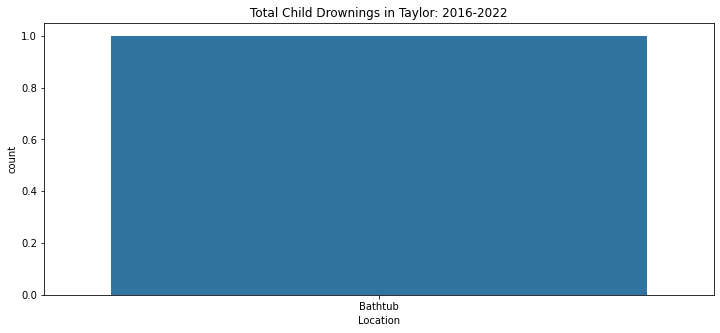

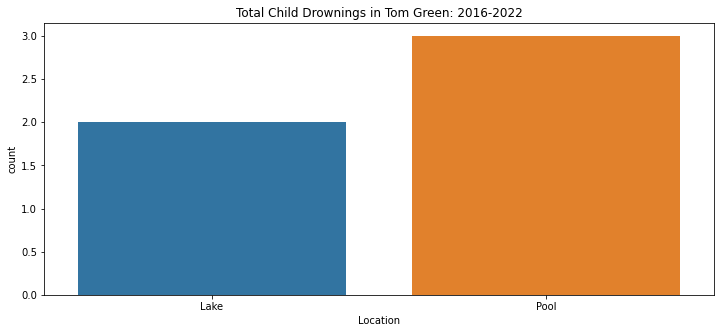

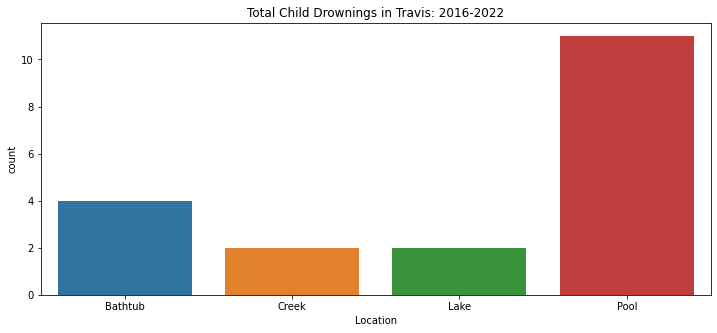

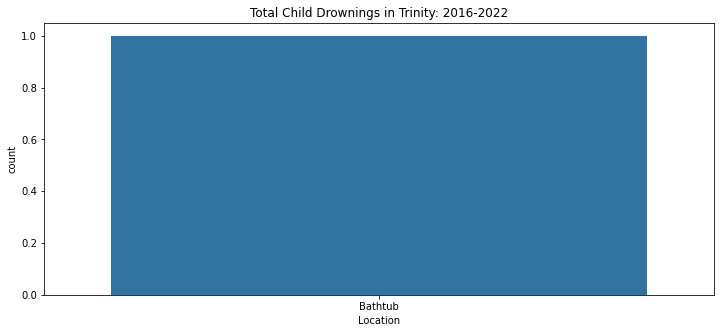

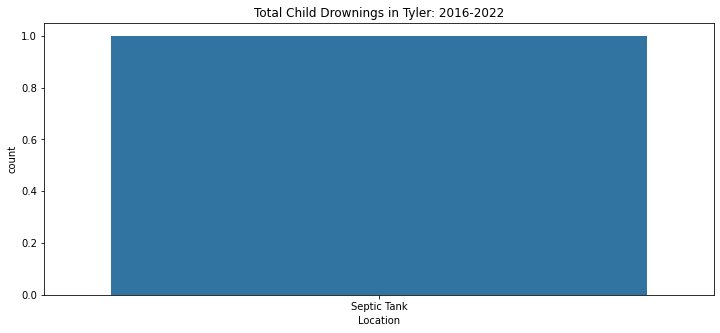

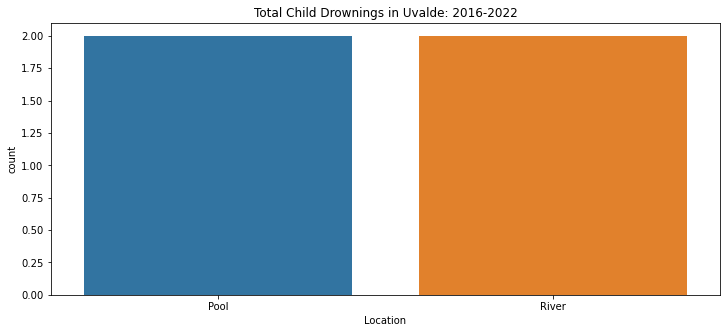

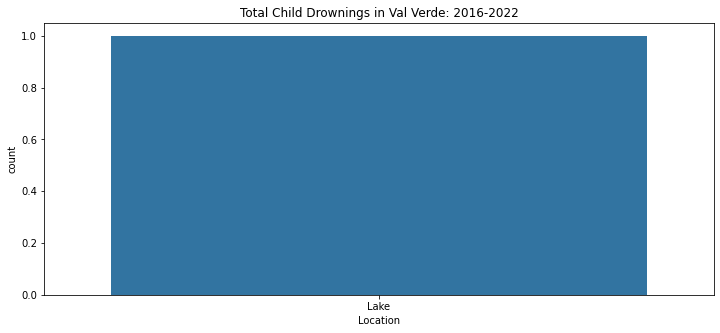

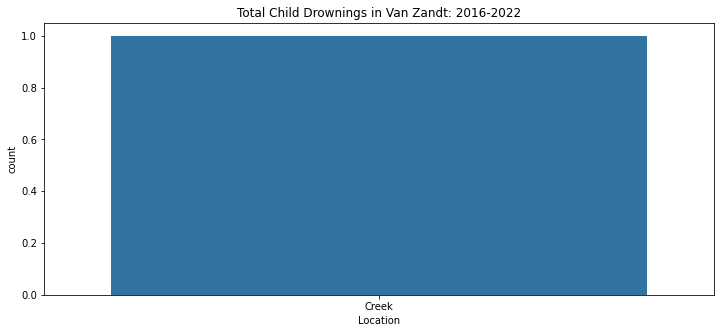

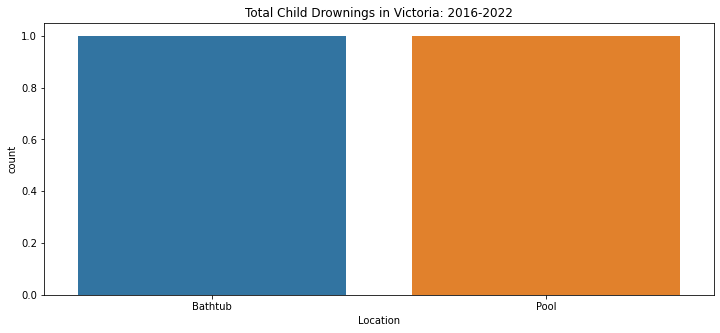

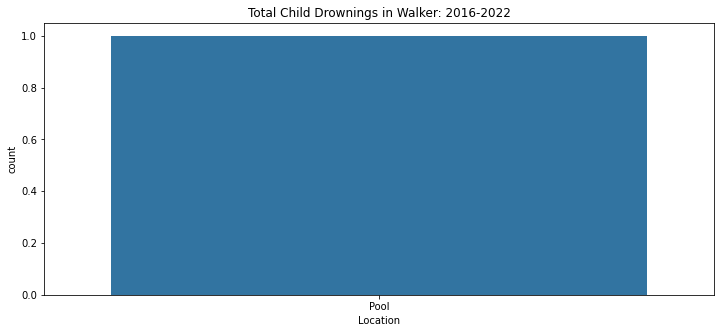

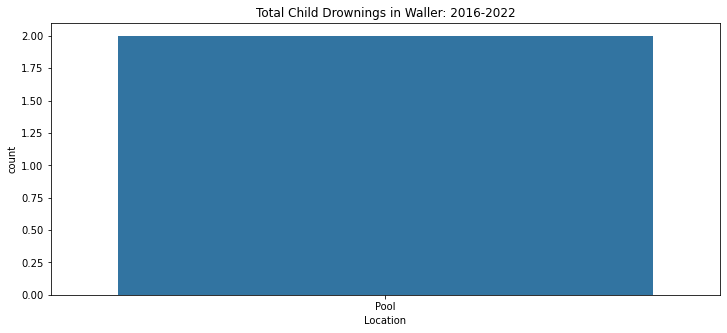

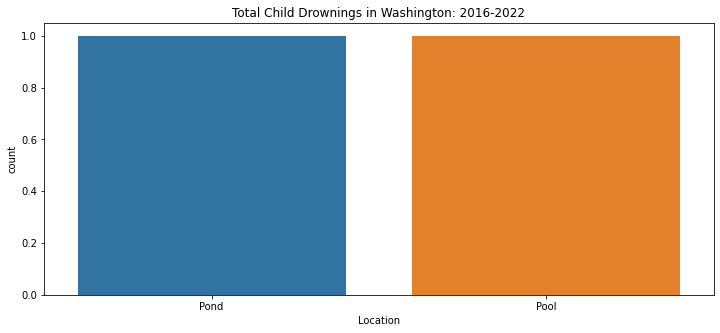

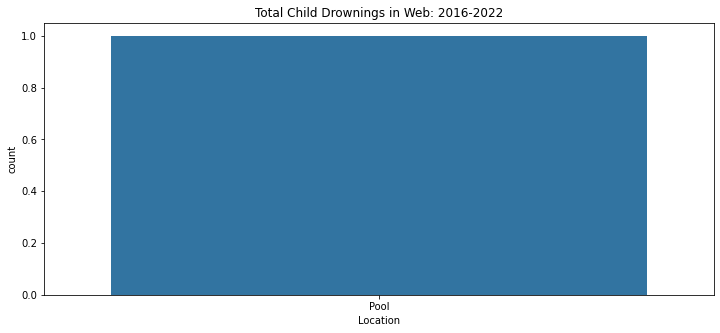

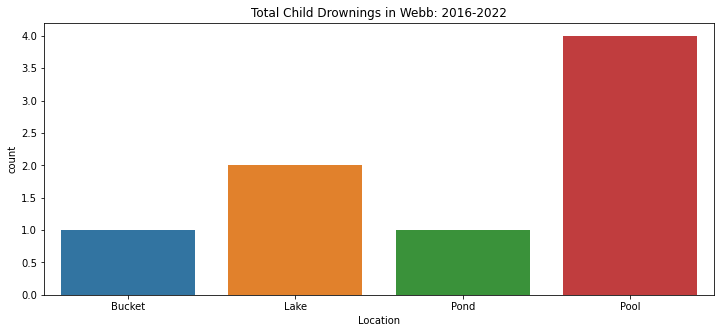

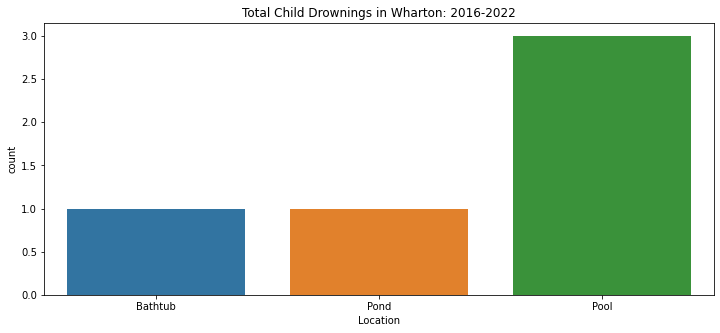

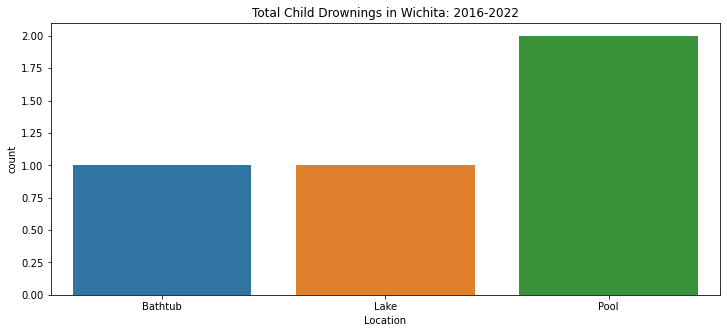

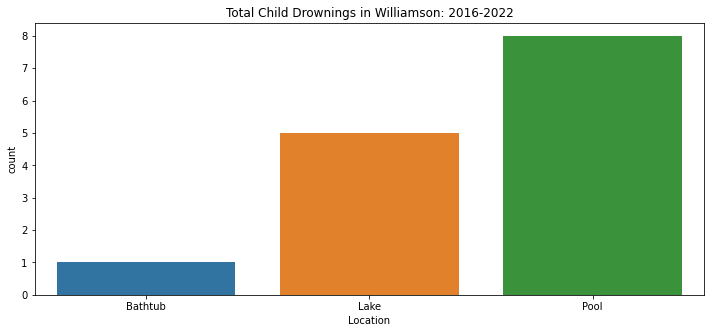

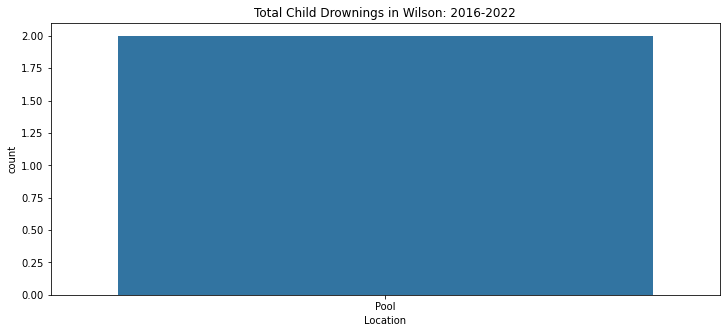

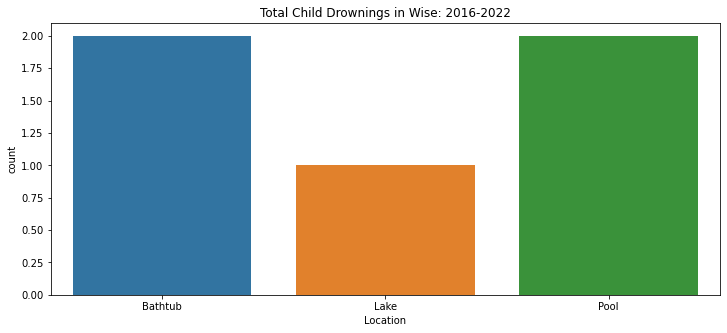

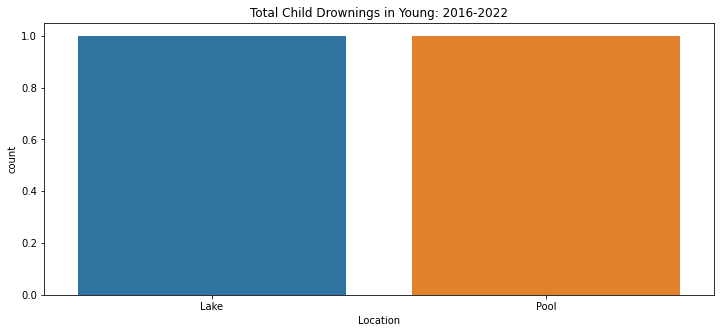

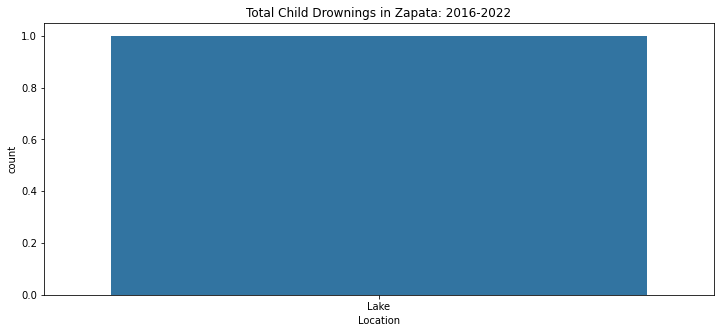

In [51]:
county_location(df)

# Predictions and Analytics

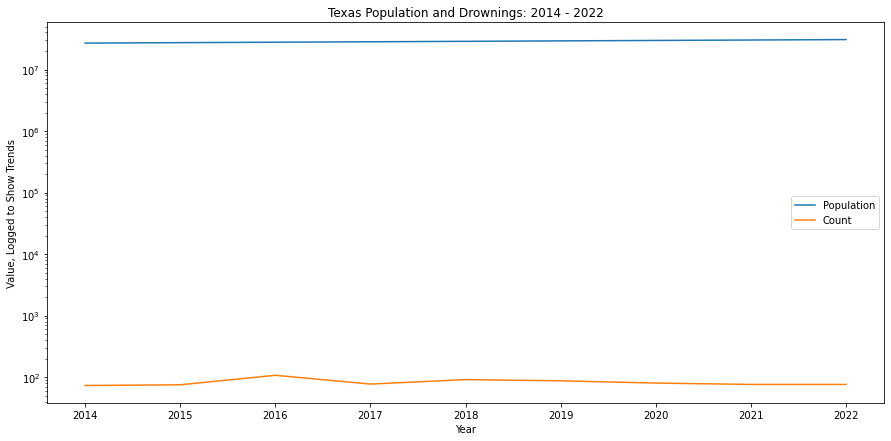

In [100]:
pop_drownings_log()

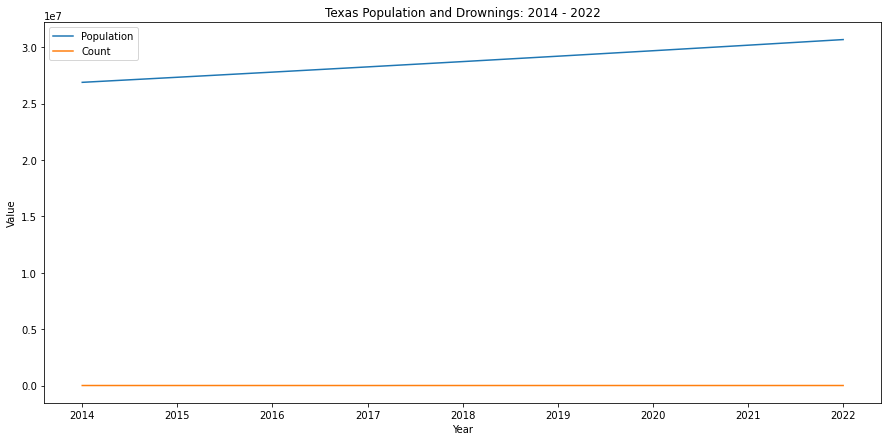

In [95]:
#Y-axis is in hundred millions
pop_drownings()

<AxesSubplot:title={'center':'Total Child Drownings by Year'}, xlabel='Year', ylabel='Count'>

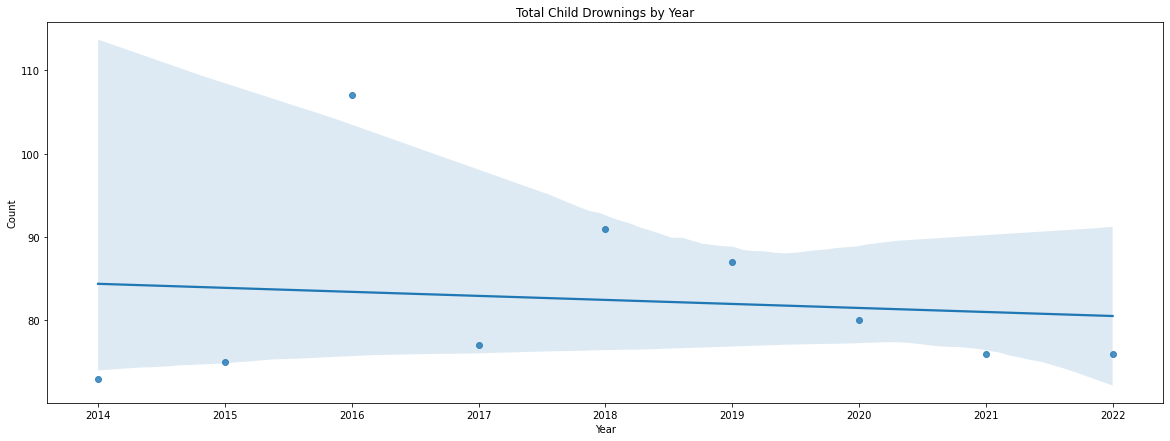

In [42]:
drownings_by_year_reg(df)

## Prediction With Year and Number of Drownings

We first define the 'year' and 'count' arrays, representing the historical data. Then, we reshape the arrays to match the expected input shape of the scikit-learn models, which is a 2D array with one column.

Next, we create an instance of the LinearRegression class and fit the model to the data using the fit() method. This trains the regression model on the provided data.

Afterward, we can use the trained model to predict the count for a new year. In this case, we use the value 2020 as the new year and pass it to the predict() method, which returns an array of predicted counts. Since we only have one input, we access the predicted count using new_count[0][0].

Finally, we print the predicted count for the new year.

In [43]:
get_regression(df, 2023)

Predicted count for 2023: 80.03


In [44]:
get_regression(df, 2024)

Predicted count for 2024: 79.54


In [45]:
get_regression(df, 2025)

Predicted count for 2025: 79.06


In [52]:
get_regression(df, 2026)

Predicted count for 2026: 78.58


In [53]:
get_regression(df, 2027)

Predicted count for 2027: 78.09


## Prediction With Year, Population, and Number of Drownings

In this updated version, we have added a 'population' array to the sample data. We then combine the 'year' and 'population' arrays into a single 2D array called 'X' using the column_stack() function. This creates a matrix where each row represents a data point with two features (year and population).

The remaining steps of creating the model, fitting it to the data, and predicting the count for a new year and population remain the same as in the previous example. The only change is that we create a new data point as a 2D array, where the first column represents the new year and the second column represents the new population.

Finally, we print the predicted count for the new year and population.

### A Note For Transparency

Because the general trend in 2014-2021 has trended downward, despite the total Texas population increasing, this model with the added parameter of population will show sharp declines. 

If we had more data in years previous to 2014 (thus, a larger dataset), we would be able to capture more of the nuance and the relationship of population and drownings.

Said in another way, with the addition of this third variable on this smaller dataset the results become less reliable.

In [77]:
get_regression_pop(df, 2023, 31172832)

Predicted count for 2023 with population 31172832: 62.62


In [78]:
get_regression_pop(df, 2024, 31685234)

Predicted count for 2024 with population 31685234: 51.7


In [79]:
get_regression_pop(df, 2025, 32204920)

Predicted count for 2025 with population 32204920: 38.8


In [80]:
get_regression_pop(df, 2026, 32730748)

Predicted count for 2026 with population 32730748: 24.24


In [81]:
get_regression_pop(df, 2027, 33263027)

Predicted count for 2027 with population 33263027: 7.94
